In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Data file.csv",index_col=[0])

In [3]:
df.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
1      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
2      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
3      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
4      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
5      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
1                2.0                0.0              1539  ...   
2               20.0                0.0              5787  ...   
3                3.0                0.0              1539  ...   
4               41.0                0.0               947  ...   
5                4.0                0.0              2309  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
1              6.0                 0.0          2.0            12   
2             12.0                 0.0          1.0            12   
3              6.0                 0.0          1.0             6   
4              6.0                 0.0          2.0            12   
5              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
1                6                 0.0  29.000000  29.000000      UPW   
2               12                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   0.000000   0.000000      UPW   
5                6                 0.0   2.333333   2.333333      UPW   

        pdate  
1  2016-07-20  
2  2016-08-10  
3  2016-08-19  
4  2016-06-06  
5  2016-06-22  

[5 rows x 36 columns]

In [4]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
df.sample(5)

label       msisdn    aon  daily_decr30  daily_decr90  rental30  \
5729        1  88270I70371  389.0    112.715667    112.715667    911.37   
193226      1  34123I90583  247.0  15590.010000  15590.270000  10276.11   
83911       1  31749I70372  699.0  16214.000000  24832.350000    999.79   
62824       1  18393I90849  815.0   4267.000000   4267.000000    299.70   
92370       1  61976I90583  726.0    107.822000    107.822000    727.74   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
5729      911.37               10.0                0.0              1539  ...   
193226  11847.29                2.0                0.0              4048  ...   
83911    4110.27                5.0                0.0              2309  ...   
62824     299.70                1.0                0.0              2309  ...   
92370     727.74                1.0                0.0              2309  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
5729                6.0                 0.0          2.0            12   
193226              6.0                 1.0          3.0            18   
83911               6.0                 0.0          9.0            54   
62824               6.0                 0.0          1.0             6   
92370               6.0                 0.0          4.0            24   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
5729                  6                 0.0       0.00   0.000000      UPW   
193226                6                 1.0      16.00  16.000000      UPW   
83911                 6                 0.0       2.00   1.888889      UPW   
62824                 6                 0.0       0.00   0.000000      UPW   
92370                 6                 0.0       2.75   2.750000      UPW   

             pdate  
5729    2016-06-17  
193226  2016-07-13  
83911   2016-08-13  
62824   2016-08-20  
92370   2016-06-26  

[5 rows x 36 columns]

In [6]:
# checking for any missing values in the dataset
df.isna().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [7]:
# checking for correlated features in the dataset
df.corr()

label       aon  daily_decr30  daily_decr90  \
label                 1.000000 -0.003785      0.168298      0.166150   
aon                  -0.003785  1.000000      0.001104      0.000374   
daily_decr30          0.168298  0.001104      1.000000      0.977704   
daily_decr90          0.166150  0.000374      0.977704      1.000000   
rental30              0.058085 -0.000960      0.442066      0.434685   
rental90              0.075521 -0.000790      0.458977      0.471730   
last_rech_date_ma     0.003728  0.001692      0.000487      0.000908   
last_rech_date_da     0.001711 -0.001693     -0.001636     -0.001886   
last_rech_amt_ma      0.131804  0.004256      0.275837      0.264131   
cnt_ma_rech30         0.237331 -0.003148      0.451385      0.426707   
fr_ma_rech30          0.001330 -0.001163     -0.000577     -0.000343   
sumamnt_ma_rech30     0.202828  0.000707      0.636536      0.603886   
medianamnt_ma_rech30  0.141490  0.004306      0.295356      0.282960   
medianmarechprebal30 -0.004829  0.003930     -0.001153     -0.000746   
cnt_ma_rech90         0.236392 -0.002725      0.587338      0.593069   
fr_ma_rech90          0.084385  0.004401     -0.078299     -0.079530   
sumamnt_ma_rech90     0.205793  0.001011      0.762981      0.768817   
medianamnt_ma_rech90  0.120855  0.004909      0.257847      0.250518   
medianmarechprebal90  0.039300 -0.000859      0.037495      0.036382   
cnt_da_rech30         0.003827  0.001564      0.000700      0.000661   
fr_da_rech30         -0.000027  0.000892     -0.001499     -0.001570   
cnt_da_rech90         0.002999  0.001121      0.038814      0.031155   
fr_da_rech90         -0.005418  0.005395      0.020673      0.016437   
cnt_loans30           0.196283 -0.001826      0.366116      0.340387   
amnt_loans30          0.197272 -0.001726      0.471492      0.447869   
maxamnt_loans30       0.000248 -0.002764     -0.000028      0.000025   
medianamnt_loans30    0.044589  0.004664     -0.011610     -0.005591   
cnt_loans90           0.004733 -0.000611      0.008962      0.009446   
amnt_loans90          0.199788 -0.002319      0.563496      0.567204   
maxamnt_loans90       0.084144 -0.001191      0.400199      0.397251   
medianamnt_loans90    0.035747  0.002771     -0.037305     -0.034686   
payback30             0.048336  0.001940      0.026915      0.019400   
payback90             0.049183  0.002203      0.047175      0.040800   

                      rental30  rental90  last_rech_date_ma  \
label                 0.058085  0.075521           0.003728   
aon                  -0.000960 -0.000790           0.001692   
daily_decr30          0.442066  0.458977           0.000487   
daily_decr90          0.434685  0.471730           0.000908   
rental30              1.000000  0.955237          -0.001095   
rental90              0.955237  1.000000          -0.001688   
last_rech_date_ma    -0.001095 -0.001688           1.000000   
last_rech_date_da     0.003261  0.002794           0.001790   
last_rech_amt_ma      0.127271  0.121416          -0.000147   
cnt_ma_rech30         0.233343  0.230260           0.004311   
fr_ma_rech30         -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30     0.272649  0.259709           0.002105   
medianamnt_ma_rech30  0.129853  0.120242          -0.001358   
medianmarechprebal30 -0.001415 -0.001237           0.004071   
cnt_ma_rech90         0.312118  0.345293           0.004263   
fr_ma_rech90         -0.033530 -0.036524           0.001414   
sumamnt_ma_rech90     0.342306  0.360601           0.002243   
medianamnt_ma_rech90  0.110356  0.103151          -0.000726   
medianmarechprebal90  0.027170  0.029547          -0.001086   
cnt_da_rech30        -0.001105 -0.000548          -0.003467   
fr_da_rech30         -0.002558 -0.002345          -0.003626   
cnt_da_rech90         0.072255  0.056282          -0.003538   
fr_da_rech90          0.046761  0.036886          -0.002395   
cnt_loans30           0.180203  0.171595           0.001193   
a

<AxesSubplot:>

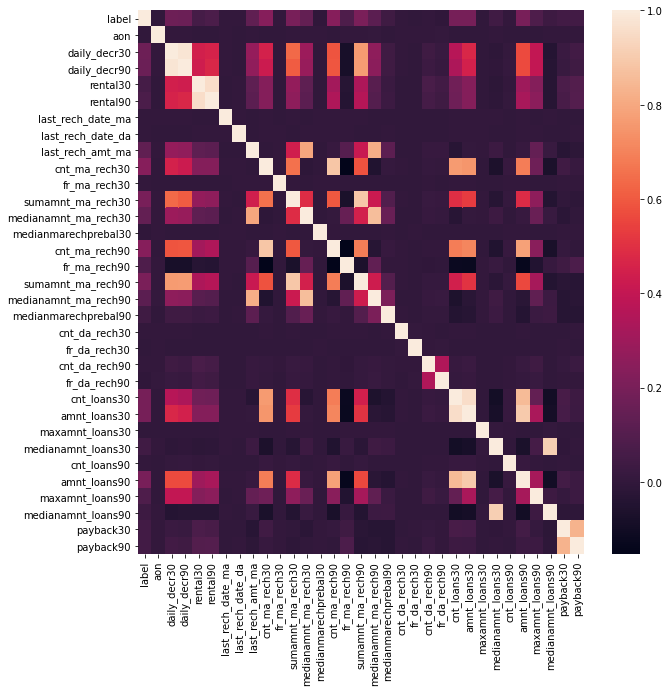

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [9]:
df.corr()['daily_decr30']

label                   0.168298
aon                     0.001104
daily_decr30            1.000000
daily_decr90            0.977704
rental30                0.442066
rental90                0.458977
last_rech_date_ma       0.000487
last_rech_date_da      -0.001636
last_rech_amt_ma        0.275837
cnt_ma_rech30           0.451385
fr_ma_rech30           -0.000577
sumamnt_ma_rech30       0.636536
medianamnt_ma_rech30    0.295356
medianmarechprebal30   -0.001153
cnt_ma_rech90           0.587338
fr_ma_rech90           -0.078299
sumamnt_ma_rech90       0.762981
medianamnt_ma_rech90    0.257847
medianmarechprebal90    0.037495
cnt_da_rech30           0.000700
fr_da_rech30           -0.001499
cnt_da_rech90           0.038814
fr_da_rech90            0.020673
cnt_loans30             0.366116
amnt_loans30            0.471492
maxamnt_loans30        -0.000028
medianamnt_loans30     -0.011610
cnt_loans90             0.008962
amnt_loans90            0.563496
maxamnt_loans90         0.400199
medianamnt

In [10]:
# let's start with the label
df.label

1         0
2         1
3         1
4         1
5         1
         ..
209589    1
209590    1
209591    1
209592    1
209593    1
Name: label, Length: 209593, dtype: int64

In [11]:
df.label.value_counts()

1    183431
0     26162
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

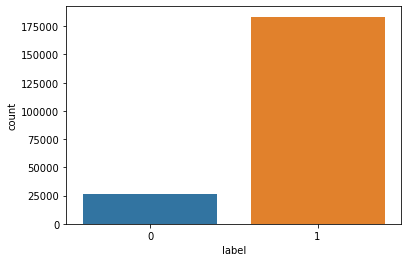

In [12]:
sns.countplot(df.label)

<AxesSubplot:xlabel='aon', ylabel='Density'>

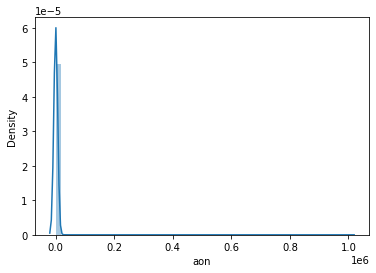

In [13]:
# Age of the cellular network
sns.distplot(df.aon)

In [14]:
df.aon.value_counts()

95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
818222.402828      1
603666.669107      1
852238.900959      1
851325.512514      1
913930.093986      1
Name: aon, Length: 4507, dtype: int64

<AxesSubplot:xlabel='daily_decr90', ylabel='Density'>

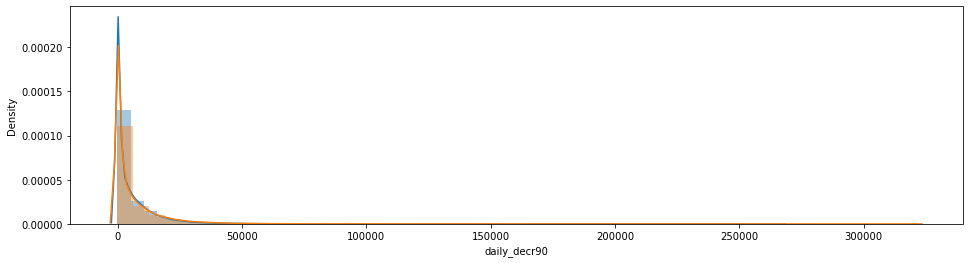

In [15]:
# average of daily use over 30 days and 90 days
plt.figure(figsize=(16,4))
sns.distplot(df.daily_decr30)
sns.distplot(df.daily_decr90)

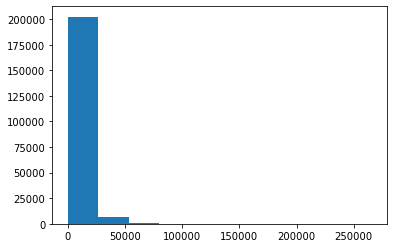

In [16]:
plt.hist(df.daily_decr30);

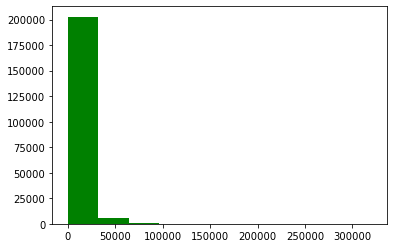

In [17]:
plt.hist(df.daily_decr90,color='green');

In [18]:
# lets get the values over 50000
df[df.daily_decr90 > 50000]

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
131         1  91716I90841   365.0  44836.000000     52266.890   6394.29   
202         1  60002I84456  2058.0  39557.000000     54218.950  20929.48   
211         1  94452I70376   311.0  50300.121667     50425.730   6876.70   
214         1  00180I82736   999.0  46992.000000     55642.080  11529.63   
280         1  92786I91190   515.0  52099.000000     53448.350   4338.36   
...       ...          ...     ...           ...           ...       ...   
209218      1  89841I84457   174.0  70815.841333     71078.724  10084.96   
209227      1  16815I90587   931.0  32598.000000     65449.580   5801.49   
209278      1  00575I85349   165.0  36800.000000     58127.000   4903.20   
209298      1  89681I70379   339.0  44066.000000     59686.790   6876.45   
209347      1  79103I82730   258.0  50652.000000     69834.960  17807.12   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
131      8163.82                1.0                0.0              2309  ...   
202     30084.10                1.0                0.0               770  ...   
211      8651.45                4.0                0.0              8000  ...   
214     20950.63                2.0                0.0              2309  ...   
280      5826.66                1.0                0.0              3178  ...   
...          ...                ...                ...               ...  ...   
209218  12933.26                3.0               26.0              8000  ...   
209227   4839.56                1.0                0.0               770  ...   
209278   8794.78                2.0                0.0              1539  ...   
209298  13617.11                1.0                0.0              1539  ...   
209347  20460.38                1.0                0.0               770  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
131                12.0                 0.0         25.0           204   
202                12.0                 0.0         21.0           132   
211                 6.0                 0.0          8.0            48   
214                12.0                 0.0          5.0            48   
280                 6.0                 0.0          8.0            48   
...                 ...                 ...          ...           ...   
209218             12.0                 0.0         14.0           108   
209227             12.0                 0.0          2.0            18   
209278              6.0                 0.0         37.0           222   
209298              0.0                 0.0          1.0             6   
209347             12.0                 0.0         11.0            78   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
131                  12                 0.0   1.909091   1.888889      UPW   
202                  12                 0.0   1.769231   2.625000      UPW   
211                   6                 0.0   1.750000   2.714286      UPW   
214                  12                 0.0   7.000000   9.200000      UPW   
280                   6                 0.0   1.125000   4.888889      UPW   
...                 ...                 ...        ...        ...      ...   
209218               12                 0.0   1.125000   1.230769      UPW   
209227               12                 0.0   2.000000   2.000000      UPW   
209278                6                 0.0   2.210526   1.918919      UPW   
209298                6                 0.0   0.000000   1.500000      UPW   
209347               12                 0.0   2.428571   3.636364      UPW   

             pdate  
131     2016-08-06  
202     2016-08-12  
211     2016-07-25  
214     2016-08-13  
280     2016-08-01  
...            ...  
209218  2016-07-23  
209227  2016-08-13  
209278  2016-08-06  
209298  2016-08-09  
209347  2016-08-08  

[2091 rows x 36 columns]

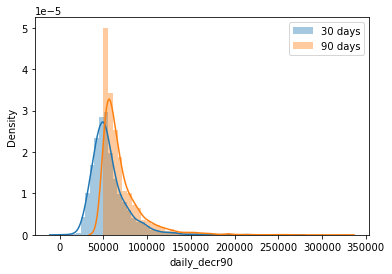

In [19]:
sns.distplot(df[df.daily_decr90 > 50000]['daily_decr30'],label = '30 days')
sns.distplot(df[df.daily_decr90 > 50000]['daily_decr90'], label = '90 days')
plt.legend()

In [20]:
# data will would loose
sample_loss = len(df[df.daily_decr90 > 50000])
sample_loss

2091

In [21]:
#loss percentage
sample_loss / len(df) * 100

0.9976478222078028

<AxesSubplot:xlabel='rental90', ylabel='Density'>

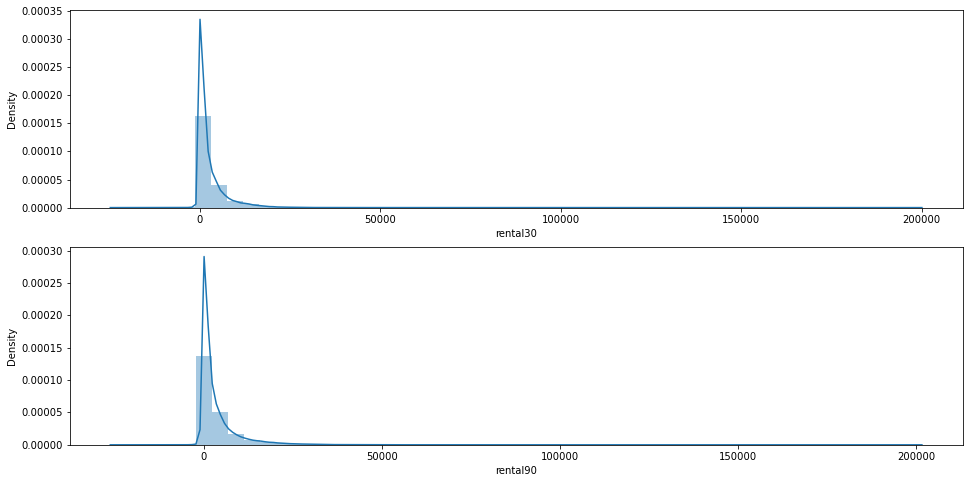

In [22]:
# rental30 
fig = plt.figure(figsize=(16,8))

fig.add_subplot(211)
sns.distplot(df.rental30)

fig.add_subplot(212)
sns.distplot(df.rental90)

<AxesSubplot:xlabel='rental90'>

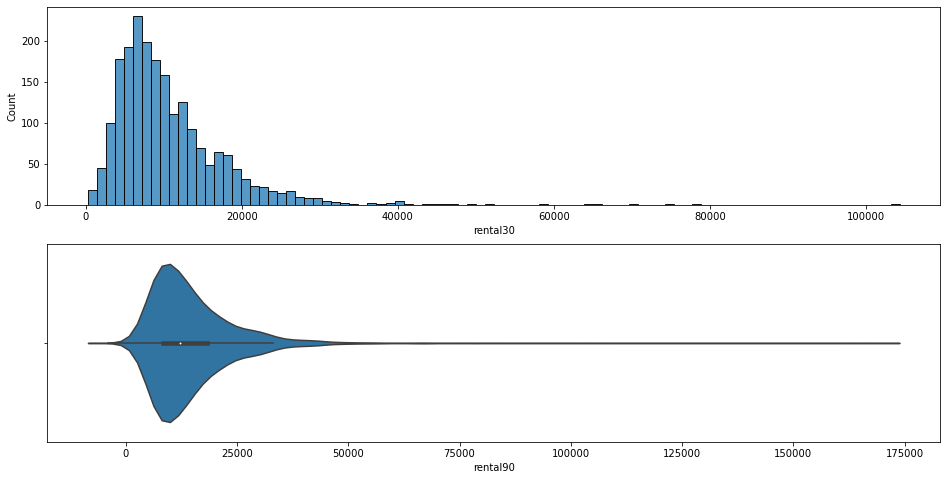

In [23]:
fig = plt.figure(figsize=(16,8))

fig.add_subplot(211)
sns.histplot(df[df.daily_decr90 > 50000].rental30)

fig.add_subplot(212)
sns.violinplot(df[df.daily_decr90 > 50000].rental90)

<AxesSubplot:xlabel='last_rech_date_ma', ylabel='Density'>

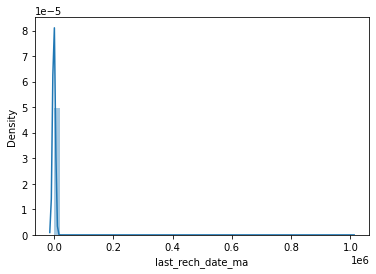

In [24]:
# number of days since last recharge (in main account and data account)
sns.distplot(df.last_rech_date_ma)

<AxesSubplot:xlabel='last_rech_date_da', ylabel='Density'>

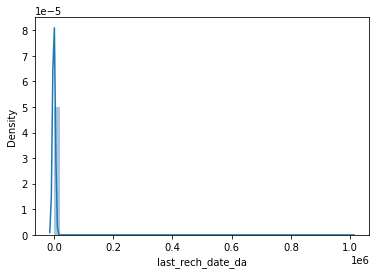

In [25]:
sns.distplot(df.last_rech_date_da)

In [26]:
df.last_rech_date_ma.describe()

count    209593.000000
mean       3755.847800
std       53905.892230
min         -29.000000
25%           1.000000
50%           3.000000
75%           7.000000
max      998650.377733
Name: last_rech_date_ma, dtype: float64

In [27]:
df.last_rech_date_da.describe()

count    209593.000000
mean       3712.202921
std       53374.833430
min         -29.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      999171.809410
Name: last_rech_date_da, dtype: float64

In [28]:
# let's get the last 1 quantile of the data for main
q = df.last_rech_date_ma.quantile(0.99)
df[df.last_rech_date_ma > q]

label       msisdn    aon  daily_decr30  daily_decr90  rental30  \
31          1  70130I90843  -42.0      8.864333      8.864333    780.71   
54          1  09561I70374  635.0      5.500000      5.500000     75.90   
107         0  15429I84458   72.0     13.590000     13.590000      0.00   
160         1  84667I85348  415.0   9507.542667   9622.480000    418.58   
234         1  29143I95202  211.0      0.640000      0.640000    227.60   
...       ...          ...    ...           ...           ...       ...   
209467      1  59525I88698  190.0   2601.750000   2622.100000   -334.62   
209502      1  54642I70787  460.0     55.520000     55.520000    877.40   
209522      1  25171I84457  281.0   1704.000000   1795.070000      0.00   
209534      0  41672I95204  168.0     15.400000     15.400000    922.20   
209537      1  94993I70785  427.0   5887.000000   5942.360000      0.00   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
31        780.71      780195.497093                0.0               773  ...   
54         75.90      559958.753409                0.0               173  ...   
107         0.00          64.000000                0.0               773  ...   
160      -239.39      835708.591971                0.0              1924  ...   
234       227.60      942339.085159                0.0                 0  ...   
...          ...                ...                ...               ...  ...   
209467   -441.57      767980.563105                0.0              1539  ...   
209502    877.40      611678.500427                0.0              1539  ...   
209522    180.00          61.000000                0.0              3178  ...   
209534    922.20      590843.121987                0.0              1539  ...   
209537      0.00          64.000000               64.0              9400  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
31                  6.0                 1.0          1.0             6   
54                  6.0                 0.0          1.0             6   
107                 6.0                 0.0          1.0             6   
160                12.0                 0.0          4.0            30   
234                 6.0                 1.0          1.0             6   
...                 ...                 ...          ...           ...   
209467             12.0                 0.0          3.0            24   
209502              6.0                 0.0          2.0            12   
209522             12.0                 0.0          1.0            12   
209534              6.0                 0.0          1.0             6   
209537              6.0                 0.0          1.0             6   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
31                    6                 1.0   0.000000       0.00      UPW   
54                    6                 0.0   0.000000       0.00      UPW   
107                   6                 0.0   0.000000       0.00      UPW   
160                  12                 0.0   4.666667       9.75      UPW   
234                   6                 1.0   0.000000       0.00      UPW   
...                 ...                 ...        ...        ...      ...   
209467               12                 0.0   6.000000       6.00      UPW   
209502                6                 0.0  13.000000      13.00      UPW   
209522               12                 0.0   0.000000       0.00      UPW   
209534                6                 0.0   0.000000       0.00      UPW   
209537                6                 0.0   0.000000       0.00      UPW   

             pdate  
31      2016-06-07  
54      2016-06-05  
107     2016-06-27  
160     2016-07-19  
234     2016-06-05  
...            ...  
209467  2016-07-05  
209502  2016-06-10  
209522  2016-08-10  
209534  2016-06-30  
209537  2016-07-30  

[2046 rows x 36 columns]

<AxesSubplot:xlabel='last_rech_date_ma', ylabel='Density'>

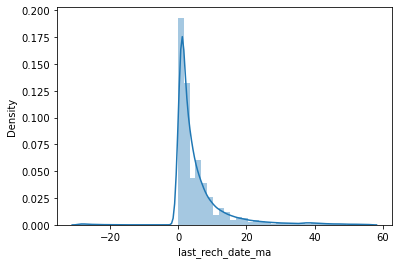

In [29]:
sns.distplot(df[df.last_rech_date_ma < q]['last_rech_date_ma'])

In [30]:
# let's get the last 1 quantile of the data for data
q1 = df.last_rech_date_da.quantile(0.99)
df[df.last_rech_date_da < q1]

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
1           0  21408I70789   272.0   3055.050000   3065.150000    220.13   
2           1  76462I70374   712.0  12122.000000  12124.750000   3691.26   
3           1  17943I70372   535.0   1398.000000   1398.000000    900.13   
4           1  55773I70781   241.0     21.228000     21.228000    159.42   
5           1  03813I82730   947.0    150.619333    150.619333   1098.90   
...       ...          ...     ...           ...           ...       ...   
209589      1  22758I85348   404.0    151.872333    151.872333   1089.19   
209590      1  95583I84455  1075.0     36.936000     36.936000   1728.36   
209591      1  28556I85350  1013.0  11843.111667  11904.350000   5861.83   
209592      1  59712I82733  1732.0  12488.228333  12574.370000    411.83   
209593      1  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
1         260.13                2.0                0.0              1539  ...   
2        3691.26               20.0                0.0              5787  ...   
3         900.13                3.0                0.0              1539  ...   
4         159.42               41.0                0.0               947  ...   
5        1098.90                4.0                0.0              2309  ...   
...          ...                ...                ...               ...  ...   
209589   1089.19                1.0                0.0              4048  ...   
209590   1728.36                4.0                0.0               773  ...   
209591   8893.20                3.0                0.0              1539  ...   
209592    984.58                2.0               38.0               773  ...   
209593    631.20               13.0                0.0              7526  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
1                   6.0                 0.0          2.0            12   
2                  12.0                 0.0          1.0            12   
3                   6.0                 0.0          1.0             6   
4                   6.0                 0.0          2.0            12   
5                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209589              6.0                 0.0          2.0            12   
209590              6.0                 0.0          3.0            18   
209591             12.0                 0.0          6.0            54   
209592             12.0                 0.0          3.0            24   
209593             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
1                     6                 0.0  29.000000  29.000000      UPW   
2                    12                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   0.000000   0.000000      UPW   
5                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209589                6                 0.0   1.000000   1.000000      UPW   
209590                6                 0.0   1.000000   1.000000      UPW   
209591               12                 0.0   4.000000   3.833333      UPW   
209592               12                 0.0   0.000000  10.500000      UPW   
209593               12                 0.0   0.000000   0.000000      UPW   

             pdate  
1       2016-07-20  
2       2016-08-10  
3       2016-08-19  
4       2016-06-06  
5       2016-06-22  
...            ...  
209589  2016-06-17  
209590  2016-06-12  
209591  2016-07-29  
209592  2016-07-25  
209593  2016-07-07  

[207477 rows x 36 columns]

<AxesSubplot:xlabel='last_rech_date_da', ylabel='Density'>

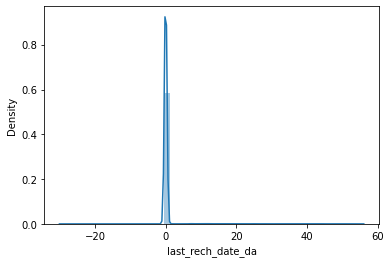

In [31]:
sns.distplot(df[df.last_rech_date_da < q1]['last_rech_date_da'])

In [32]:
df[df.last_rech_date_da == 0]#['cnt_da_rech90'].unique()

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
1           0  21408I70789   272.0   3055.050000   3065.150000    220.13   
2           1  76462I70374   712.0  12122.000000  12124.750000   3691.26   
3           1  17943I70372   535.0   1398.000000   1398.000000    900.13   
4           1  55773I70781   241.0     21.228000     21.228000    159.42   
5           1  03813I82730   947.0    150.619333    150.619333   1098.90   
...       ...          ...     ...           ...           ...       ...   
209588      1  19900I95200   239.0  14678.000000  14704.900000  12935.26   
209589      1  22758I85348   404.0    151.872333    151.872333   1089.19   
209590      1  95583I84455  1075.0     36.936000     36.936000   1728.36   
209591      1  28556I85350  1013.0  11843.111667  11904.350000   5861.83   
209593      1  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
1         260.13                2.0                0.0              1539  ...   
2        3691.26               20.0                0.0              5787  ...   
3         900.13                3.0                0.0              1539  ...   
4         159.42               41.0                0.0               947  ...   
5        1098.90                4.0                0.0              2309  ...   
...          ...                ...                ...               ...  ...   
209588  16775.60                8.0                0.0              3178  ...   
209589   1089.19                1.0                0.0              4048  ...   
209590   1728.36                4.0                0.0               773  ...   
209591   8893.20                3.0                0.0              1539  ...   
209593    631.20               13.0                0.0              7526  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
1                   6.0                 0.0          2.0            12   
2                  12.0                 0.0          1.0            12   
3                   6.0                 0.0          1.0             6   
4                   6.0                 0.0          2.0            12   
5                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588             12.0                 1.0          3.0            24   
209589              6.0                 0.0          2.0            12   
209590              6.0                 0.0          3.0            18   
209591             12.0                 0.0          6.0            54   
209593             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
1                     6                 0.0  29.000000  29.000000      UPW   
2                    12                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   0.000000   0.000000      UPW   
5                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588               12                 1.0   0.000000  30.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590                6                 0.0   1.000000   1.000000      UPW   
209591               12                 0.0   4.000000   3.833333      UPW   
209593               12                 0.0   0.000000   0.000000      UPW   

             pdate  
1       2016-07-20  
2       2016-08-10  
3       2016-08-19  
4       2016-06-06  
5       2016-06-22  
...            ...  
209588  2016-08-02  
209589  2016-06-17  
209590  2016-06-12  
209591  2016-07-29  
209593  2016-07-07  

[202861 rows x 36 columns]

In [33]:
df[df.last_rech_date_da == 0]['cnt_da_rech90'].unique()

array([0, 1], dtype=int64)

In [34]:
x=df[((df.last_rech_date_da == 0) & (df.cnt_da_rech90 == 0) & (df.fr_da_rech90 == 0))]
x

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
1           0  21408I70789   272.0   3055.050000   3065.150000    220.13   
2           1  76462I70374   712.0  12122.000000  12124.750000   3691.26   
3           1  17943I70372   535.0   1398.000000   1398.000000    900.13   
4           1  55773I70781   241.0     21.228000     21.228000    159.42   
5           1  03813I82730   947.0    150.619333    150.619333   1098.90   
...       ...          ...     ...           ...           ...       ...   
209588      1  19900I95200   239.0  14678.000000  14704.900000  12935.26   
209589      1  22758I85348   404.0    151.872333    151.872333   1089.19   
209590      1  95583I84455  1075.0     36.936000     36.936000   1728.36   
209591      1  28556I85350  1013.0  11843.111667  11904.350000   5861.83   
209593      1  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
1         260.13                2.0                0.0              1539  ...   
2        3691.26               20.0                0.0              5787  ...   
3         900.13                3.0                0.0              1539  ...   
4         159.42               41.0                0.0               947  ...   
5        1098.90                4.0                0.0              2309  ...   
...          ...                ...                ...               ...  ...   
209588  16775.60                8.0                0.0              3178  ...   
209589   1089.19                1.0                0.0              4048  ...   
209590   1728.36                4.0                0.0               773  ...   
209591   8893.20                3.0                0.0              1539  ...   
209593    631.20               13.0                0.0              7526  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
1                   6.0                 0.0          2.0            12   
2                  12.0                 0.0          1.0            12   
3                   6.0                 0.0          1.0             6   
4                   6.0                 0.0          2.0            12   
5                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588             12.0                 1.0          3.0            24   
209589              6.0                 0.0          2.0            12   
209590              6.0                 0.0          3.0            18   
209591             12.0                 0.0          6.0            54   
209593             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
1                     6                 0.0  29.000000  29.000000      UPW   
2                    12                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   0.000000   0.000000      UPW   
5                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588               12                 1.0   0.000000  30.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590                6                 0.0   1.000000   1.000000      UPW   
209591               12                 0.0   4.000000   3.833333      UPW   
209593               12                 0.0   0.000000   0.000000      UPW   

             pdate  
1       2016-07-20  
2       2016-08-10  
3       2016-08-19  
4       2016-06-06  
5       2016-06-22  
...            ...  
209588  2016-08-02  
209589  2016-06-17  
209590  2016-06-12  
209591  2016-07-29  
209593  2016-07-07  

[202860 rows x 36 columns]

In [35]:
# let's get the people have a data account.
df[((df.last_rech_date_da != 0) & (df.cnt_da_rech90 != 0) & (df.fr_da_rech90 != 0))]

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
454         1  50442I95202   127.0   5488.006000   5513.084667   4389.15   
866         1  24988I88648  1382.0   1624.816667   1654.450000   4115.28   
926         0  35846I70786   544.0   5383.128000   5430.317333  12472.59   
935         1  14755I84451  1713.0   3288.523333   3323.570000  17215.35   
2507        1  17921I70374   417.0    841.949333    852.514667   5353.14   
...       ...          ...     ...           ...           ...       ...   
208596      1  37536I70781   631.0  37099.794333  37285.383000   7341.04   
208677      1  31171I88649  1170.0   7293.340000   7311.820000   8400.68   
209112      1  28011I83939   515.0   7310.464000   7321.458667   4181.87   
209160      1  10839I89230   542.0  17301.901333  17407.704000  13027.18   
209218      1  89841I84457   174.0  70815.841333  71078.724000  10084.96   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
454      4160.53                5.0                8.0               770  ...   
866      5465.16                2.0               19.0               770  ...   
926     14278.59                1.0               19.0              1539  ...   
935     18499.71                1.0               12.0               770  ...   
2507     7686.38               14.0               14.0               770  ...   
...          ...                ...                ...               ...  ...   
208596   6875.68               12.0               10.0              4048  ...   
208677   9103.90                5.0               16.0              1539  ...   
209112   4393.13                1.0               20.0               770  ...   
209160  15072.02                4.0               11.0              1539  ...   
209218  12933.26                3.0               26.0              8000  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
454                 6.0                 0.0          2.0            12   
866                 6.0                 0.0          7.0            42   
926                 6.0                 0.0          3.0            18   
935                 6.0                 1.0          2.0            12   
2507                6.0                 0.0          2.0            12   
...                 ...                 ...          ...           ...   
208596              6.0                 0.0          7.0            42   
208677             12.0                 0.0          5.0            42   
209112              6.0                 0.0          6.0            36   
209160             12.0                 0.0         21.0           162   
209218             12.0                 0.0         14.0           108   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
454                   6                 0.0   0.000000   0.000000      UPW   
866                   6                 0.0  10.000000   4.500000      UPW   
926                   6                 0.0   7.500000   7.666667      UPW   
935                   6                 1.0   0.000000   2.500000      UPW   
2507                  6                 0.0   0.000000   0.000000      UPW   
...                 ...                 ...        ...        ...      ...   
208596                6                 0.0   3.250000   2.714286      UPW   
208677               12                 0.0   6.333333   5.000000      UPW   
209112                6                 0.0   6.500000   7.400000      UPW   
209160               12                 0.0   1.833333   1.650000      UPW   
209218               12                 0.0   1.125000   1.230769      UPW   

             pdate  
454     2016-07-23  
866     2016-07-23  
926     2016-07-23  
935     2016-07-23  
2507    2016-07-23  
...            ...  
208596  2016-07-23  
208677  2016-07-23  
209112  2016-07-23  
209160  2016-07-23  
209218  2016-07-23  

[865 rows x 36 columns]

In [36]:
865 / len (df) * 100

0.4127046227688902

In [37]:
# last amount recharged in the main account since last 30 days
df.last_rech_amt_ma

1         1539
2         5787
3         1539
4          947
5         2309
          ... 
209589    4048
209590     773
209591    1539
209592     773
209593    7526
Name: last_rech_amt_ma, Length: 209593, dtype: int64

<AxesSubplot:xlabel='last_rech_amt_ma', ylabel='Density'>

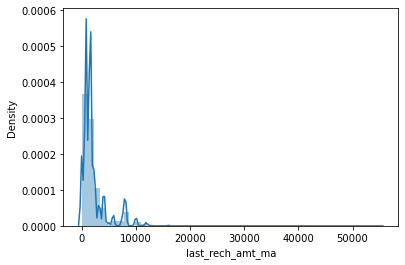

In [38]:
sns.distplot(df.last_rech_amt_ma)

In [39]:
df.last_rech_amt_ma.describe()

count    209593.000000
mean       2064.452797
std        2370.786034
min           0.000000
25%         770.000000
50%        1539.000000
75%        2309.000000
max       55000.000000
Name: last_rech_amt_ma, dtype: float64

<AxesSubplot:xlabel='last_rech_amt_ma'>

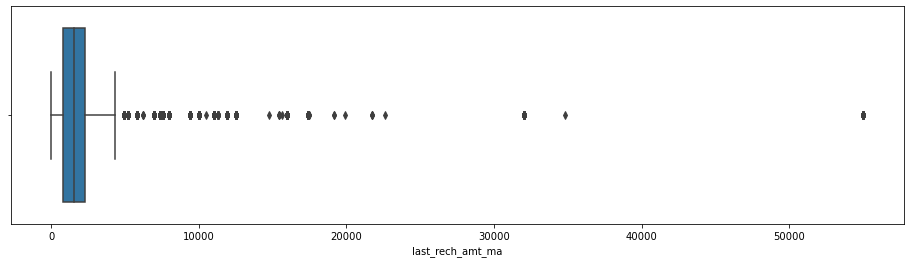

In [40]:
plt.figure(figsize=(16,4))
sns.boxplot(df.last_rech_amt_ma)

<AxesSubplot:xlabel='last_rech_amt_ma'>

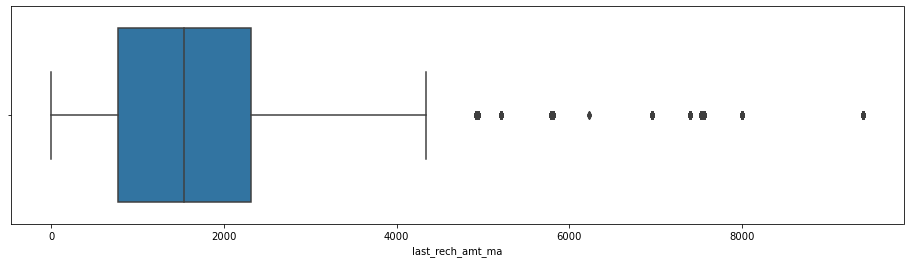

In [41]:
# data after removing the last quantile
plt.figure(figsize=(16,4))
sns.boxplot(df[df.last_rech_amt_ma < df.last_rech_amt_ma.quantile(0.99)]['last_rech_amt_ma'])

<AxesSubplot:xlabel='cnt_ma_rech30', ylabel='Density'>

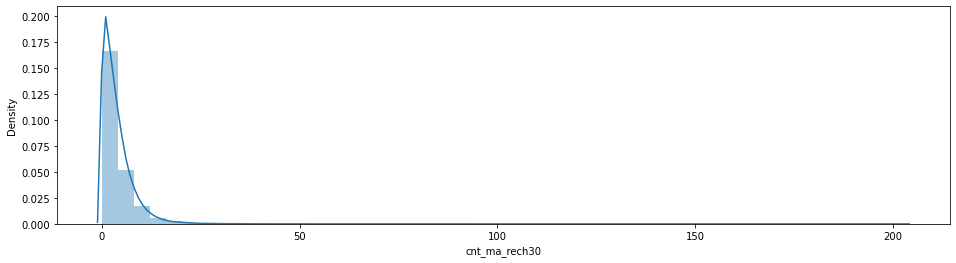

In [42]:
# number of times the recharge is done in the last 30 days and 90 days
plt.figure(figsize=(16,4))
sns.distplot(df.cnt_ma_rech30)

<AxesSubplot:xlabel='cnt_ma_rech90'>

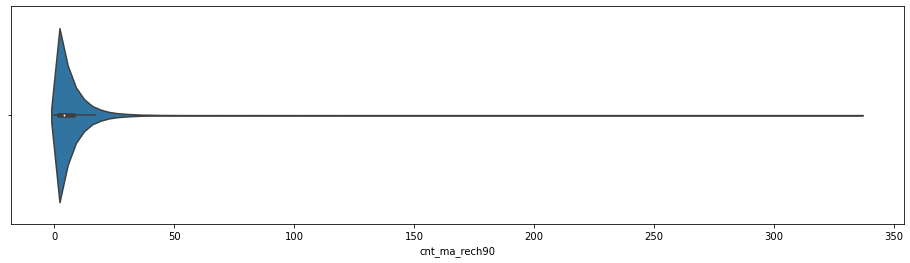

In [43]:
plt.figure(figsize=(16,4))
sns.violinplot(df.cnt_ma_rech90)

<AxesSubplot:xlabel='cnt_ma_rech30'>

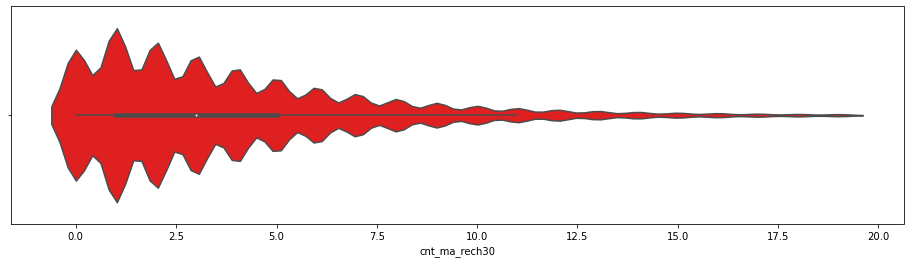

In [44]:
# getting rid of the last 1 qauntile ...
# data after removing the last quantile
plt.figure(figsize=(16,4))
sns.violinplot(df[df.cnt_ma_rech30 < df.cnt_ma_rech30.quantile(0.99)]['cnt_ma_rech30'],color='red')

In [45]:
# number of times te loan is taken by the user in 30 days and 90 days
df.cnt_loans30

1         2
2         1
3         1
4         2
5         7
         ..
209589    2
209590    3
209591    4
209592    2
209593    2
Name: cnt_loans30, Length: 209593, dtype: int64

<AxesSubplot:xlabel='cnt_da_rech90', ylabel='Density'>

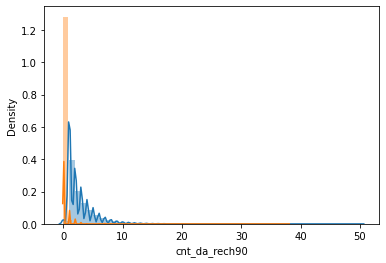

In [46]:
sns.distplot(df.cnt_loans30)
sns.distplot(df.cnt_da_rech90)

<AxesSubplot:xlabel='pcircle', ylabel='count'>

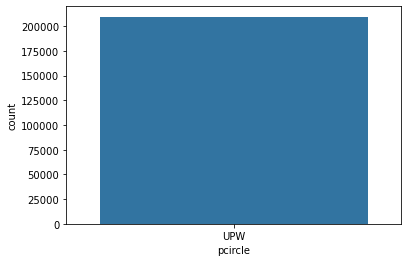

In [47]:
# total number of circles
sns.countplot(df.pcircle)

In [48]:
df.pcircle.value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [49]:
(df.amnt_loans90 / df.cnt_loans90  == df.maxamnt_loans90).value_counts()

True     186503
False     23090
dtype: int64

In [50]:
df[(df.amnt_loans90 / df.cnt_loans90  != df.maxamnt_loans90)]

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
37          1  41249I82731  1578.0  38740.076000      38935.57   4662.68   
38          1  01210I90840   725.0   9740.000000      16337.04    299.96   
45          1  82895I85329   277.0  15617.000000      17973.55   3638.78   
51          1  99293I70785   402.0   1750.000000       1807.37     99.56   
55          1  53152I70789   317.0   9463.000000      10921.38   1000.65   
...       ...          ...     ...           ...           ...       ...   
209587      1  60331I70370   254.0  20079.157333      20228.09   4003.12   
209588      1  19900I95200   239.0  14678.000000      14704.90  12935.26   
209591      1  28556I85350  1013.0  11843.111667      11904.35   5861.83   
209592      1  59712I82733  1732.0  12488.228333      12574.37    411.83   
209593      1  65061I85339  1581.0   4489.362000       4534.82    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
37       5416.68                1.0                0.0              4048  ...   
38       1457.22               15.0               63.0              5787  ...   
45       7819.71                6.0                0.0              2309  ...   
51        189.56                5.0                0.0               770  ...   
55       2820.48                7.0                0.0              1539  ...   
...          ...                ...                ...               ...  ...   
209587   5173.74                2.0                0.0              1539  ...   
209588  16775.60                8.0                0.0              3178  ...   
209591   8893.20                3.0                0.0              1539  ...   
209592    984.58                2.0               38.0               773  ...   
209593    631.20               13.0                0.0              7526  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
37                 12.0                 0.0         15.0           108   
38                 12.0                 1.0          4.0            30   
45                 12.0                 0.0          4.0            30   
51                 12.0                 0.0          2.0            18   
55                 12.0                 0.0          2.0            18   
...                 ...                 ...          ...           ...   
209587             12.0                 0.0         15.0           120   
209588             12.0                 1.0          3.0            24   
209591             12.0                 0.0          6.0            54   
209592             12.0                 0.0          3.0            24   
209593             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
37                   12                 0.0        2.0   1.875000      UPW   
38                   12                 0.5        7.5  19.750000      UPW   
45                   12                 0.0        0.0   7.000000      UPW   
51                   12                 0.0        0.0  40.500000      UPW   
55                   12                 0.0        0.0   2.500000      UPW   
...                 ...                 ...        ...        ...      ...   
209587               12                 0.0        3.0   2.400000      UPW   
209588               12                 1.0        0.0  30.000000      UPW   
209591               12                 0.0        4.0   3.833333      UPW   
209592               12                 0.0        0.0  10.500000      UPW   
209593               12                 0.0        0.0   0.000000      UPW   

             pdate  
37      2016-07-26  
38      2016-08-14  
45      2016-08-10  
51      2016-08-15  
55      2016-08-02  
...            ...  
209587  2016-07-22  
209588  2016-08-02  
209591  2016-07-29  
209592  2016-07-25  
209593  2016-07-07  

[23090 rows x 36 columns]

<AxesSubplot:xlabel='sumamnt_ma_rech30', ylabel='Density'>

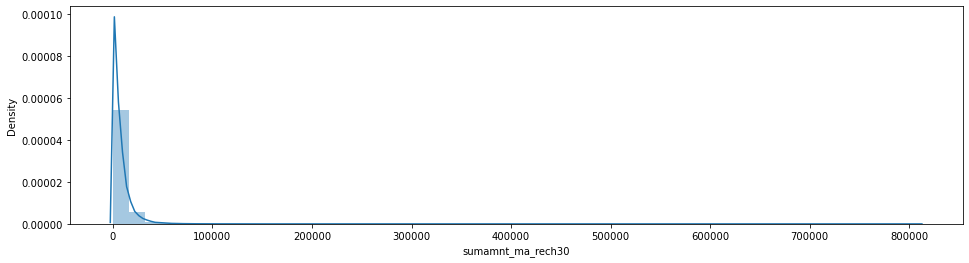

In [51]:
# sum of main recharge done in the last 30 days
plt.figure(figsize=(16,4))
sns.distplot(df.sumamnt_ma_rech30)

<AxesSubplot:xlabel='sumamnt_ma_rech30', ylabel='Density'>

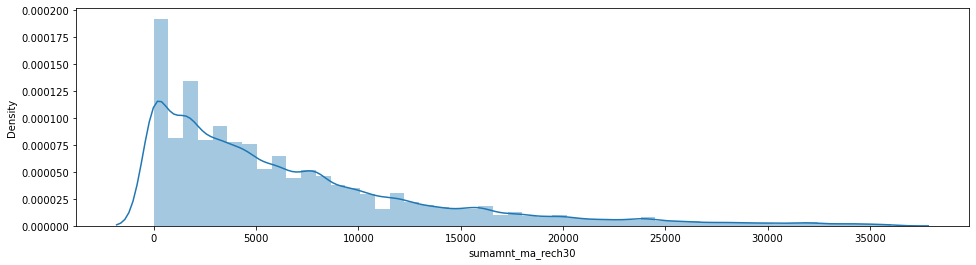

In [52]:
# result after removing the last 1 quantile of the data
# data after removing the last quantile
plt.figure(figsize=(16,4))
sns.distplot(df[df.sumamnt_ma_rech30 < df.sumamnt_ma_rech30.quantile(0.98)]['sumamnt_ma_rech30'])

In [53]:
# max amount loans taken by the users
df.maxamnt_loans90.value_counts()

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

In [54]:
df.maxamnt_loans90.value_counts() / len(df) * 100

6     86.331605
12    12.693649
0      0.974746
Name: maxamnt_loans90, dtype: float64

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='count'>

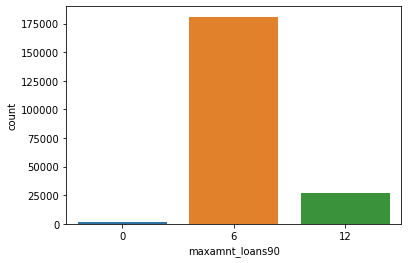

In [55]:
sns.countplot(df.maxamnt_loans90)

In [56]:
df.payback90.describe()

count    209593.000000
mean          4.321485
std          10.308108
min           0.000000
25%           0.000000
50%           1.666667
75%           4.500000
max         171.500000
Name: payback90, dtype: float64

<AxesSubplot:xlabel='payback90', ylabel='Density'>

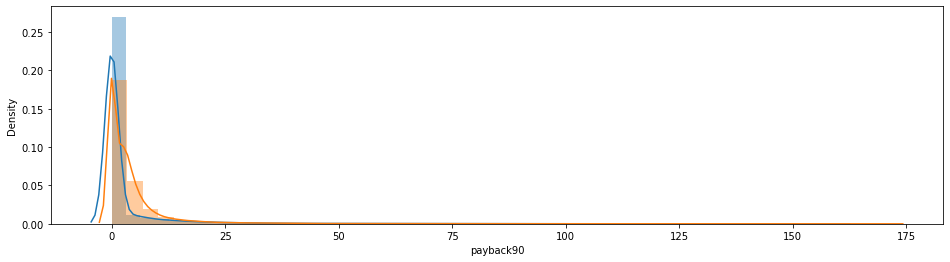

In [57]:
plt.figure(figsize=(16,4))
sns.distplot(df[df.label == 0].payback90)
sns.distplot(df[df.label == 1].payback90)

In [58]:
df[df.label == 0].payback90.sort_values()

104427      0.0
132692      0.0
132685      0.0
132666      0.0
132653      0.0
          ...  
155770    152.0
142811    152.5
89809     153.0
54909     153.5
171391    158.0
Name: payback90, Length: 26162, dtype: float64

<AxesSubplot:xlabel='daily_decr90', ylabel='rental90'>

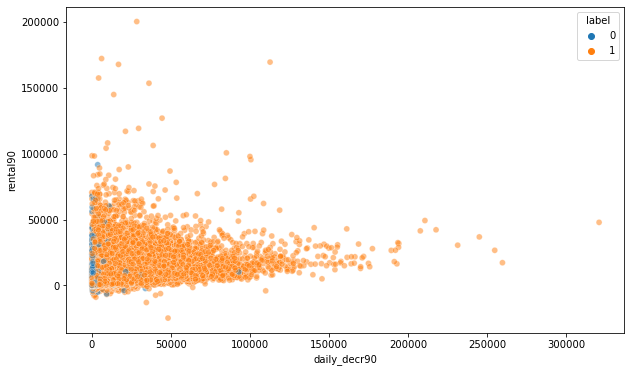

In [59]:
# daily usage vs bal
plt.figure(figsize=(10,6))
sns.scatterplot(df.daily_decr90,df.rental90,hue=df.label,alpha=0.5)

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='count'>

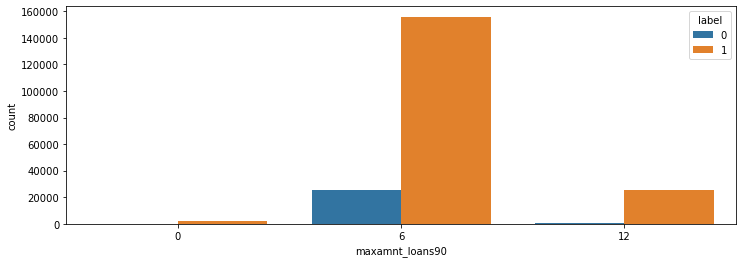

In [60]:
plt.figure(figsize=(12,4))
sns.countplot(df.maxamnt_loans90,hue=df.label)

In [61]:
df.iloc[:,2:-2].head()

aon  daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  \
1  272.0   3055.050000   3065.150000    220.13    260.13                2.0   
2  712.0  12122.000000  12124.750000   3691.26   3691.26               20.0   
3  535.0   1398.000000   1398.000000    900.13    900.13                3.0   
4  241.0     21.228000     21.228000    159.42    159.42               41.0   
5  947.0    150.619333    150.619333   1098.90   1098.90                4.0   

   last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  ...  \
1                0.0              1539              2          21.0  ...   
2                0.0              5787              1           0.0  ...   
3                0.0              1539              1           0.0  ...   
4                0.0               947              0           0.0  ...   
5                0.0              2309              7           2.0  ...   

   cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
1            2            12              6.0                 0.0   
2            1            12             12.0                 0.0   
3            1             6              6.0                 0.0   
4            2            12              6.0                 0.0   
5            7            42              6.0                 0.0   

   cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
1          2.0            12                6                 0.0  29.000000   
2          1.0            12               12                 0.0   0.000000   
3          1.0             6                6                 0.0   0.000000   
4          2.0            12                6                 0.0   0.000000   
5          7.0            42                6                 0.0   2.333333   

   payback90  
1  29.000000  
2   0.000000  
3   0.000000  
4   0.000000  
5   2.333333  

[5 rows x 32 columns]

In [62]:
# cluster analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [63]:
from sklearn.cluster import AffinityPropagation,KMeans
cluster_analysis = KMeans(n_clusters=2)
df_cleaned = df.iloc[:,2:-2].copy()   # chck pt 1
df_cleaned['label'] = df.label
df_cleaned.head()

aon  daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  \
1  272.0   3055.050000   3065.150000    220.13    260.13                2.0   
2  712.0  12122.000000  12124.750000   3691.26   3691.26               20.0   
3  535.0   1398.000000   1398.000000    900.13    900.13                3.0   
4  241.0     21.228000     21.228000    159.42    159.42               41.0   
5  947.0    150.619333    150.619333   1098.90   1098.90                4.0   

   last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  ...  \
1                0.0              1539              2          21.0  ...   
2                0.0              5787              1           0.0  ...   
3                0.0              1539              1           0.0  ...   
4                0.0               947              0           0.0  ...   
5                0.0              2309              7           2.0  ...   

   amnt_loans30  maxamnt_loans30  medianamnt_loans30  cnt_loans90  \
1            12              6.0                 0.0          2.0   
2            12             12.0                 0.0          1.0   
3             6              6.0                 0.0          1.0   
4            12              6.0                 0.0          2.0   
5            42              6.0                 0.0          7.0   

   amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  payback90  \
1            12                6                 0.0  29.000000  29.000000   
2            12               12                 0.0   0.000000   0.000000   
3             6                6                 0.0   0.000000   0.000000   
4            12                6                 0.0   0.000000   0.000000   
5            42                6                 0.0   2.333333   2.333333   

   label  
1      0  
2      1  
3      1  
4      1  
5      1  

[5 rows x 33 columns]

In [64]:
cluster_analysis.fit(df_cleaned.iloc[:,:-1])

KMeans(n_clusters=2)

In [65]:
cluster_analysis.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
y_hat = cluster_analysis.predict(df_cleaned.iloc[:,:-1])
clusters = np.unique(y_hat)
clusters

array([0, 1])

<AxesSubplot:xlabel='daily_decr90', ylabel='last_rech_amt_ma'>

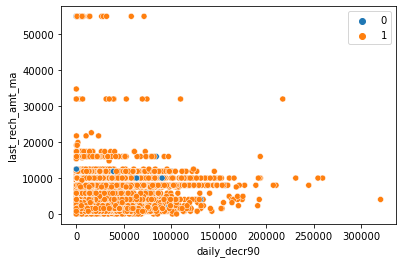

In [67]:
sns.scatterplot(df.daily_decr90,df.last_rech_amt_ma,hue=np.where(cluster_analysis.labels_ == 0,1,0))

<AxesSubplot:xlabel='daily_decr90', ylabel='last_rech_amt_ma'>

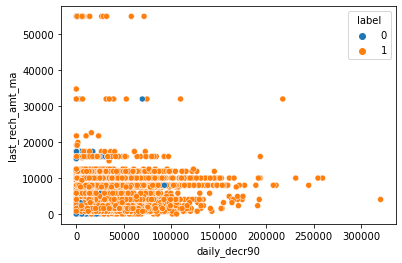

In [68]:
sns.scatterplot(df.daily_decr90,df.last_rech_amt_ma,hue=df.label)

In [69]:
df_cleaned.head()

aon  daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  \
1  272.0   3055.050000   3065.150000    220.13    260.13                2.0   
2  712.0  12122.000000  12124.750000   3691.26   3691.26               20.0   
3  535.0   1398.000000   1398.000000    900.13    900.13                3.0   
4  241.0     21.228000     21.228000    159.42    159.42               41.0   
5  947.0    150.619333    150.619333   1098.90   1098.90                4.0   

   last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  ...  \
1                0.0              1539              2          21.0  ...   
2                0.0              5787              1           0.0  ...   
3                0.0              1539              1           0.0  ...   
4                0.0               947              0           0.0  ...   
5                0.0              2309              7           2.0  ...   

   amnt_loans30  maxamnt_loans30  medianamnt_loans30  cnt_loans90  \
1            12              6.0                 0.0          2.0   
2            12             12.0                 0.0          1.0   
3             6              6.0                 0.0          1.0   
4            12              6.0                 0.0          2.0   
5            42              6.0                 0.0          7.0   

   amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  payback90  \
1            12                6                 0.0  29.000000  29.000000   
2            12               12                 0.0   0.000000   0.000000   
3             6                6                 0.0   0.000000   0.000000   
4            12                6                 0.0   0.000000   0.000000   
5            42                6                 0.0   2.333333   2.333333   

   label  
1      0  
2      1  
3      1  
4      1  
5      1  

[5 rows x 33 columns]

In [70]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   aon                   209593 non-null  float64
 1   daily_decr30          209593 non-null  float64
 2   daily_decr90          209593 non-null  float64
 3   rental30              209593 non-null  float64
 4   rental90              209593 non-null  float64
 5   last_rech_date_ma     209593 non-null  float64
 6   last_rech_date_da     209593 non-null  float64
 7   last_rech_amt_ma      209593 non-null  int64  
 8   cnt_ma_rech30         209593 non-null  int64  
 9   fr_ma_rech30          209593 non-null  float64
 10  sumamnt_ma_rech30     209593 non-null  float64
 11  medianamnt_ma_rech30  209593 non-null  float64
 12  medianmarechprebal30  209593 non-null  float64
 13  cnt_ma_rech90         209593 non-null  int64  
 14  fr_ma_rech90          209593 non-null  int64  
 15  

In [71]:
# let's detect outliers using the boxplot
# let's see the what are the results after treating the outliers using  z-score
# but first lets remove the geatures that have less than 5 categories
cont_var = []
dis_num_var = []
for col in df_cleaned.columns:
    if len(df_cleaned.loc[:,col].unique()) > 10:
        cont_var.append(col)
    else:
        dis_num_var.append(col)
cont_var

['aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'payback30',
 'payback90']

In [72]:
dis_num_var

['medianamnt_loans30', 'maxamnt_loans90', 'medianamnt_loans90', 'label']

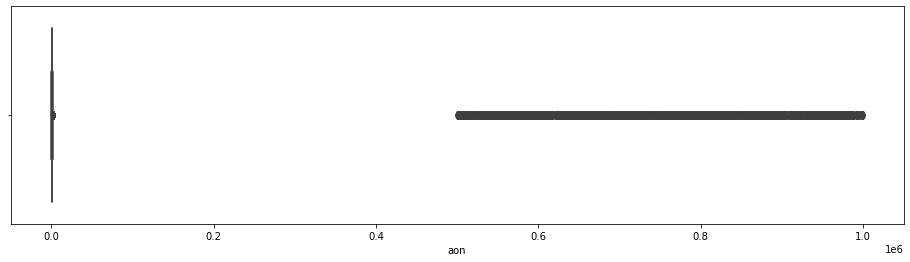

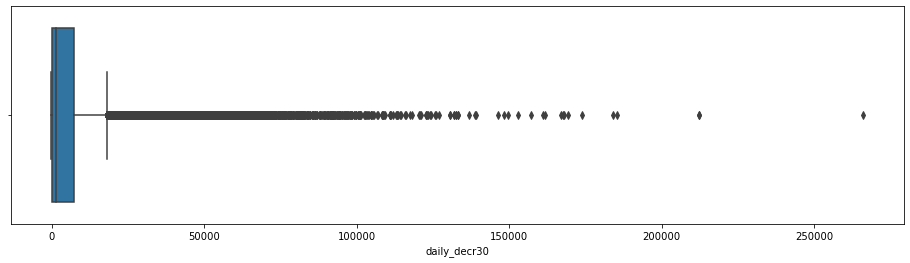

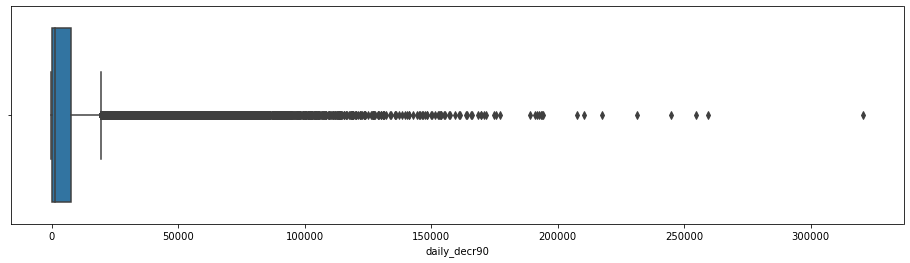

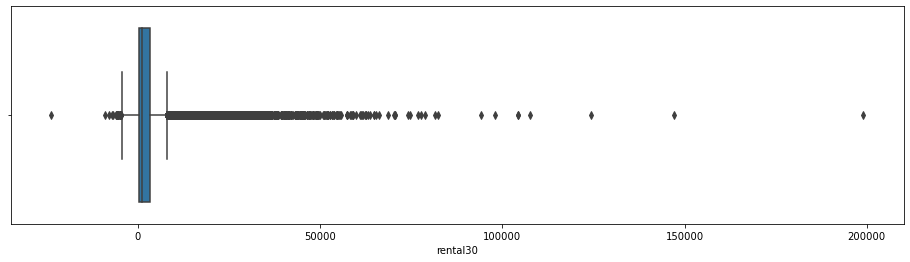

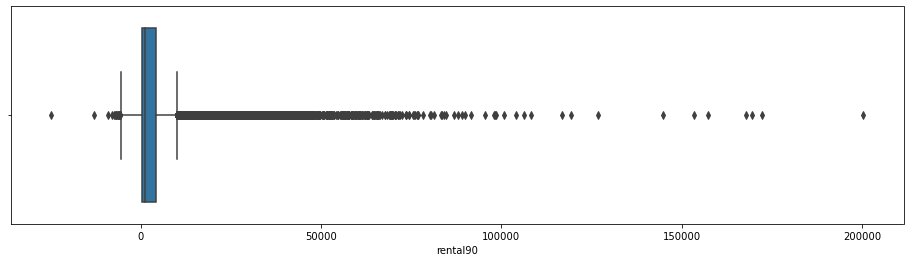

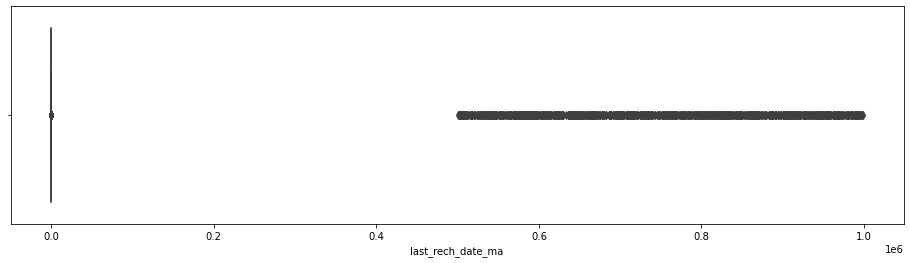

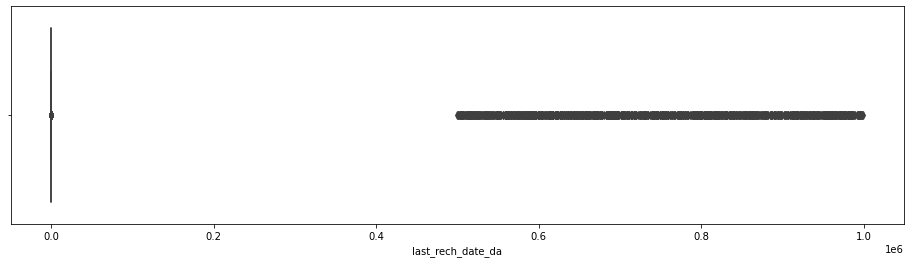

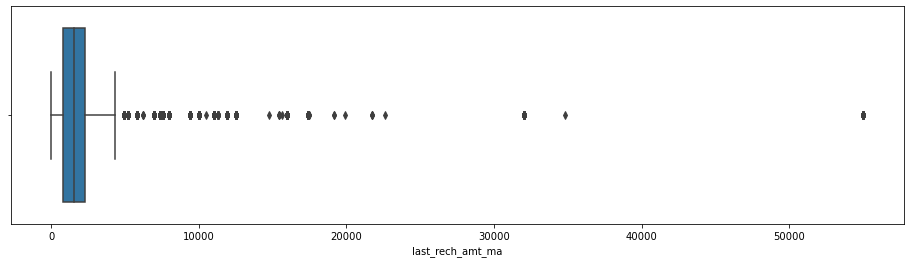

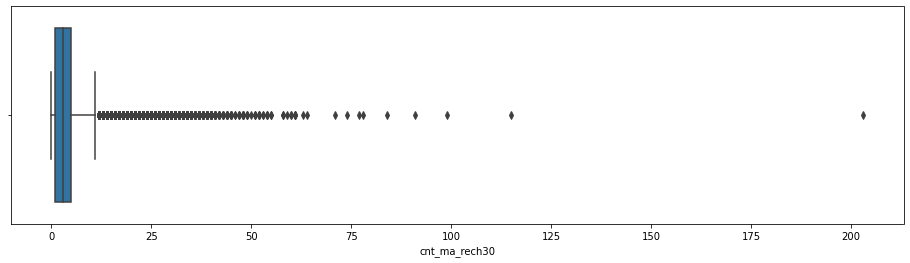

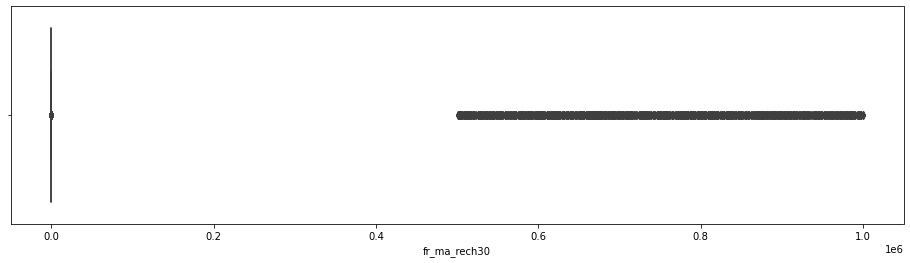

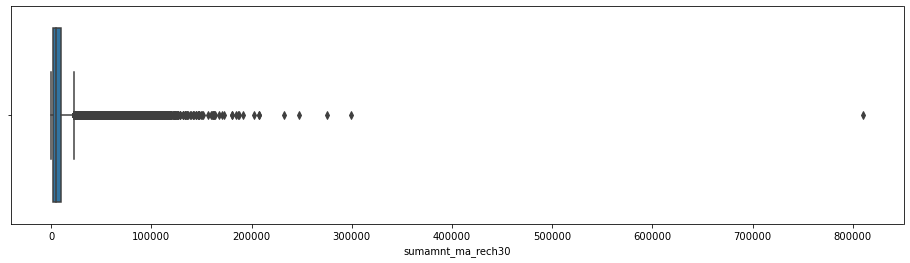

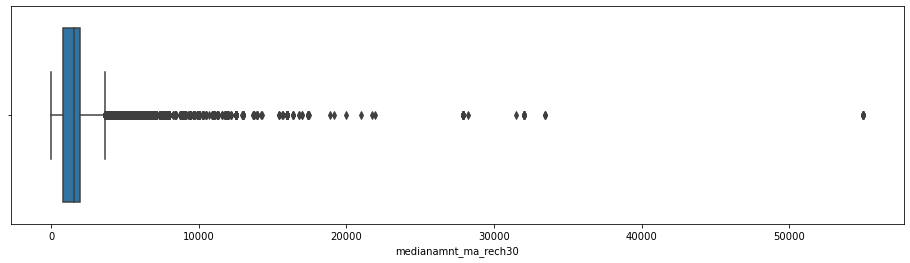

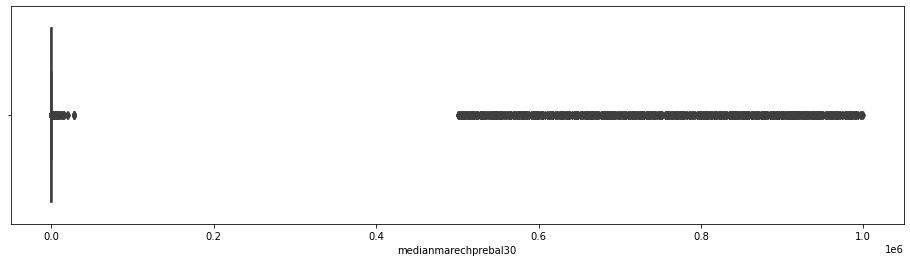

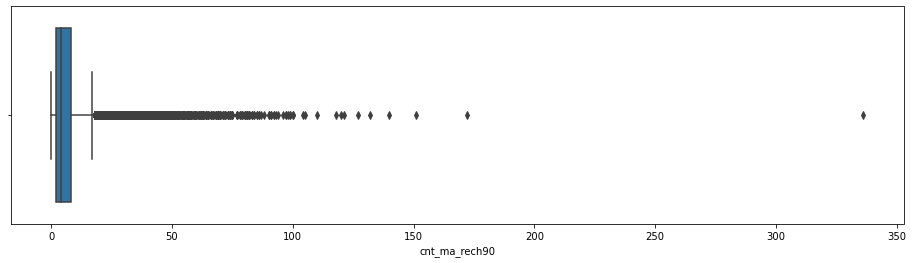

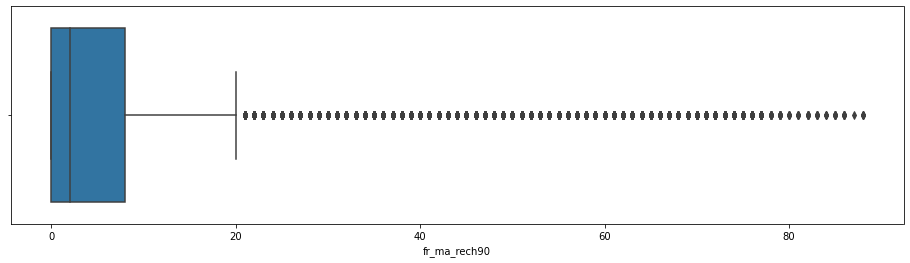

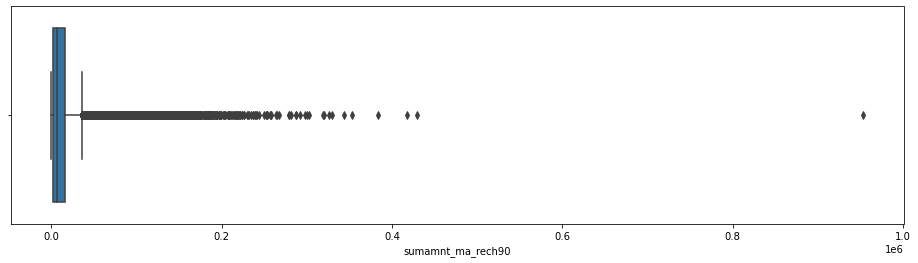

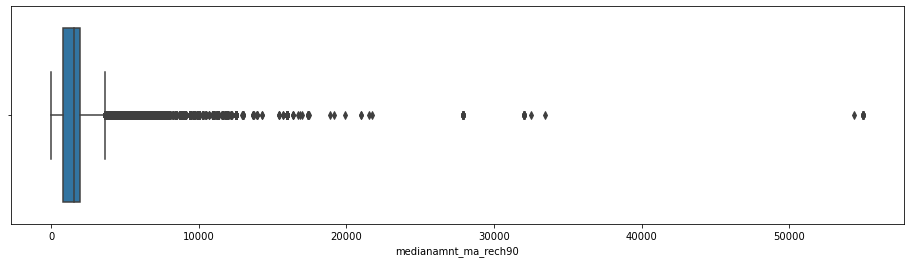

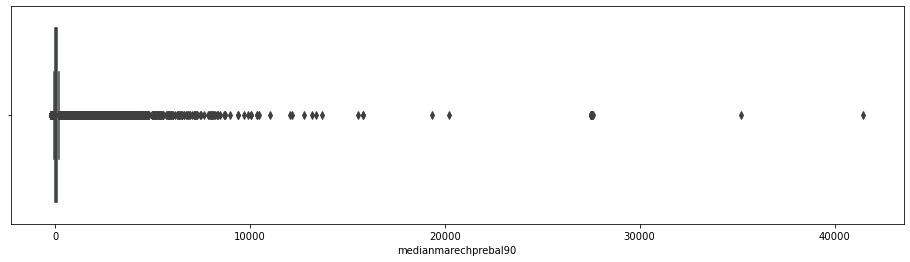

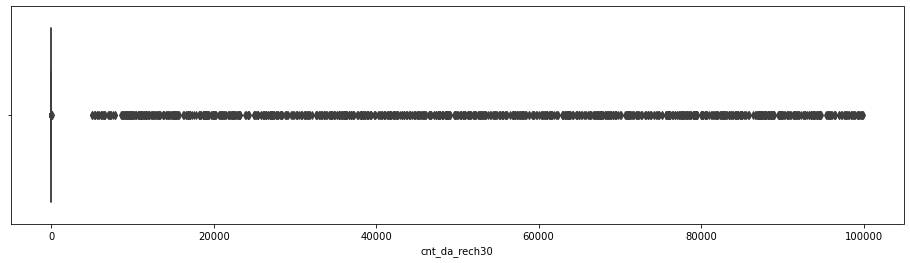

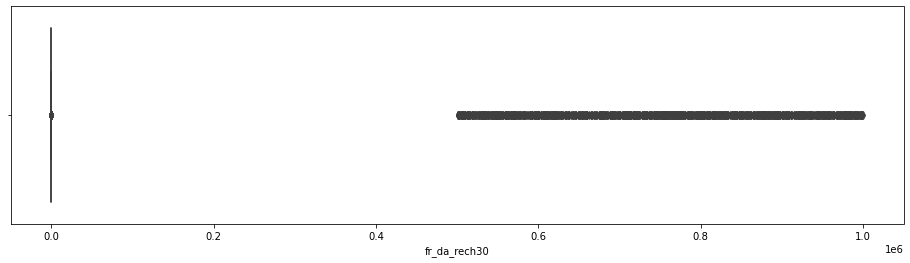

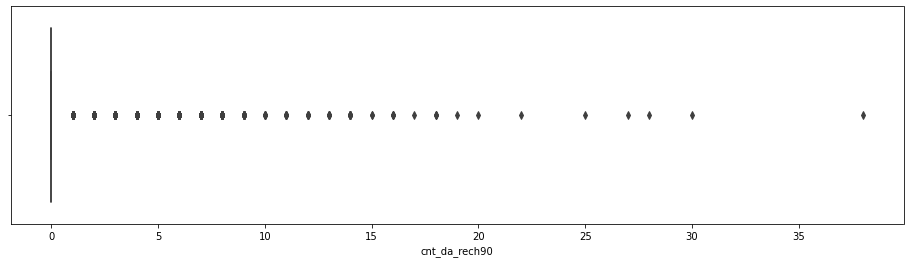

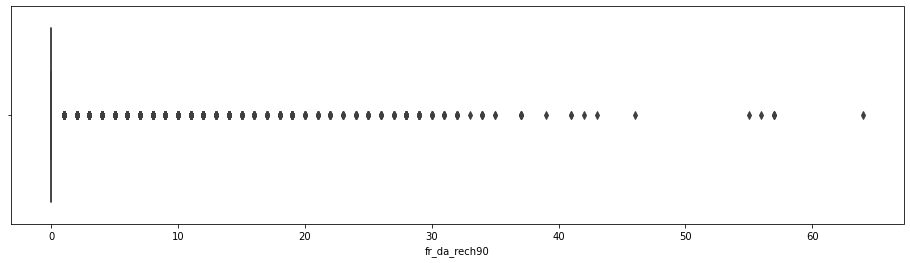

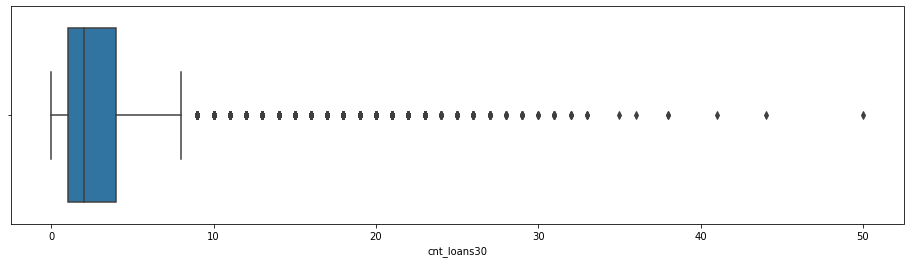

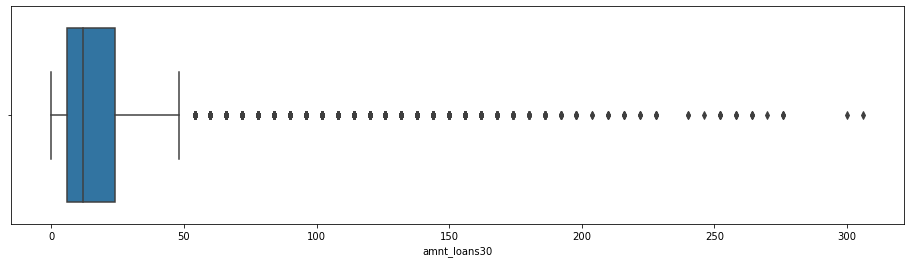

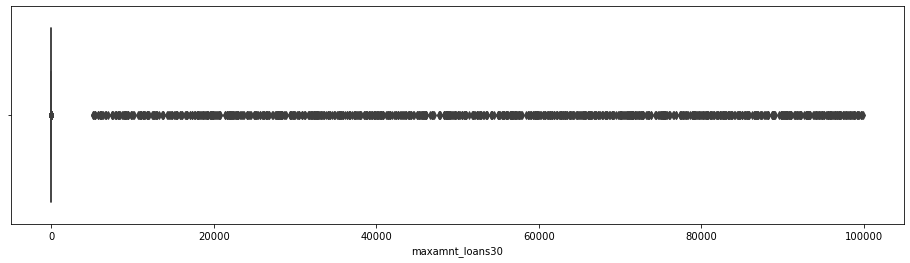

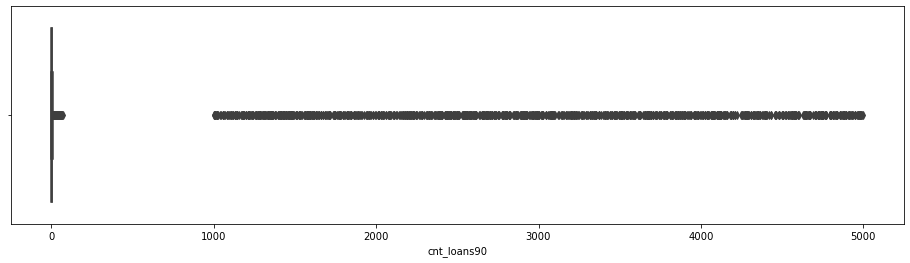

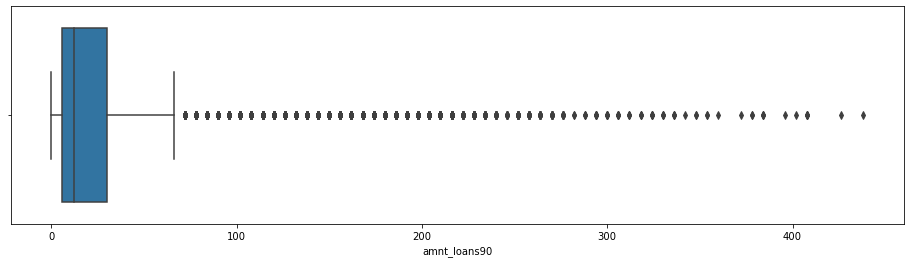

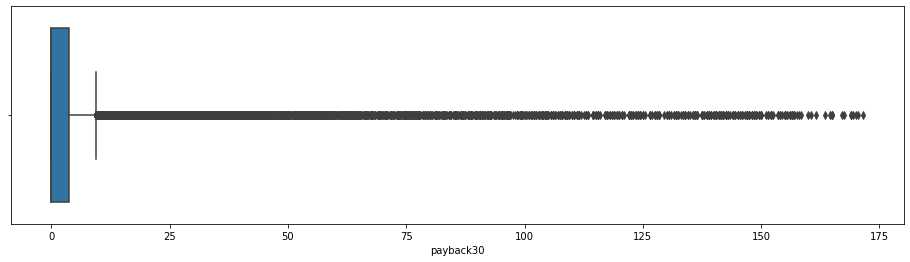

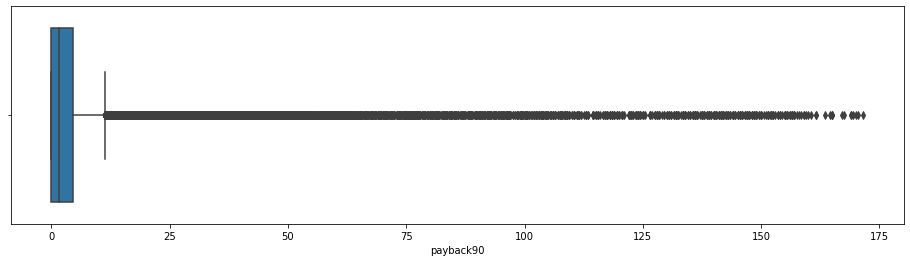

In [73]:
for col in cont_var:
    plt.figure(figsize=(16,4))
    sns.boxplot(df_cleaned[col])

In [74]:
# yes, these are definitely outliers , let's remove those outliers and put this variable into the dis_num_var variable.
df_cleaned[df_cleaned.maxamnt_loans30 > 20 ]

aon  daily_decr30  daily_decr90  rental30  rental90  \
119     1454.0     19.578667     19.578667    148.88    148.88   
126      811.0    166.796667    166.796667    -44.88    -44.88   
147      198.0  18301.000000  28936.470000   8634.10  11994.34   
370     1737.0     33.000000     33.000000    130.05    130.05   
375      603.0   9970.000000  10770.000000   9343.38  15443.96   
...        ...           ...           ...       ...       ...   
209190  1211.0  16039.000000  18645.190000   8391.52  11936.73   
209263   904.0     96.906667     96.906667   2516.20   2516.20   
209332  1846.0     55.680000     55.680000   1140.16   1140.16   
209393  1639.0     52.031333     52.031333    957.10    957.10   
209425  1246.0    113.715000    113.715000   2229.66   2229.66   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
119                   1.0                0.0               770              4   
126                   4.0                0.0              2309              9   
147                   1.0                0.0              4048              5   
370                   1.0                0.0               773              2   
375                   9.0                0.0               770              9   
...                   ...                ...               ...            ...   
209190                2.0                0.0              1539              5   
209263                5.0                0.0              7526              2   
209332                5.0                0.0              2309              2   
209393                3.0                0.0              1539              6   
209425                1.0                0.0              8000              4   

        fr_ma_rech30  ...  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
119              5.0  ...            30     61907.697372                 0.0   
126              0.0  ...            24     22099.413732                 0.5   
147             11.0  ...            12     98745.934048                 0.5   
370              6.0  ...            12     58925.364061                 0.0   
375              0.0  ...            24     78232.464324                 0.0   
...              ...  ...           ...              ...                 ...   
209190           3.0  ...            60     50824.996349                 1.0   
209263          10.0  ...             6     17324.994582                 0.0   
209332           5.0  ...            18     92864.501728                 0.0   
209393           2.0  ...            36     54259.265687                 0.0   
209425          15.0  ...             6     96927.243252                 0.0   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
119             5.0            30                6                 0.0   
126             4.0            24                6                 0.5   
147             8.0            48                6                 0.0   
370             2.0            12                6                 0.0   
375             3.0            24               12                 0.0   
...             ...           ...              ...                 ...   
209190         11.0            96               12                 1.0   
209263          1.0             6                6                 0.0   
209332          3.0            18                6                 0.0   
209393          6.0            36                6                 0.0   
209425          1.0             6                6                 0.0   

        payback30  payback90  label  
119      3.500000   3.500000      1  
126      2.333333   2.333333      1  
147      2.500000   1.750000      1  
370      9.500000   9.500000      1  
375      3.333333  32.000000      1  
...           ...        ...    ...  
209190   5.400000   4.900000      1  
209263   0.000000   0.000000      1  
209332   3.500000   3.500000      1  
209393   3.8000

In [75]:
# drop these 1047 samples
df_cleaned = df_cleaned[df_cleaned.maxamnt_loans30 < 20 ].copy()

In [76]:
cont_var = []
dis_num_var = []
for col in df_cleaned.columns:
    if len(df_cleaned.loc[:,col].unique()) > 10:
        cont_var.append(col)
    else:
        dis_num_var.append(col)
df_cleaned.maxamnt_loans30.value_counts()

6.0     179193
12.0     26109
0.0       3244
Name: maxamnt_loans30, dtype: int64

In [77]:
dis_num_var

['maxamnt_loans30',
 'medianamnt_loans30',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'label']

In [78]:
df_cleaned[df_cleaned.maxamnt_loans30 > 20 ]

Empty DataFrame
Columns: [aon, daily_decr30, daily_decr90, rental30, rental90, last_rech_date_ma, last_rech_date_da, last_rech_amt_ma, cnt_ma_rech30, fr_ma_rech30, sumamnt_ma_rech30, medianamnt_ma_rech30, medianmarechprebal30, cnt_ma_rech90, fr_ma_rech90, sumamnt_ma_rech90, medianamnt_ma_rech90, medianmarechprebal90, cnt_da_rech30, fr_da_rech30, cnt_da_rech90, fr_da_rech90, cnt_loans30, amnt_loans30, maxamnt_loans30, medianamnt_loans30, cnt_loans90, amnt_loans90, maxamnt_loans90, medianamnt_loans90, payback30, payback90, label]
Index: []

[0 rows x 33 columns]

In [79]:
z_scores = stats.zscore(df_cleaned.drop('label',1))

abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

df_with_no_outliers = df_cleaned[filtered_entries]
len(df_with_no_outliers)

160511

In [80]:
len(df_cleaned)

208546

In [81]:
(len(df_cleaned) - len(df_with_no_outliers) )/ len(df_cleaned) * 100

23.033287619997505

In [82]:
# let's make a X and y split
X = df.iloc[:,2:-2].copy()
y = df.label
X.head()

aon  daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  \
1  272.0   3055.050000   3065.150000    220.13    260.13                2.0   
2  712.0  12122.000000  12124.750000   3691.26   3691.26               20.0   
3  535.0   1398.000000   1398.000000    900.13    900.13                3.0   
4  241.0     21.228000     21.228000    159.42    159.42               41.0   
5  947.0    150.619333    150.619333   1098.90   1098.90                4.0   

   last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  ...  \
1                0.0              1539              2          21.0  ...   
2                0.0              5787              1           0.0  ...   
3                0.0              1539              1           0.0  ...   
4                0.0               947              0           0.0  ...   
5                0.0              2309              7           2.0  ...   

   cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
1            2            12              6.0                 0.0   
2            1            12             12.0                 0.0   
3            1             6              6.0                 0.0   
4            2            12              6.0                 0.0   
5            7            42              6.0                 0.0   

   cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
1          2.0            12                6                 0.0  29.000000   
2          1.0            12               12                 0.0   0.000000   
3          1.0             6                6                 0.0   0.000000   
4          2.0            12                6                 0.0   0.000000   
5          7.0            42                6                 0.0   2.333333   

   payback90  
1  29.000000  
2   0.000000  
3   0.000000  
4   0.000000  
5   2.333333  

[5 rows x 32 columns]

In [83]:
y.head()

1    0
2    1
3    1
4    1
5    1
Name: label, dtype: int64

In [84]:
X.shape,y.shape

((209593, 32), (209593,))

In [85]:
from sklearn.model_selection import train_test_split
# stratified train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101,stratify = y)
def get_split_percentage(X,y):
    return X.join(y).label.value_counts() / len(X) * 100
get_split_percentage(X,y)

1    87.517713
0    12.482287
Name: label, dtype: float64

In [86]:
get_split_percentage(X_test,y_test)

1    87.517097
0    12.482903
Name: label, dtype: float64

In [87]:
# create a helper function which will help us in evaluationg different alogrithms
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.model_selection import cross_val_score
def train_n_ret_score(model):
    model.fit(X_train,y_train)
    return roc_auc_score(y_test,model.predict(X_test)),f1_score(y_test,model.predict(X_test))

In [88]:
# let's importing all the model 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [89]:
train_n_ret_score(LogisticRegression())

(0.5775248235956597, 0.9282653283875192)

In [90]:
train_n_ret_score(DecisionTreeClassifier())

(0.705903588226281, 0.9232397321510026)

In [91]:
train_n_ret_score(RandomForestClassifier()) # best base score model

(0.7122354249188537, 0.9519019509225191)

In [92]:
train_n_ret_score(GaussianNB())

(0.692262030193598, 0.6603287874615357)

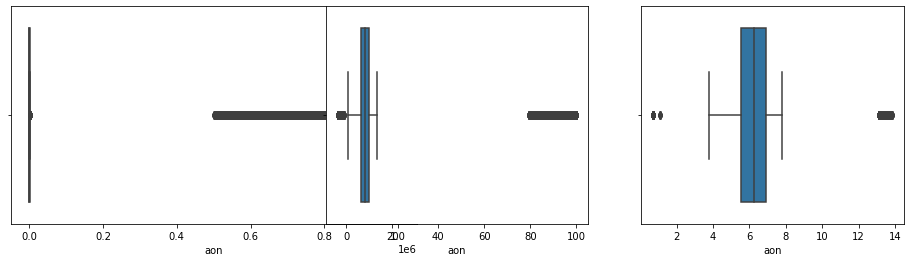

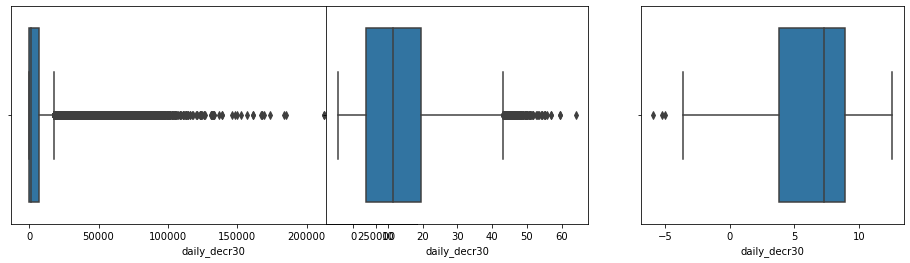

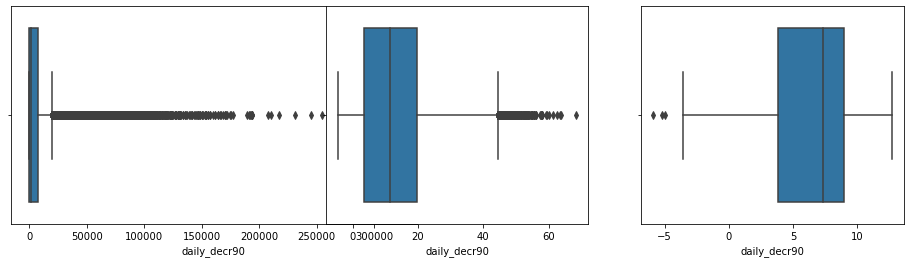

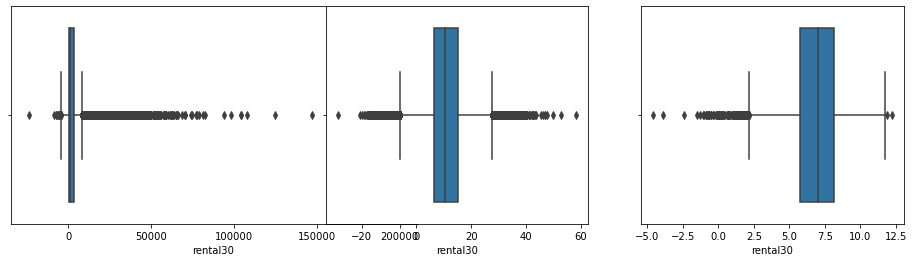

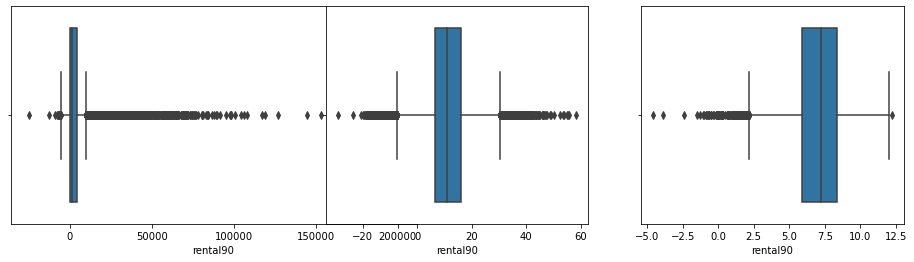

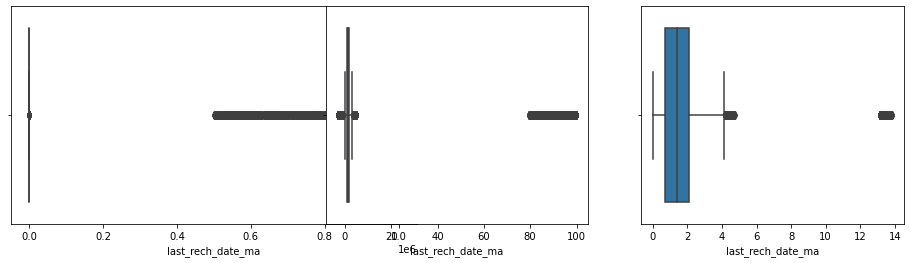

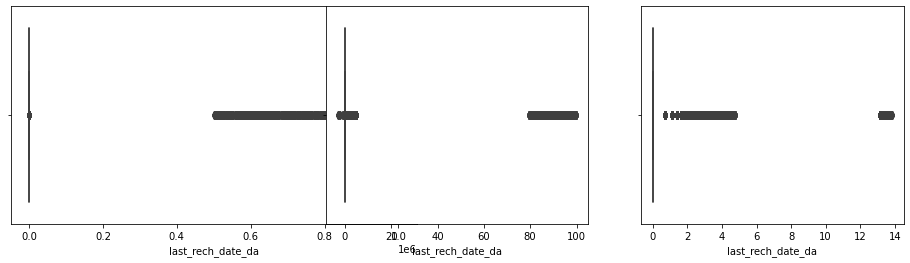

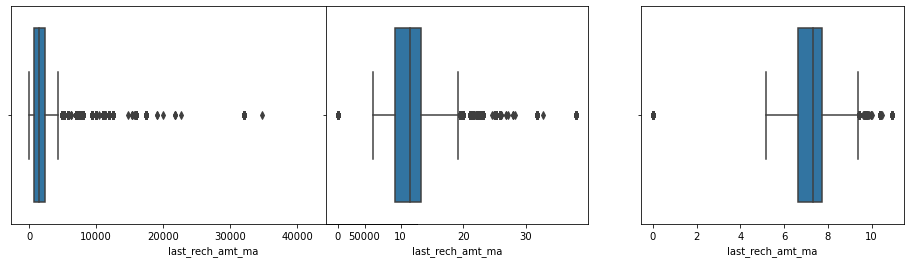

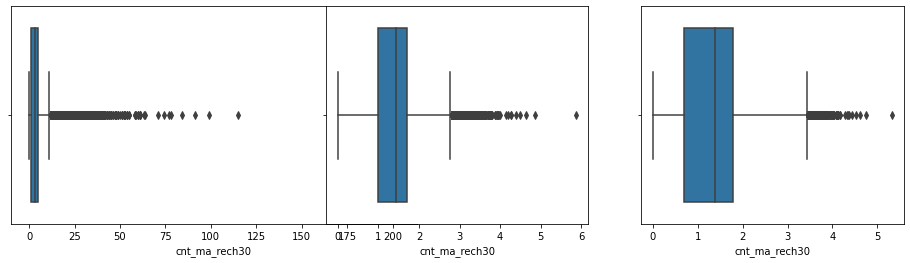

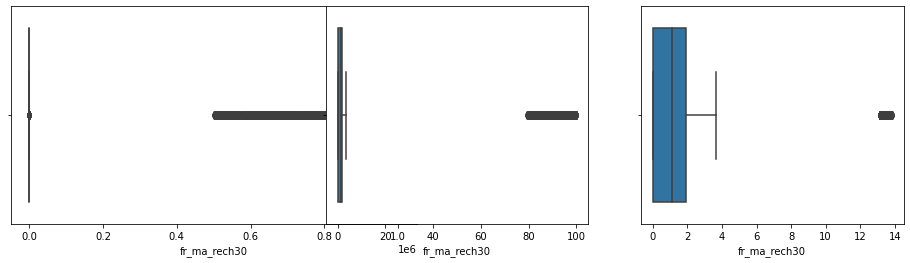

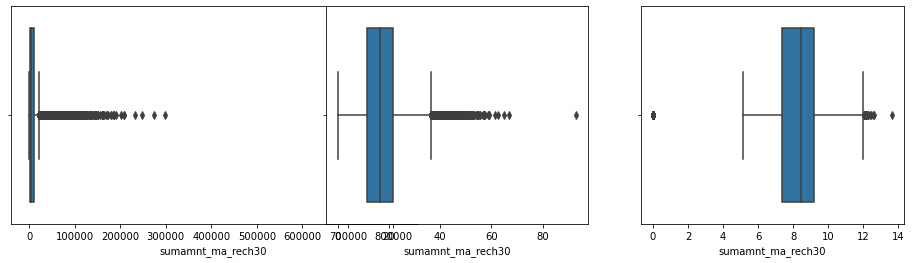

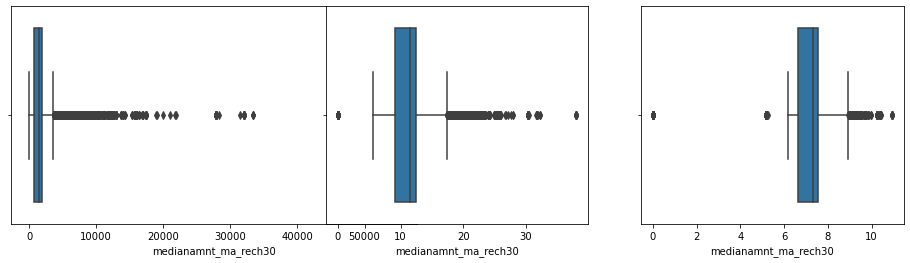

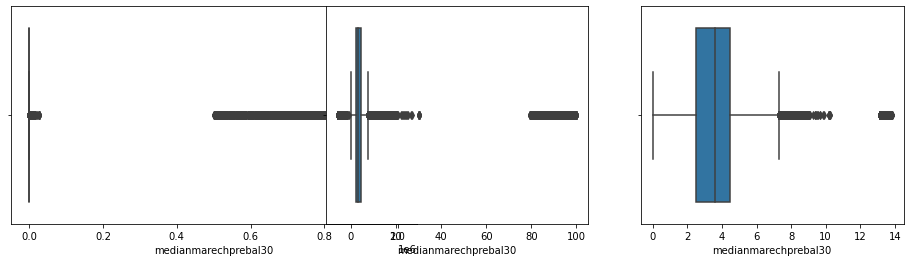

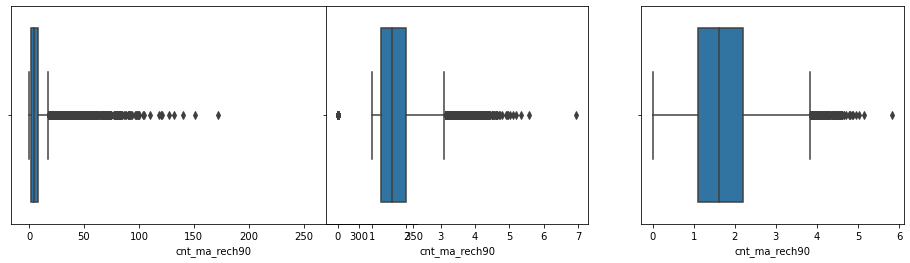

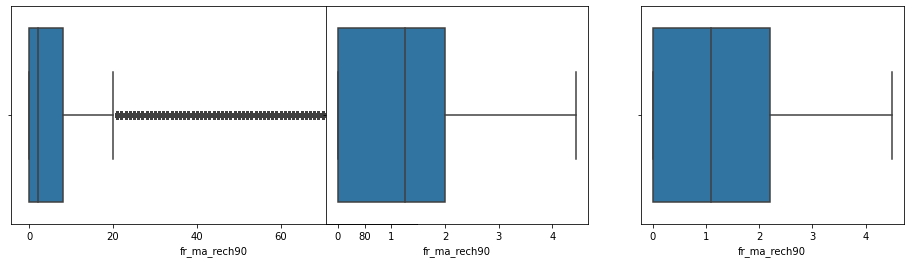

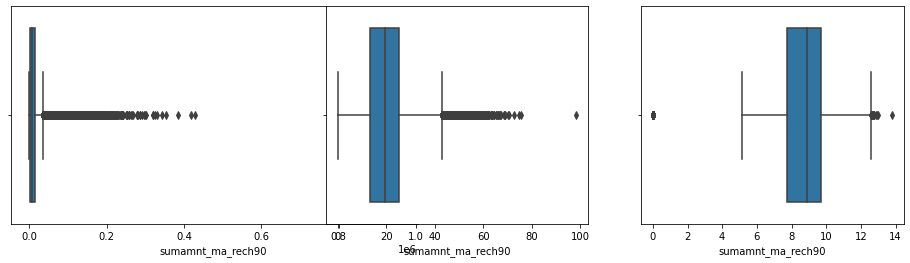

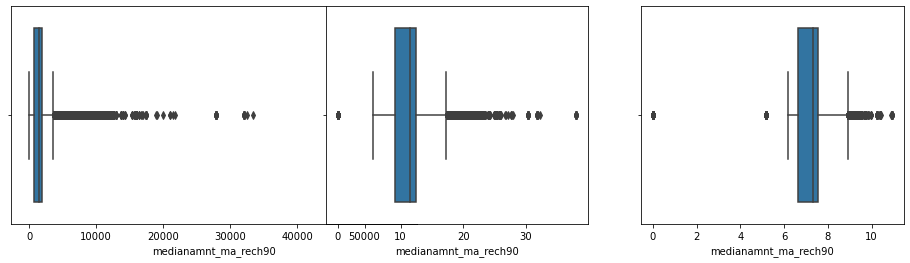

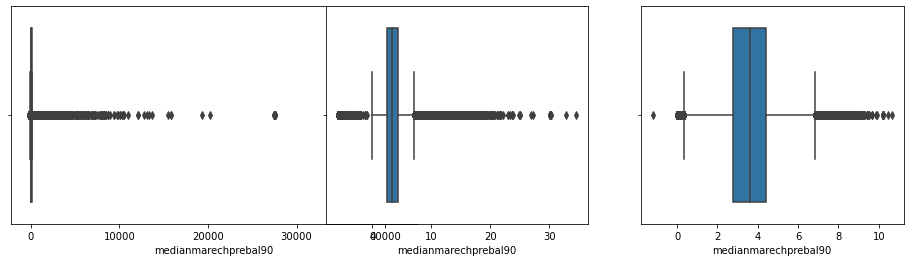

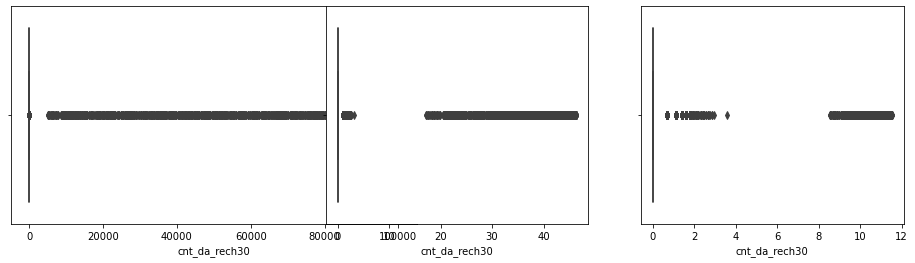

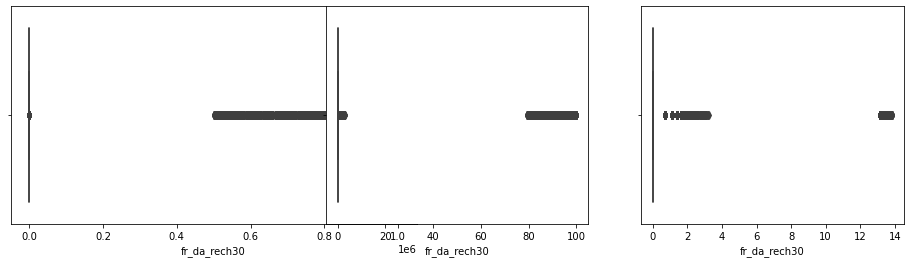

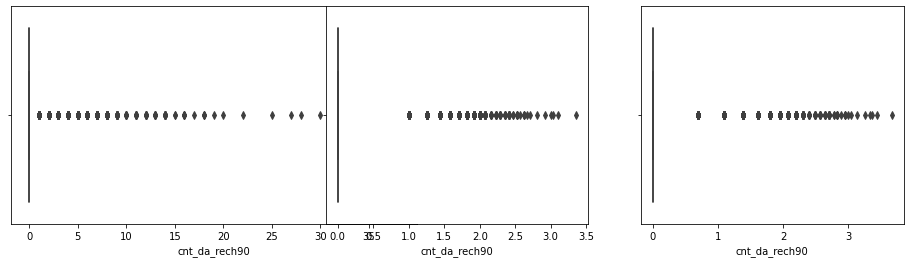

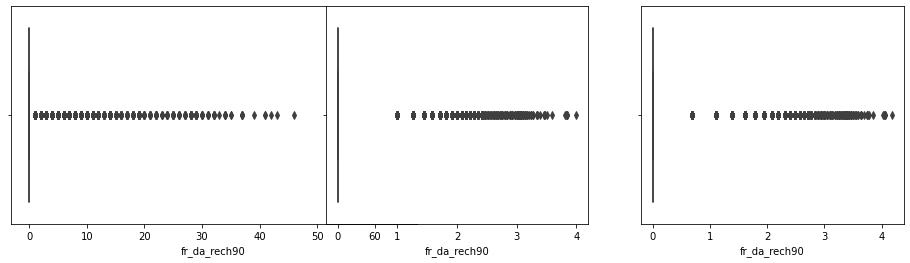

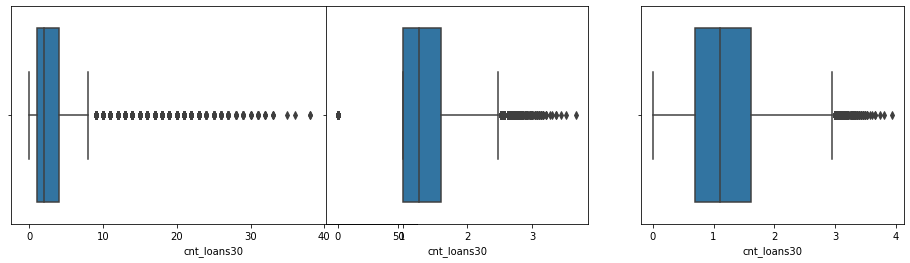

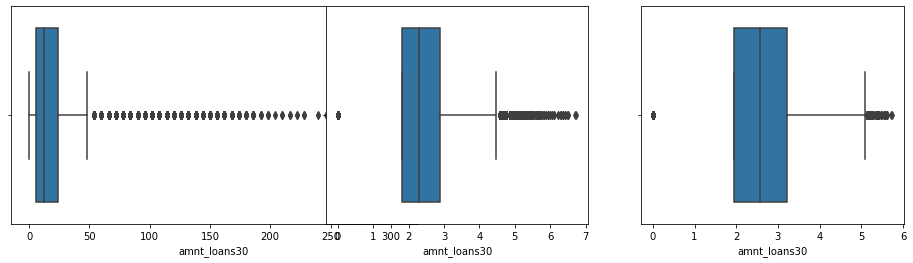

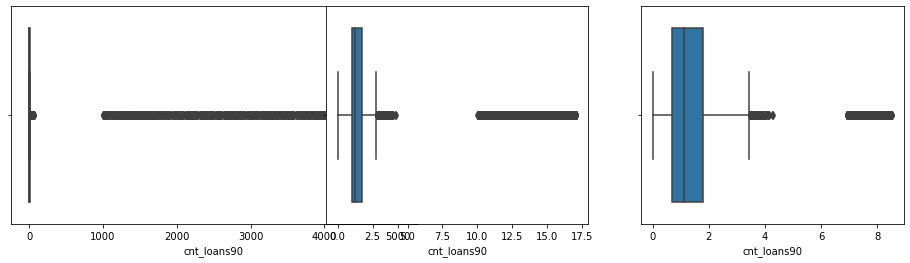

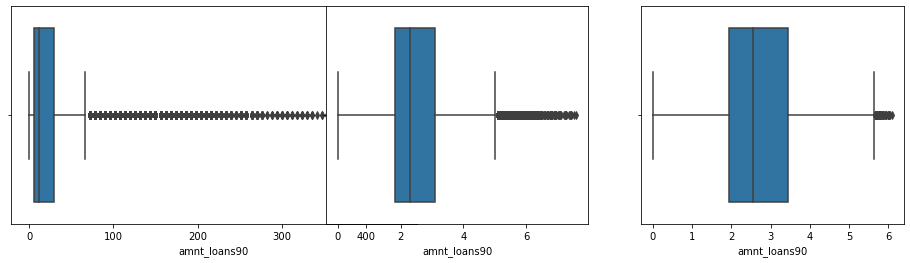

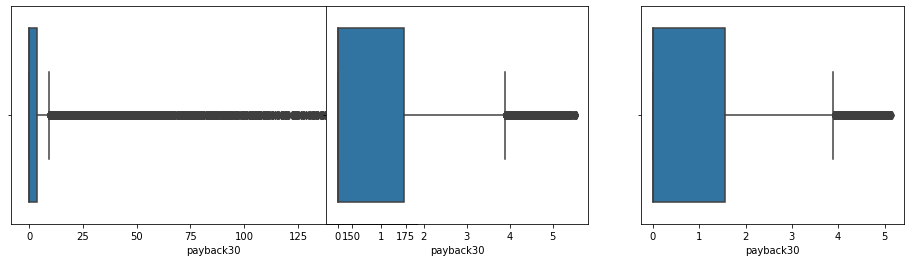

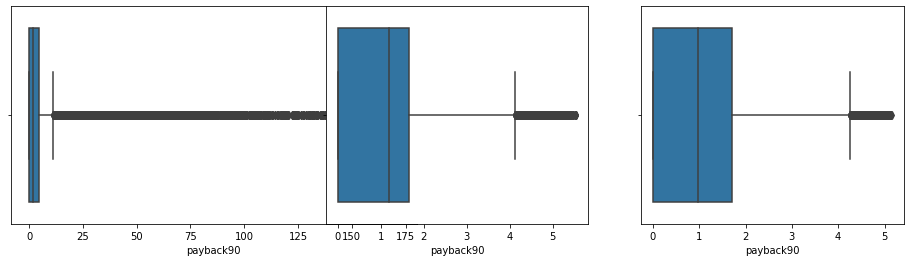

In [93]:
#Skew-transformation
#let's try skew transforations and then remove the outliers
for col in cont_var:
    fig = plt.figure(figsize=(16,4))
    
    fig.add_subplot(121)
    sns.boxplot(df_cleaned[col])
    
    fig.add_subplot(132)
    sns.boxplot(np.cbrt(df_cleaned[col])) 
    
    fig.add_subplot(133)
    sns.boxplot(np.log1p(df_cleaned[col]))  # log transforation is ivalid here as our dataset contains zeros and -ve values # just visualizing and compa

In [94]:
# we can see that the cbrt transformation is working better on this dataset.
df_new = np.cbrt(df_cleaned[cont_var])  # chck pt 2
df_new = df_new.join(df_cleaned[dis_num_var])
df_new.isna().mean()

aon                     0.0
daily_decr30            0.0
daily_decr90            0.0
rental30                0.0
rental90                0.0
last_rech_date_ma       0.0
last_rech_date_da       0.0
last_rech_amt_ma        0.0
cnt_ma_rech30           0.0
fr_ma_rech30            0.0
sumamnt_ma_rech30       0.0
medianamnt_ma_rech30    0.0
medianmarechprebal30    0.0
cnt_ma_rech90           0.0
fr_ma_rech90            0.0
sumamnt_ma_rech90       0.0
medianamnt_ma_rech90    0.0
medianmarechprebal90    0.0
cnt_da_rech30           0.0
fr_da_rech30            0.0
cnt_da_rech90           0.0
fr_da_rech90            0.0
cnt_loans30             0.0
amnt_loans30            0.0
cnt_loans90             0.0
amnt_loans90            0.0
payback30               0.0
payback90               0.0
maxamnt_loans30         0.0
medianamnt_loans30      0.0
maxamnt_loans90         0.0
medianamnt_loans90      0.0
label                   0.0
dtype: float64

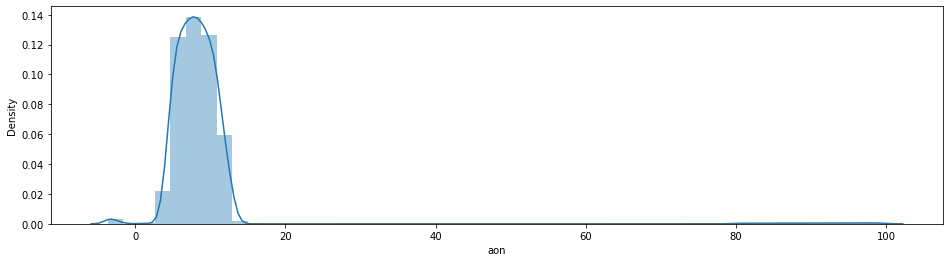

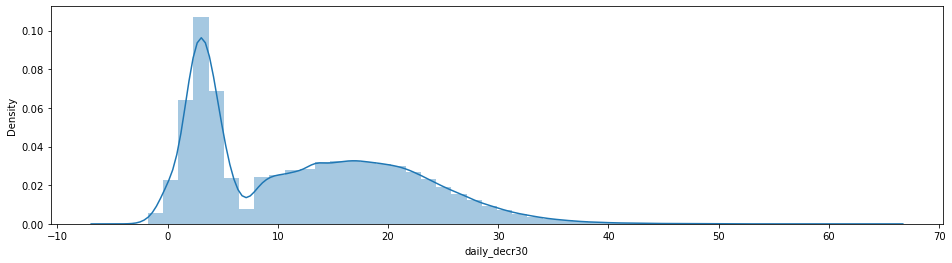

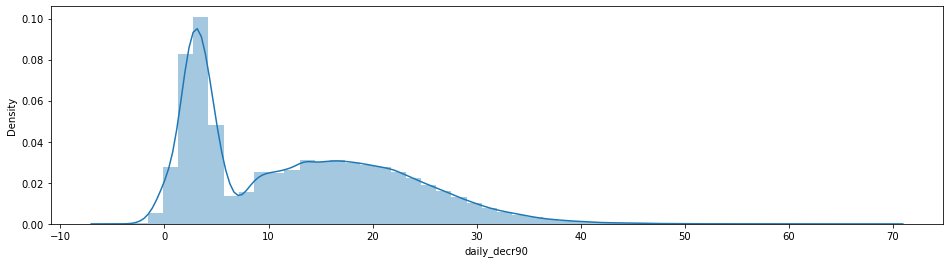

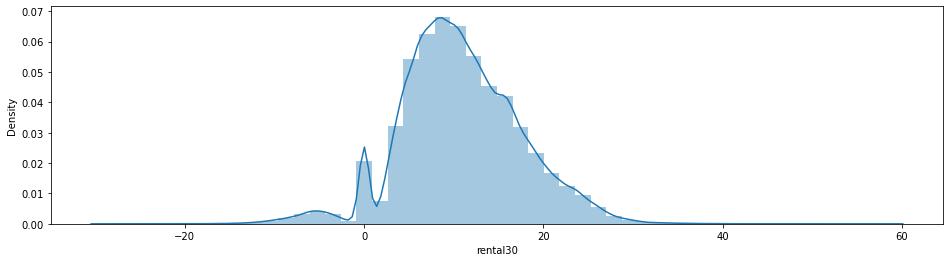

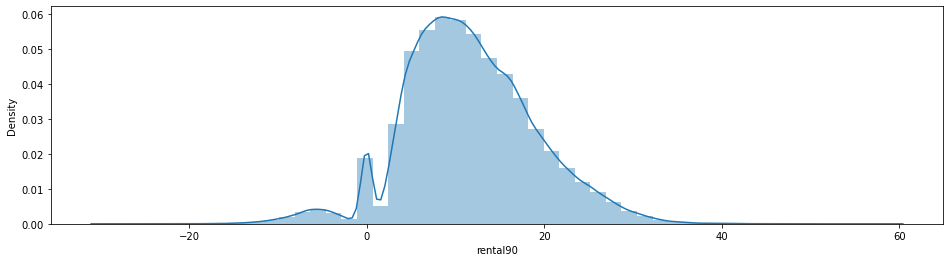

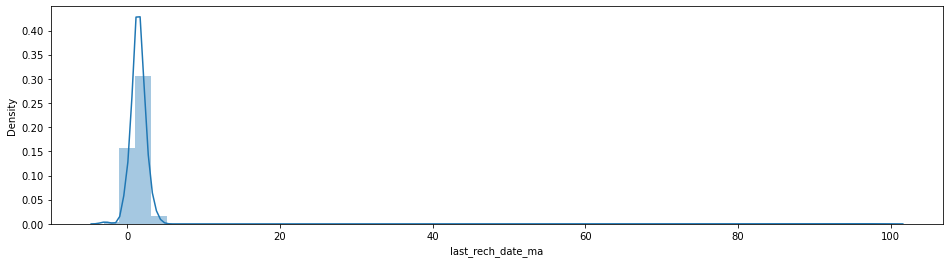

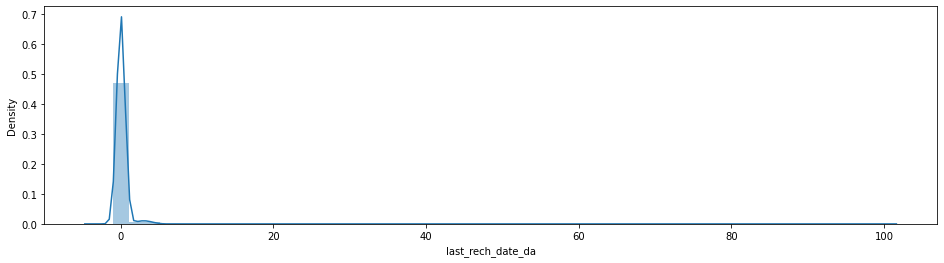

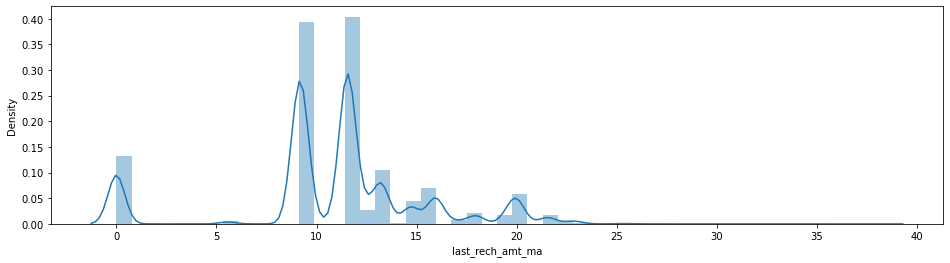

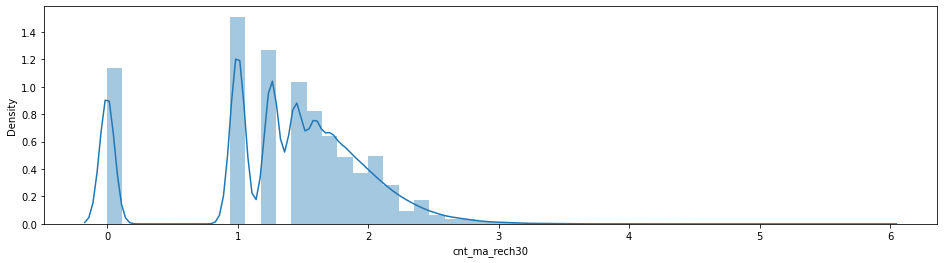

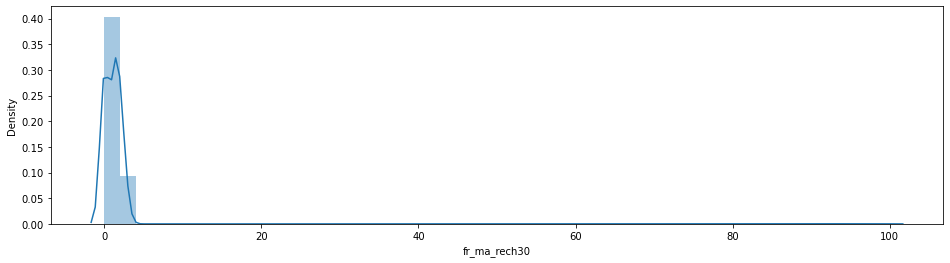

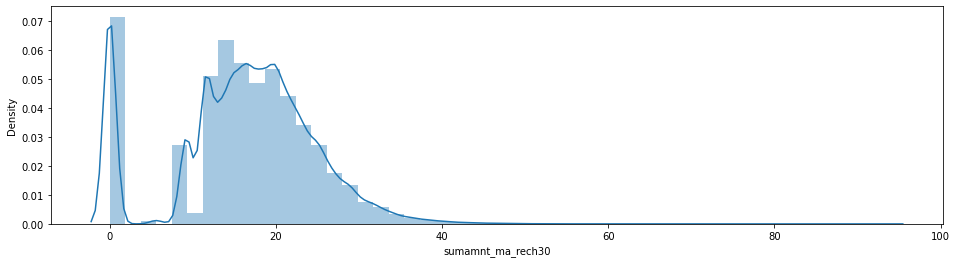

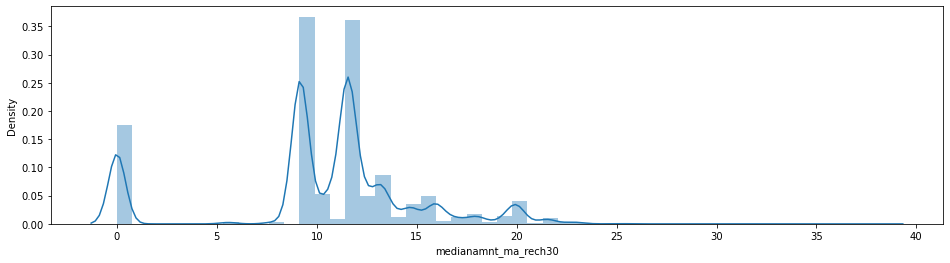

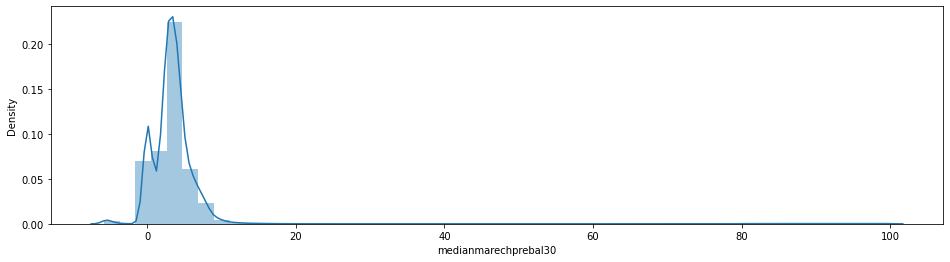

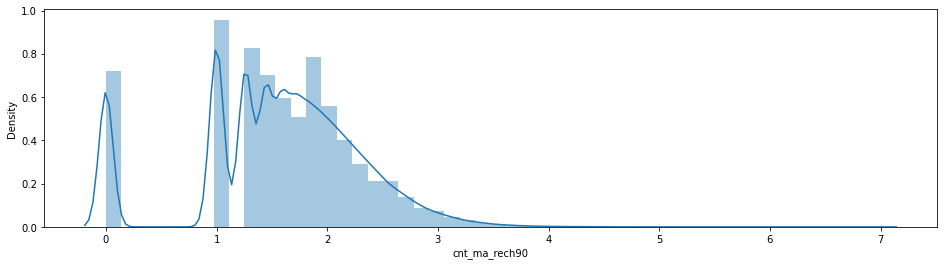

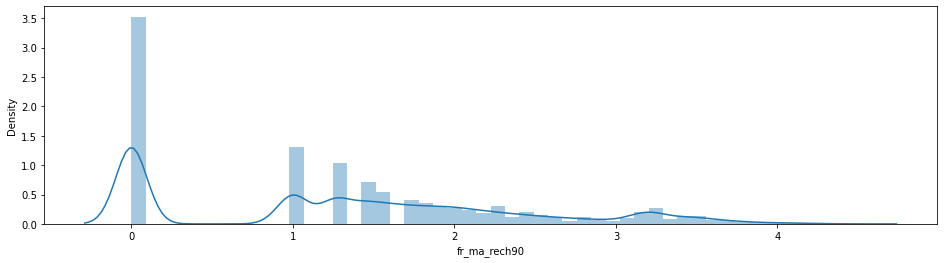

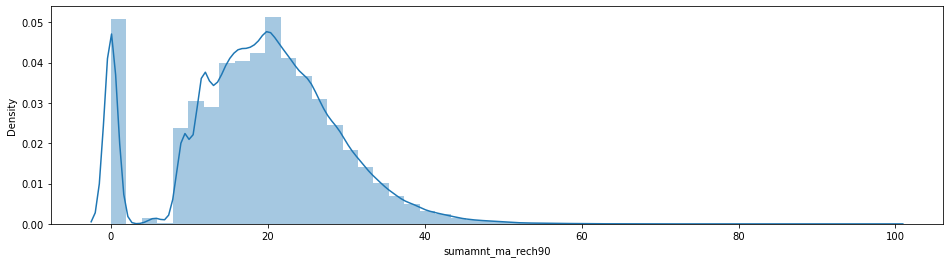

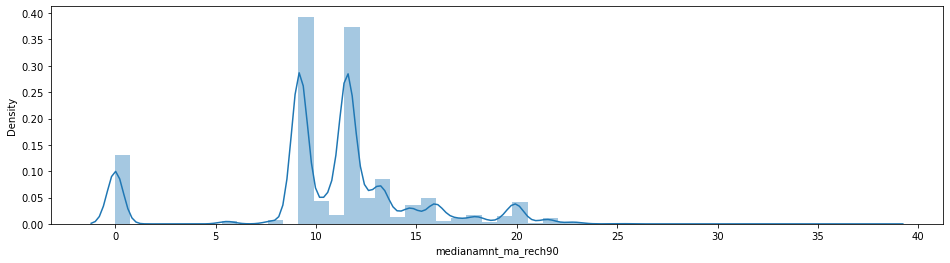

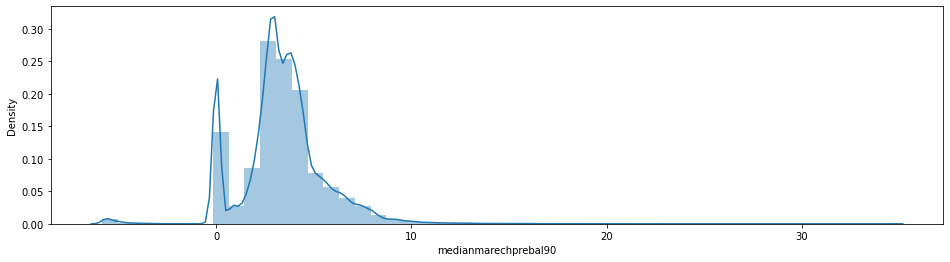

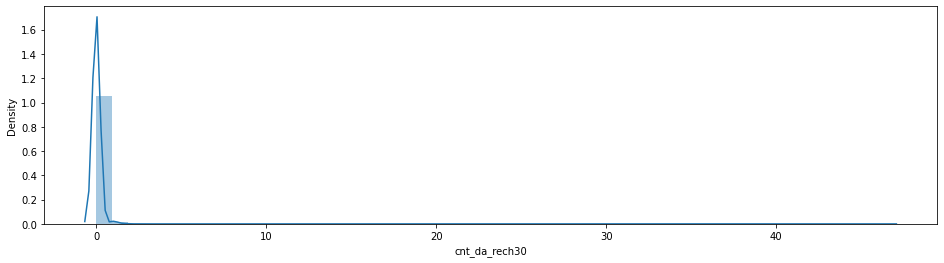

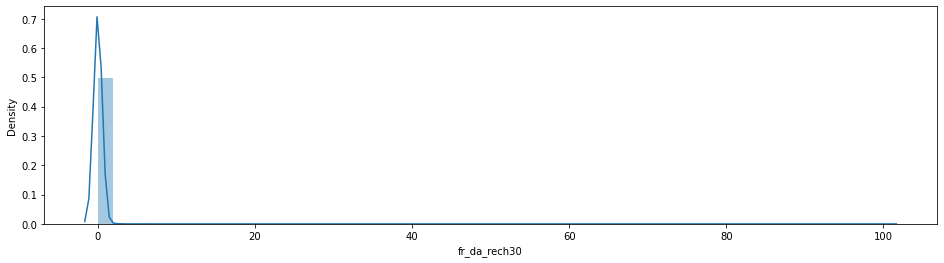

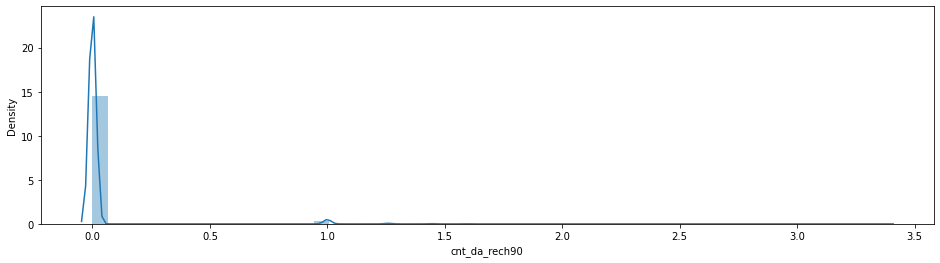

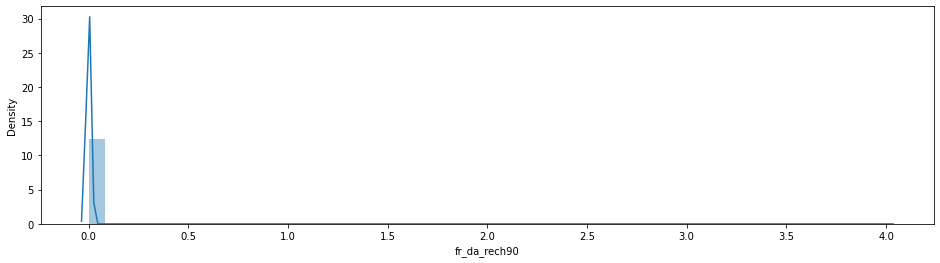

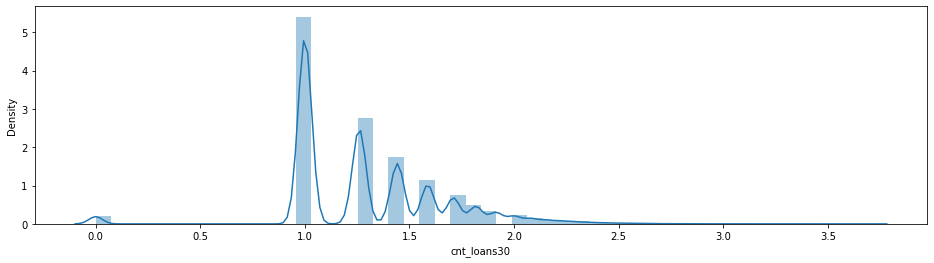

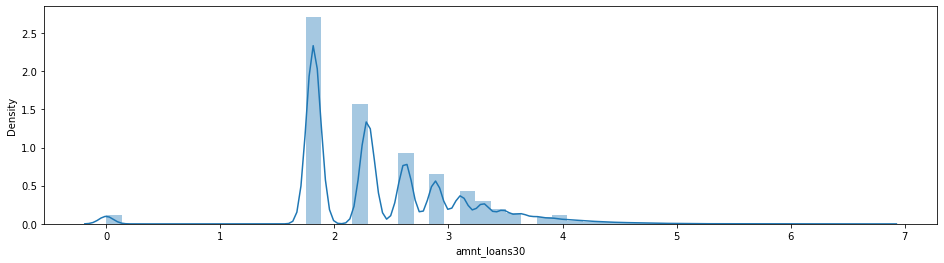

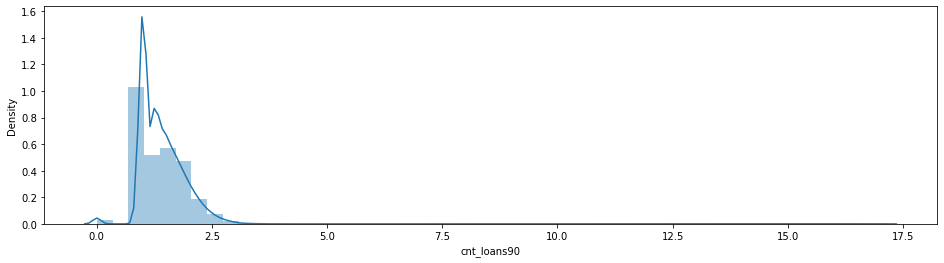

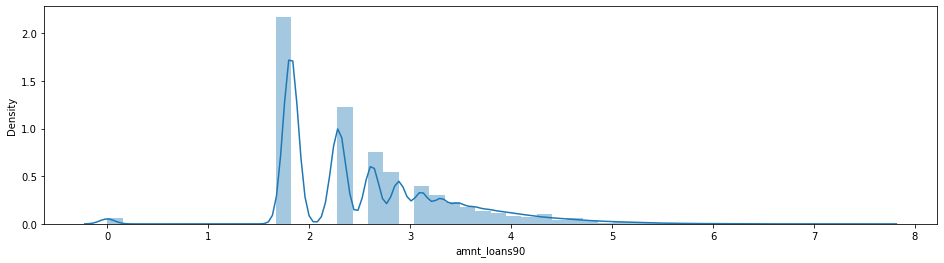

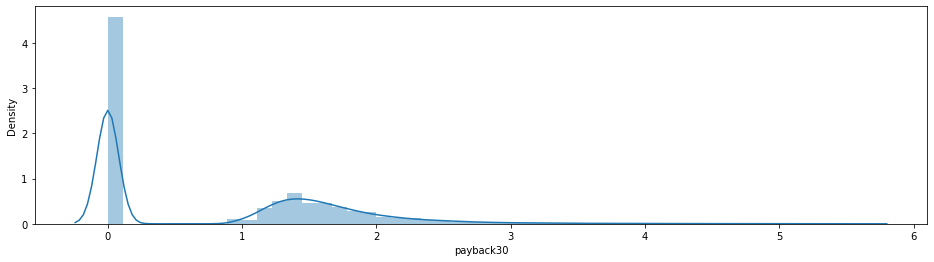

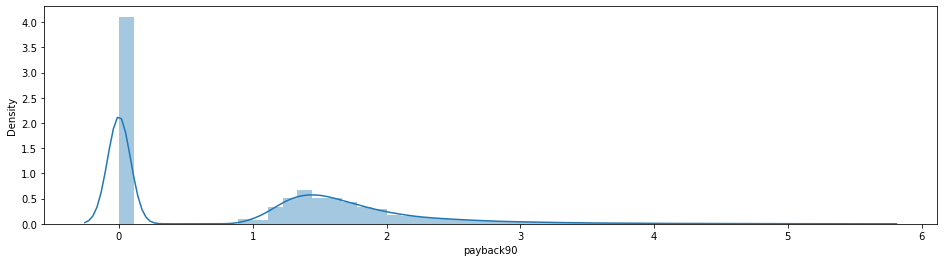

In [95]:
for col in cont_var:
    plt.figure(figsize=(16,4))
    sns.distplot(df_new[col])

In [96]:
# let's now see the outcome of the z-score on this dataset
z_scores = stats.zscore(df_new[cont_var])

abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

df_with_no_outliers = df_cleaned[filtered_entries]
len(df_with_no_outliers)

182165

In [97]:
len(df_new)

208546

In [98]:
(len(df_new) - len(df_with_no_outliers) )/ len(df_cleaned) * 100

12.649966913774419

In [99]:
#We have cut down the outliers from 22 % to 12% , still we can not aford to loose 13 percent of data , our threshold must be around 5%
# let's look at the features related to data
#These features are :--> last_rech_date_da, last_rech_date_da, fr_da_rech30, cnt_da_rech90, fr_da_rech90
df_new

aon  daily_decr30  daily_decr90   rental30   rental90  \
1        6.479224     14.510179     14.526152   6.038000   6.383568   
2        8.929490     22.971610     22.973347  15.454616  15.454616   
3        8.118041     11.181560     11.181560   9.655359   9.655359   
4        6.223084      2.768873      2.768873   5.422267   5.422267   
5        9.820117      5.320595      5.320595  10.319359  10.319359   
...           ...           ...           ...        ...        ...   
209589   7.392542      5.335309      5.335309  10.288875  10.288875   
209590  10.243998      3.330299      3.330299  12.000833  12.000833   
209591  10.043147     22.794073     22.833294  18.030637  20.718232   
209592  12.009252     23.200657     23.253879   7.439995   9.948334   
209593  11.649590     16.496616     16.552110   7.850992   8.578058   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
1                1.259921           0.000000         11.545503       1.259921   
2                2.714418           0.000000         17.953584       1.000000   
3                1.442250           0.000000         11.545503       1.000000   
4                3.448217           0.000000          9.820117       0.000000   
5                1.587401           0.000000         13.217256       1.912931   
...                   ...                ...               ...            ...   
209589           1.000000           0.000000         15.937254       1.442250   
209590           1.587401           0.000000          9.177544       1.587401   
209591           1.442250           0.000000         11.545503       1.709976   
209592           1.259921           3.361975          9.177544       1.709976   
209593           2.351335           0.000000         19.596931       1.259921   

        fr_ma_rech30  ...  amnt_loans30  cnt_loans90  amnt_loans90  payback30  \
1           2.758924  ...      2.289428     1.259921      2.289428   3.072317   
2           0.000000  ...      2.289428     1.000000      2.289428   0.000000   
3           0.000000  ...      1.817121     1.000000      1.817121   0.000000   
4           0.000000  ...      2.289428     1.259921      2.289428   0.000000   
5           1.259921  ...      3.476027     1.912931      3.476027   1.326352   
...              ...  ...           ...          ...           ...        ...   
209589      1.259921  ...      2.289428     1.259921      2.289428   1.000000   
209590      1.000000  ...      2.620741     1.442250      2.620741   1.000000   
209591      2.000000  ...      3.476027     1.817121      3.779763   1.587401   
209592      1.587401  ...      2.620741     1.442250      2.884499   0.000000   
209593      1.000000  ...      2.620741     1.259921      2.620741   0.000000   

        payback90  maxamnt_loans30  medianamnt_loans30  maxamnt_loans90  \
1        3.072317              6.0                 0.0                6   
2        0.000000             12.0                 0.0               12   
3        0.000000              6.0                 0.0                6   
4        0.000000              6.0                 0.0                6   
5        1.326352              6.0                 0.0                6   
...           ...              ...                 ...              ...   
209589   1.000000              6.0                 0.0                6   
209590   1.000000              6.0                 0.0                6   
209591   1.565040             12.0                 0.0               12   
209592   2.189760             12.0                 0.0               12   
209593   0.000000             12.0                 0.0               12   

        medianamnt_loans90  label  
1                      0.0      0  
2                      0.0      1  
3                      0.0      1  
4                      0.0      1  
5                      0.0      1  
...                    ...    ...  
209589                 0.0      1  
209590                 0.0

In [100]:
data_features = df_new[['last_rech_date_da','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90']].copy()


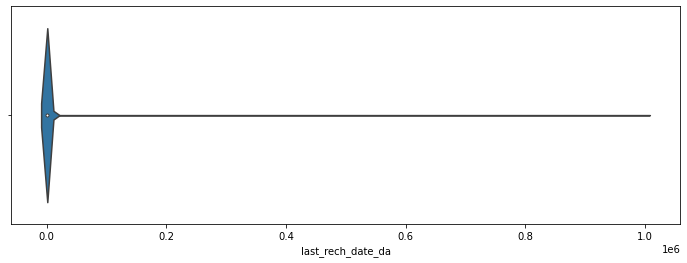

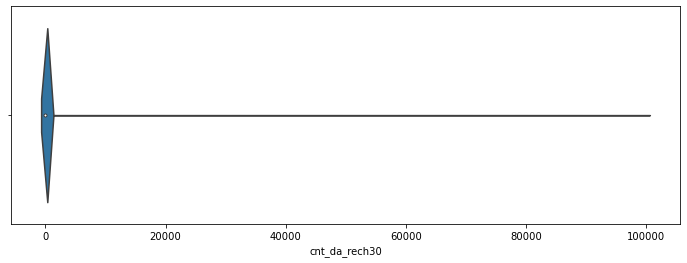

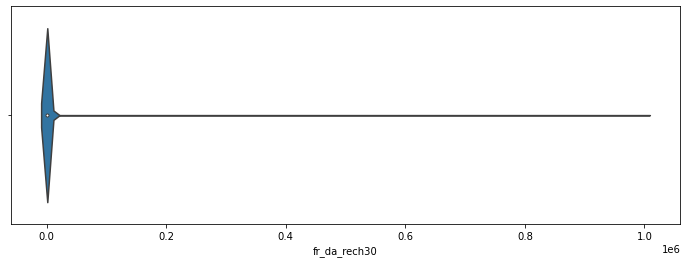

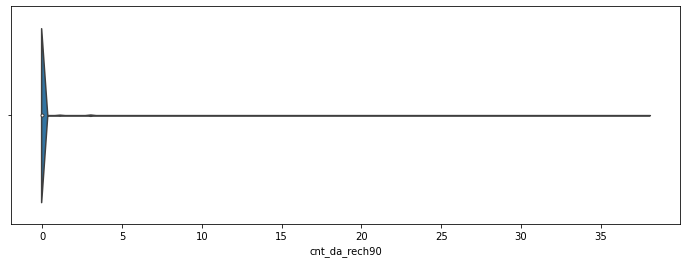

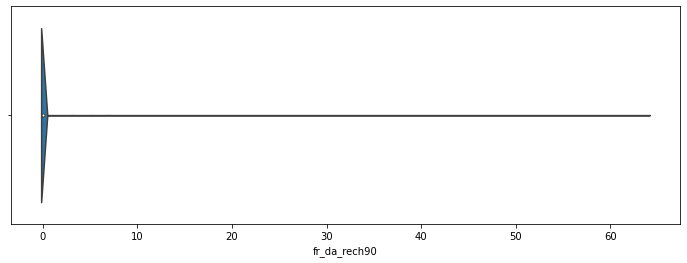

In [101]:
for i in data_features:
    plt.figure(figsize=(12,4))
    sns.violinplot(df[i])

In [102]:
for col in data_features.columns:
    
    print(data_features[col].value_counts()[:2,],'\n')

0.000000    201844
1.912931       163
2.000000       160
Name: last_rech_date_da, dtype: int64 

0.000000    204453
1.000000      2318
1.259921       371
1.442250       155
1.587401        86
1.709976        34
1.817121        27
1.912931        20
2.080084        12
2.000000         9
Name: cnt_da_rech30, dtype: int64 

0.000000    206975
1.442250        63
1.000000        55
1.259921        51
1.912931        47
1.587401        45
1.817121        38
1.709976        36
2.000000        34
Name: fr_da_rech30, dtype: int64 

0.000000    203204
1.000000      4151
1.259921       554
1.442250       227
1.587401       149
1.709976        74
1.817121        49
1.912931        36
2.000000        30
Name: cnt_da_rech90, dtype: int64 

0.000000    207683
1.442250        78
1.000000        66
1.259921        66
1.587401        56
1.912931        55
1.817121        52
1.709976        45
2.000000        44
Name: fr_da_rech90, dtype: int64 



In [103]:
df_new.head()

aon  daily_decr30  daily_decr90   rental30   rental90  \
1  6.479224     14.510179     14.526152   6.038000   6.383568   
2  8.929490     22.971610     22.973347  15.454616  15.454616   
3  8.118041     11.181560     11.181560   9.655359   9.655359   
4  6.223084      2.768873      2.768873   5.422267   5.422267   
5  9.820117      5.320595      5.320595  10.319359  10.319359   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
1           1.259921                0.0         11.545503       1.259921   
2           2.714418                0.0         17.953584       1.000000   
3           1.442250                0.0         11.545503       1.000000   
4           3.448217                0.0          9.820117       0.000000   
5           1.587401                0.0         13.217256       1.912931   

   fr_ma_rech30  ...  amnt_loans30  cnt_loans90  amnt_loans90  payback30  \
1      2.758924  ...      2.289428     1.259921      2.289428   3.072317   
2      0.000000  ...      2.289428     1.000000      2.289428   0.000000   
3      0.000000  ...      1.817121     1.000000      1.817121   0.000000   
4      0.000000  ...      2.289428     1.259921      2.289428   0.000000   
5      1.259921  ...      3.476027     1.912931      3.476027   1.326352   

   payback90  maxamnt_loans30  medianamnt_loans30  maxamnt_loans90  \
1   3.072317              6.0                 0.0                6   
2   0.000000             12.0                 0.0               12   
3   0.000000              6.0                 0.0                6   
4   0.000000              6.0                 0.0                6   
5   1.326352              6.0                 0.0                6   

   medianamnt_loans90  label  
1                 0.0      0  
2                 0.0      1  
3                 0.0      1  
4                 0.0      1  
5                 0.0      1  

[5 rows x 33 columns]

In [104]:
df_new.drop(['last_rech_date_da','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90'],1,inplace=True)

In [105]:
len(df_new.columns)

28

In [106]:
df_new

aon  daily_decr30  daily_decr90   rental30   rental90  \
1        6.479224     14.510179     14.526152   6.038000   6.383568   
2        8.929490     22.971610     22.973347  15.454616  15.454616   
3        8.118041     11.181560     11.181560   9.655359   9.655359   
4        6.223084      2.768873      2.768873   5.422267   5.422267   
5        9.820117      5.320595      5.320595  10.319359  10.319359   
...           ...           ...           ...        ...        ...   
209589   7.392542      5.335309      5.335309  10.288875  10.288875   
209590  10.243998      3.330299      3.330299  12.000833  12.000833   
209591  10.043147     22.794073     22.833294  18.030637  20.718232   
209592  12.009252     23.200657     23.253879   7.439995   9.948334   
209593  11.649590     16.496616     16.552110   7.850992   8.578058   

        last_rech_date_ma  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
1                1.259921         11.545503       1.259921      2.758924   
2                2.714418         17.953584       1.000000      0.000000   
3                1.442250         11.545503       1.000000      0.000000   
4                3.448217          9.820117       0.000000      0.000000   
5                1.587401         13.217256       1.912931      1.259921   
...                   ...               ...            ...           ...   
209589           1.000000         15.937254       1.442250      1.259921   
209590           1.587401          9.177544       1.587401      1.000000   
209591           1.442250         11.545503       1.709976      2.000000   
209592           1.259921          9.177544       1.709976      1.587401   
209593           2.351335         19.596931       1.259921      1.000000   

        sumamnt_ma_rech30  ...  amnt_loans30  cnt_loans90  amnt_loans90  \
1               14.546423  ...      2.289428     1.259921      2.289428   
2               17.953584  ...      2.289428     1.000000      2.289428   
3               11.545503  ...      1.817121     1.000000      1.817121   
4                0.000000  ...      2.289428     1.259921      2.289428   
5               27.157290  ...      3.476027     1.912931      3.476027   
...                   ...  ...           ...          ...           ...   
209589          21.830656  ...      2.289428     1.259921      2.289428   
209590          14.568444  ...      2.620741     1.442250      2.620741   
209591          21.055033  ...      3.476027     1.817121      3.779763   
209592          22.991806  ...      2.620741     1.442250      2.884499   
209593          20.850794  ...      2.620741     1.259921      2.620741   

        payback30  payback90  maxamnt_loans30  medianamnt_loans30  \
1        3.072317   3.072317              6.0                 0.0   
2        0.000000   0.000000             12.0                 0.0   
3        0.000000   0.000000              6.0                 0.0   
4        0.000000   0.000000              6.0                 0.0   
5        1.326352   1.326352              6.0                 0.0   
...           ...        ...              ...                 ...   
209589   1.000000   1.000000              6.0                 0.0   
209590   1.000000   1.000000              6.0                 0.0   
209591   1.587401   1.565040             12.0                 0.0   
209592   0.000000   2.189760             12.0                 0.0   
209593   0.000000   0.000000             12.0                 0.0   

        maxamnt_loans90  medianamnt_loans90  label  
1                     6                 0.0      0  
2                    12                 0.0      1  
3                     6                 0.0      1  
4                     6                 0.0      1  
5                     6                 0.0      1  
...                 ...                 ...    ...  
209589                6                 0.0      1  
209590                6                 0.0      1  
209591               12                 0

In [107]:
df.shape 

(209593, 36)

In [108]:
df_cleaned.shape # --> removed the mb_no,circle,label and pdate (4)

(208546, 33)

In [109]:
df_new.shape # --> removed all the features from the data_features list (5)

(208546, 28)

In [110]:
cont_var = []
dis_num_var = []
for col in df_new.columns:
    if len(df_new.loc[:,col].unique()) > 10:
        cont_var.append(col)
    else:
        dis_num_var.append(col)

In [111]:
cont_var

['aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_loans30',
 'amnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'payback30',
 'payback90']

In [112]:
dis_num_var

['maxamnt_loans30',
 'medianamnt_loans30',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'label']

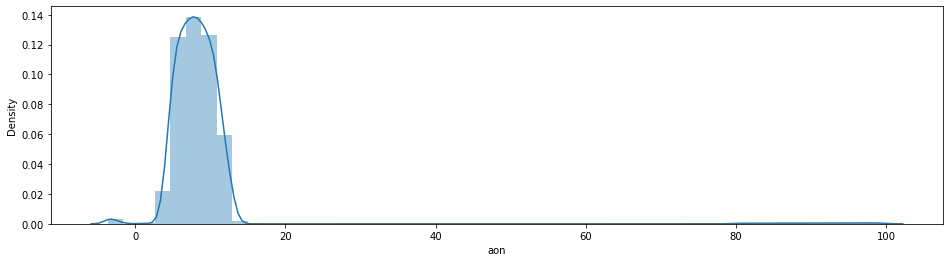

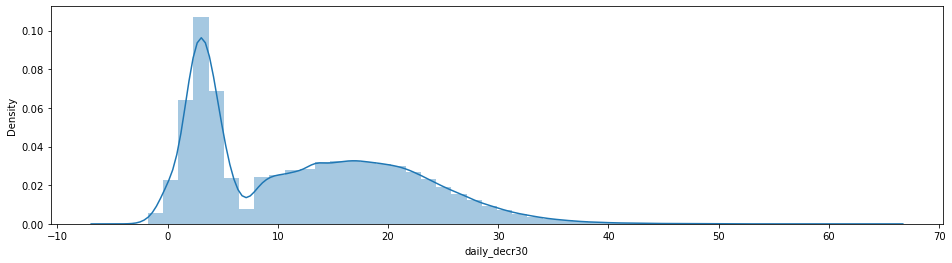

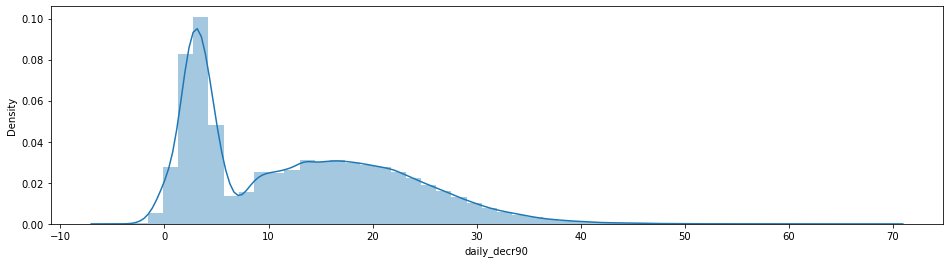

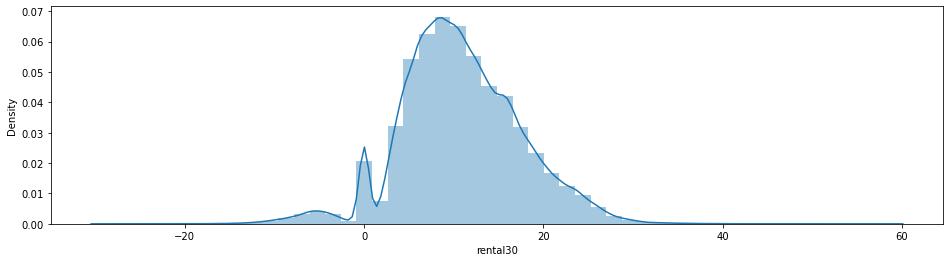

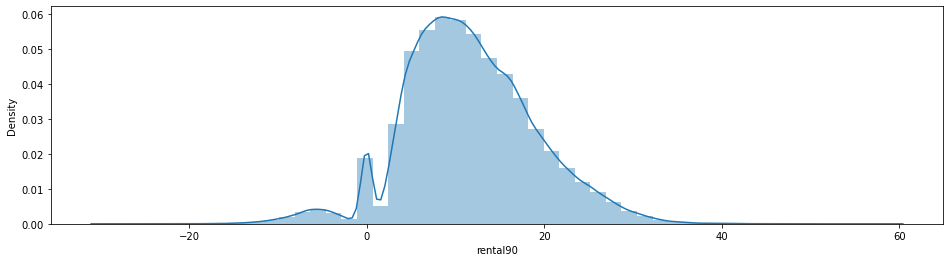

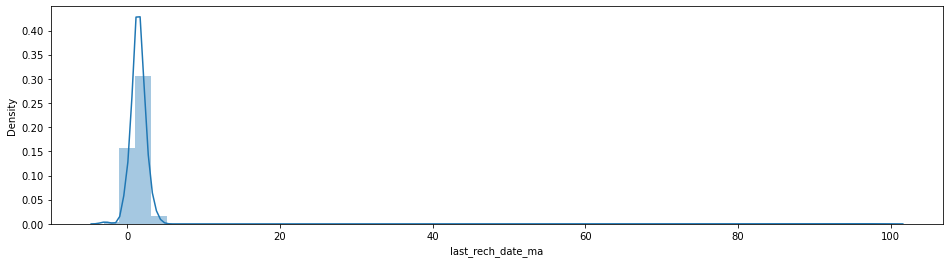

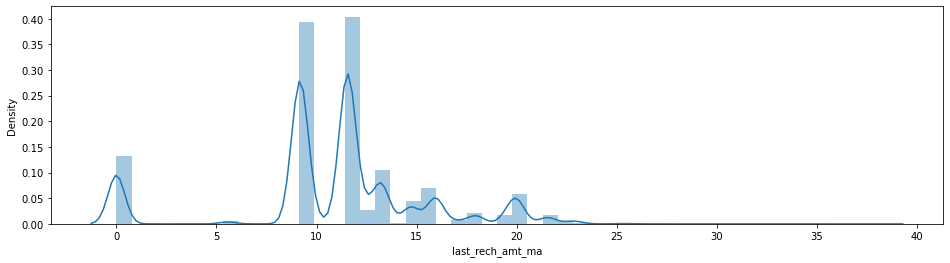

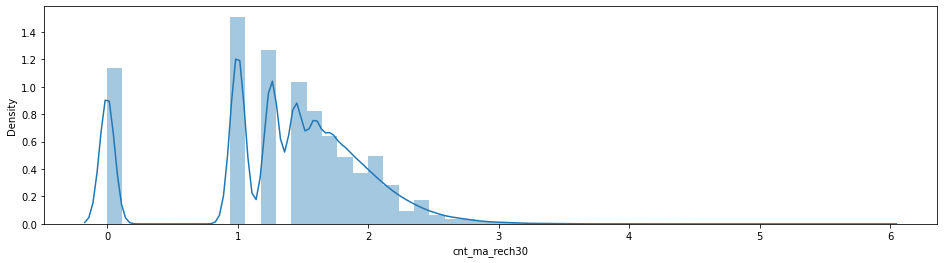

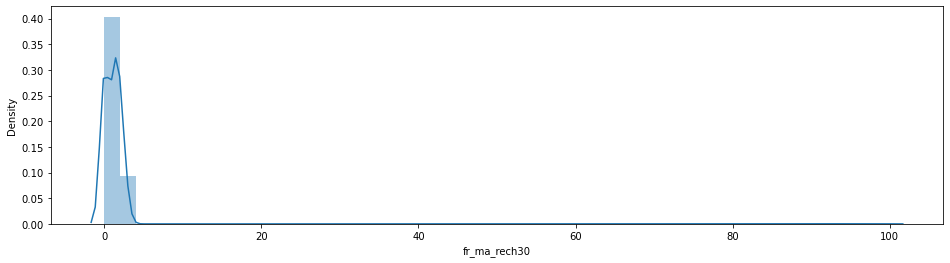

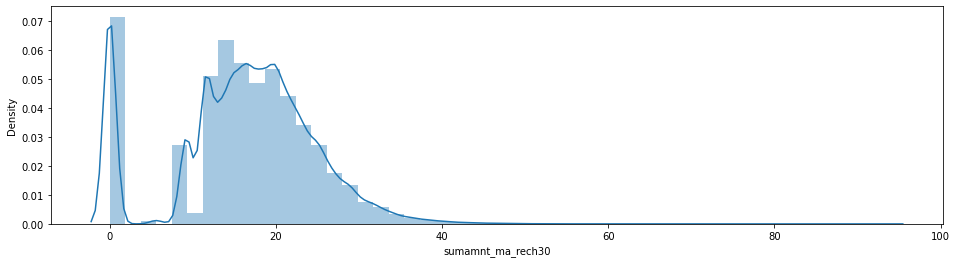

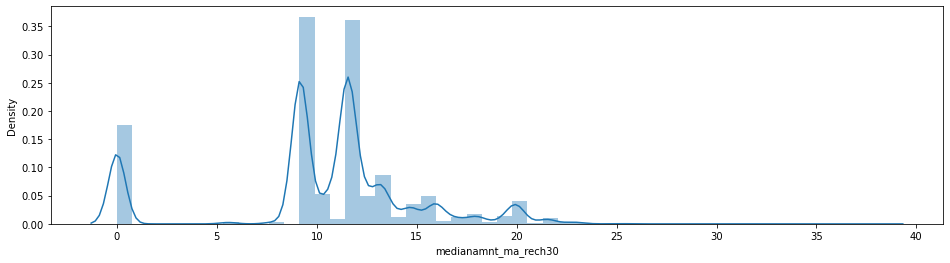

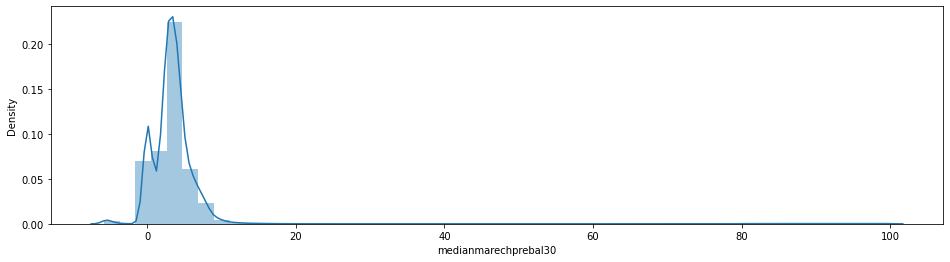

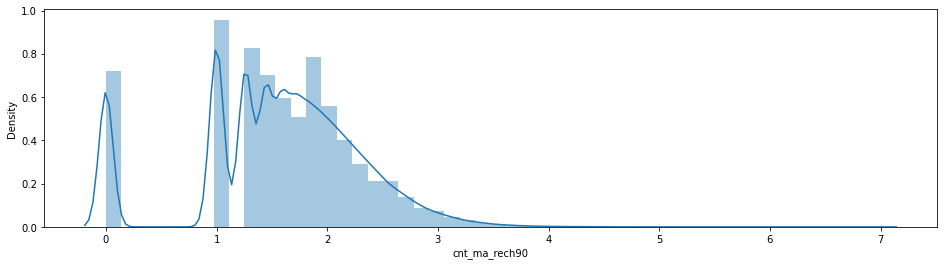

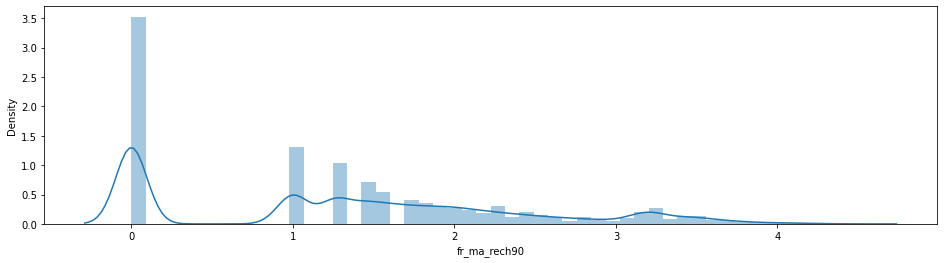

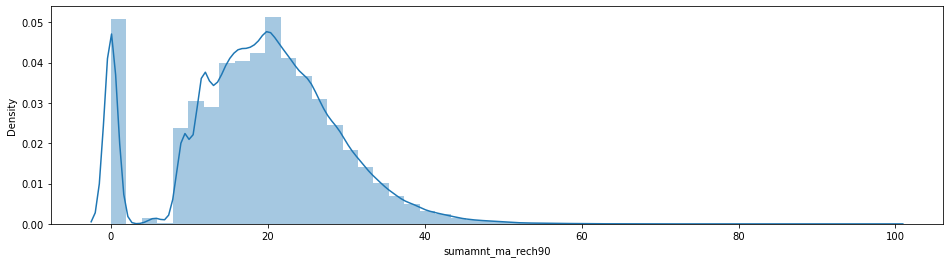

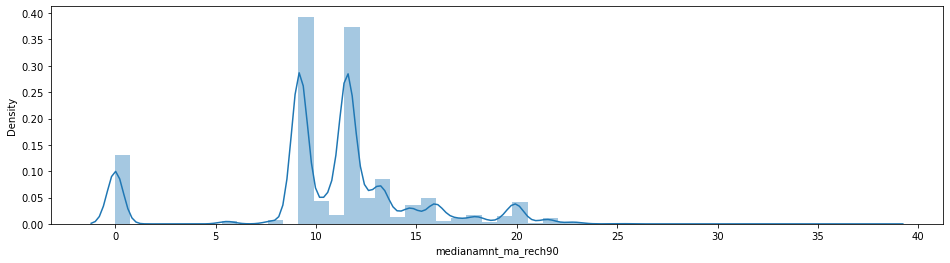

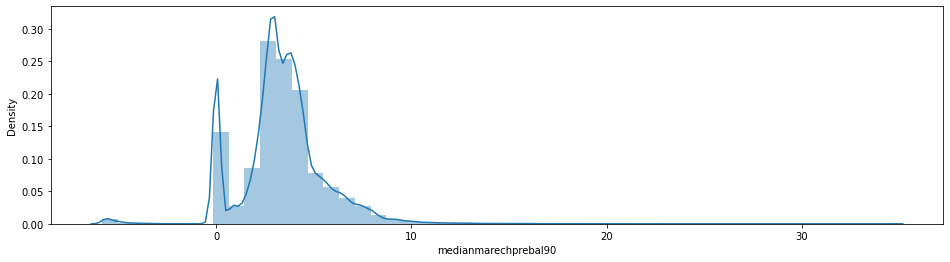

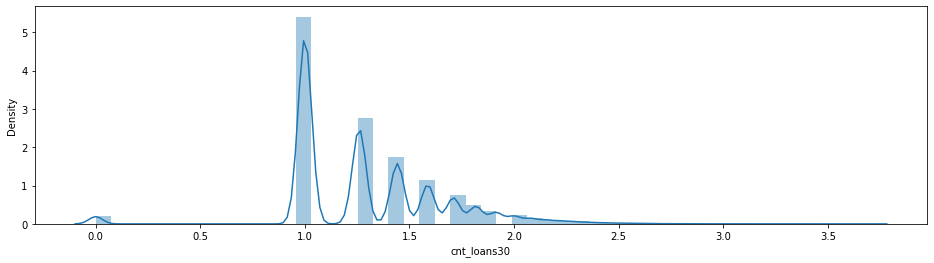

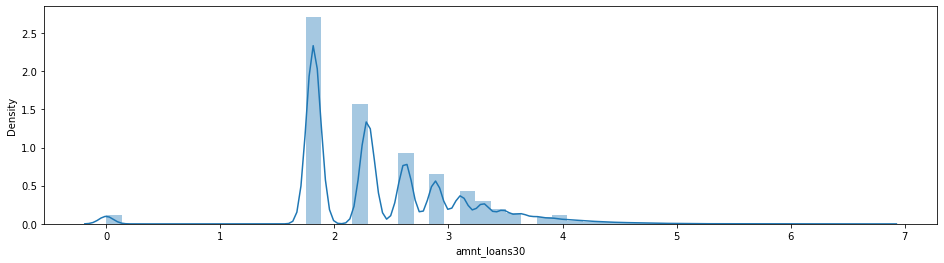

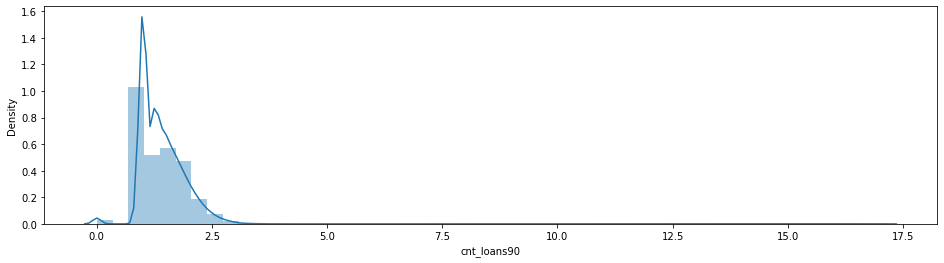

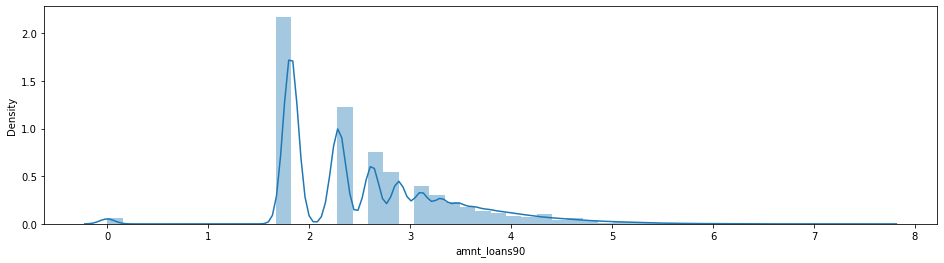

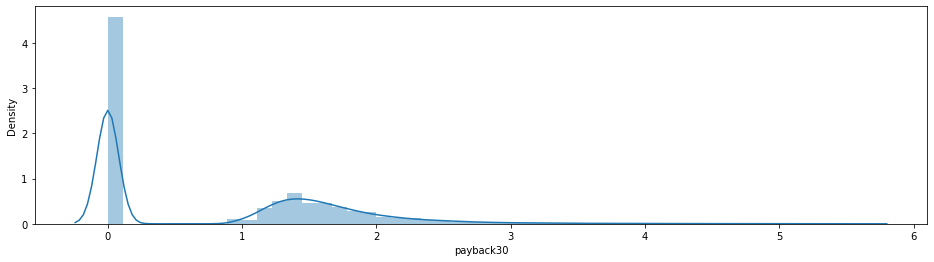

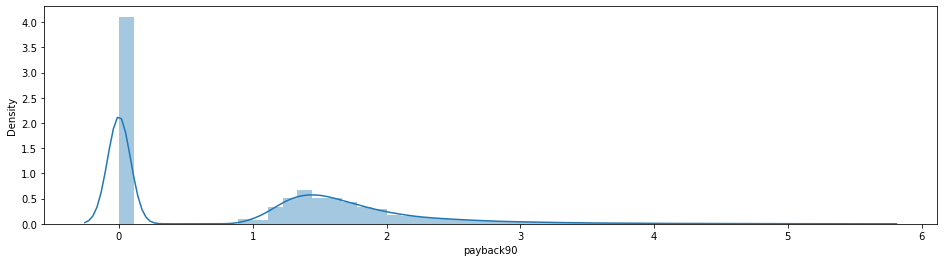

In [113]:
for col in cont_var:
    plt.figure(figsize=(16,4))
    sns.distplot(df_new[col])

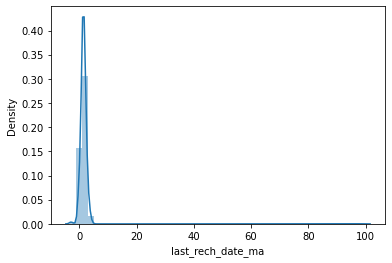

<AxesSubplot:xlabel='last_rech_date_ma', ylabel='Density'>

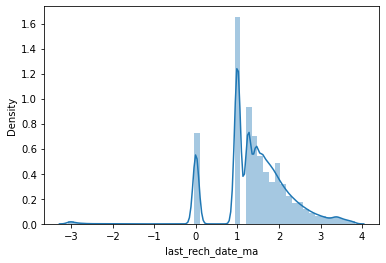

In [114]:
# now we will maually remove some outliers, without using any algorithms but only just by the visualizations.
# let's start with the feat : last_rech_date_ma
sns.distplot(df_new.last_rech_date_ma)
plt.show()
# let's strip of the last 1 quantile of the data
sns.distplot(df_new[df_new.last_rech_date_ma < df_new.last_rech_date_ma.quantile(0.99)]['last_rech_date_ma'])

<AxesSubplot:xlabel='last_rech_date_ma', ylabel='Density'>

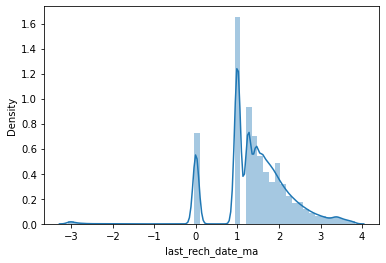

In [115]:
df_new = df_new[df_new.last_rech_date_ma < df_new.last_rech_date_ma.quantile(0.99)]
sns.distplot(df_new.last_rech_date_ma)

In [116]:
df_new.maxamnt_loans90.value_counts()

6     178178
12     26290
0       1969
Name: maxamnt_loans90, dtype: int64

In [117]:
df_new.maxamnt_loans30.value_counts()

6.0     177344
12.0     25925
0.0       3168
Name: maxamnt_loans30, dtype: int64

In [118]:
df_new.head()

aon  daily_decr30  daily_decr90   rental30   rental90  \
1  6.479224     14.510179     14.526152   6.038000   6.383568   
2  8.929490     22.971610     22.973347  15.454616  15.454616   
3  8.118041     11.181560     11.181560   9.655359   9.655359   
4  6.223084      2.768873      2.768873   5.422267   5.422267   
5  9.820117      5.320595      5.320595  10.319359  10.319359   

   last_rech_date_ma  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
1           1.259921         11.545503       1.259921      2.758924   
2           2.714418         17.953584       1.000000      0.000000   
3           1.442250         11.545503       1.000000      0.000000   
4           3.448217          9.820117       0.000000      0.000000   
5           1.587401         13.217256       1.912931      1.259921   

   sumamnt_ma_rech30  ...  amnt_loans30  cnt_loans90  amnt_loans90  payback30  \
1          14.546423  ...      2.289428     1.259921      2.289428   3.072317   
2          17.953584  ...      2.289428     1.000000      2.289428   0.000000   
3          11.545503  ...      1.817121     1.000000      1.817121   0.000000   
4           0.000000  ...      2.289428     1.259921      2.289428   0.000000   
5          27.157290  ...      3.476027     1.912931      3.476027   1.326352   

   payback90  maxamnt_loans30  medianamnt_loans30  maxamnt_loans90  \
1   3.072317              6.0                 0.0                6   
2   0.000000             12.0                 0.0               12   
3   0.000000              6.0                 0.0                6   
4   0.000000              6.0                 0.0                6   
5   1.326352              6.0                 0.0                6   

   medianamnt_loans90  label  
1                 0.0      0  
2                 0.0      1  
3                 0.0      1  
4                 0.0      1  
5                 0.0      1  

[5 rows x 28 columns]

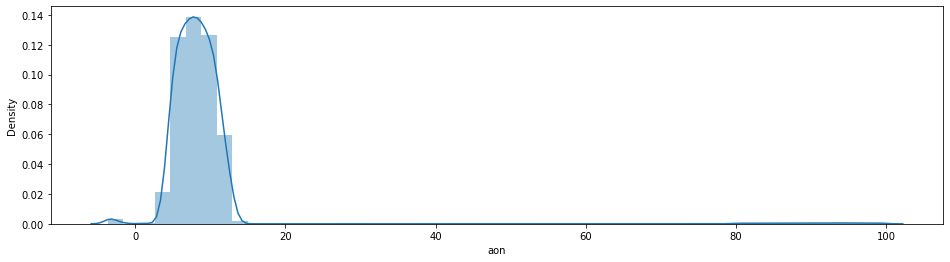

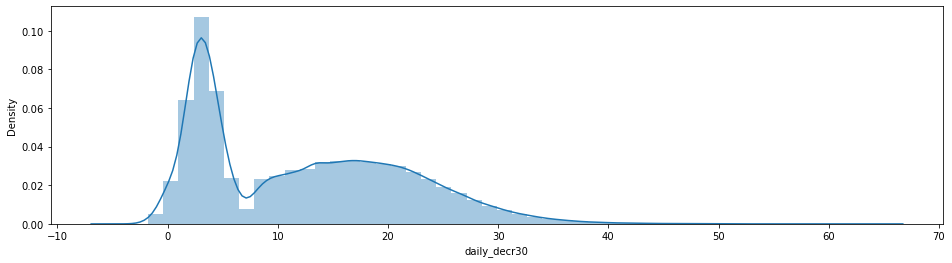

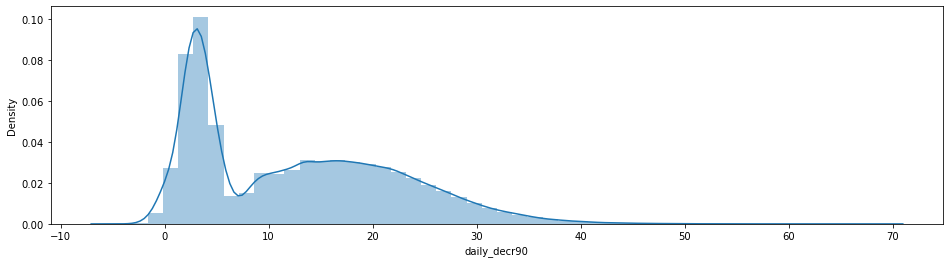

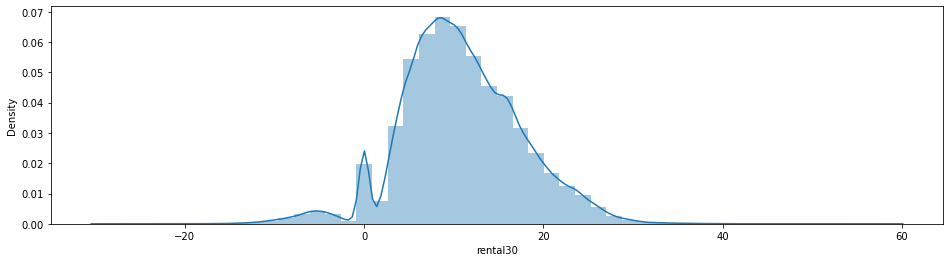

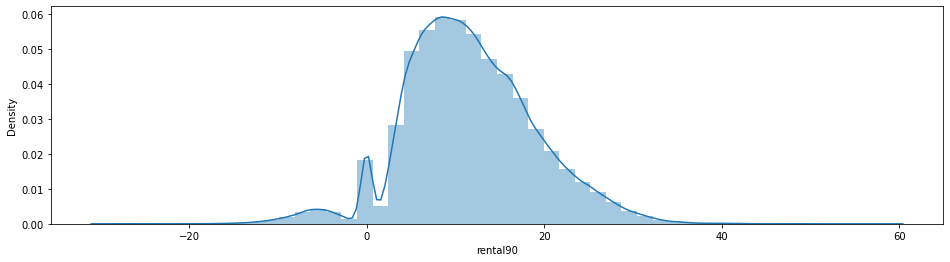

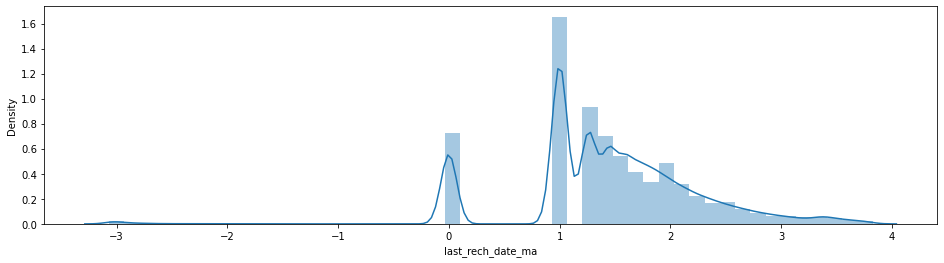

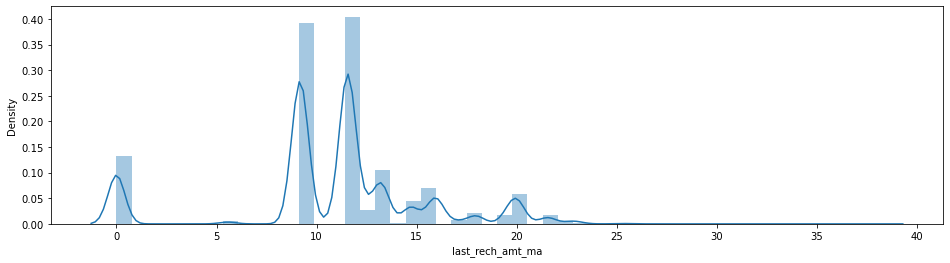

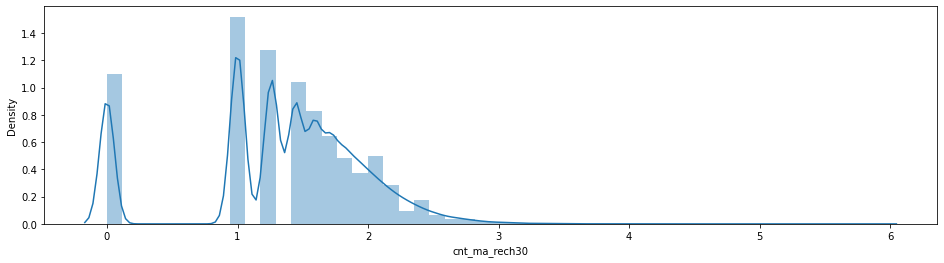

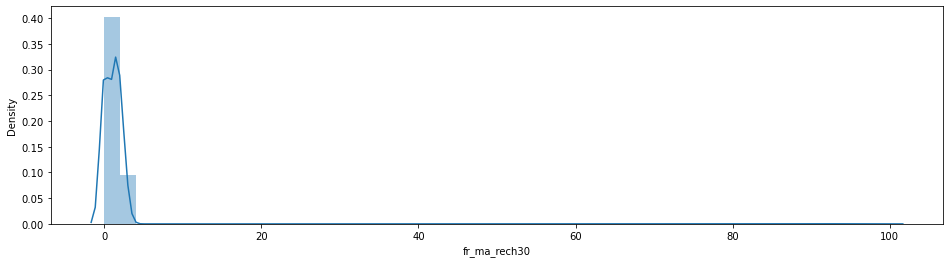

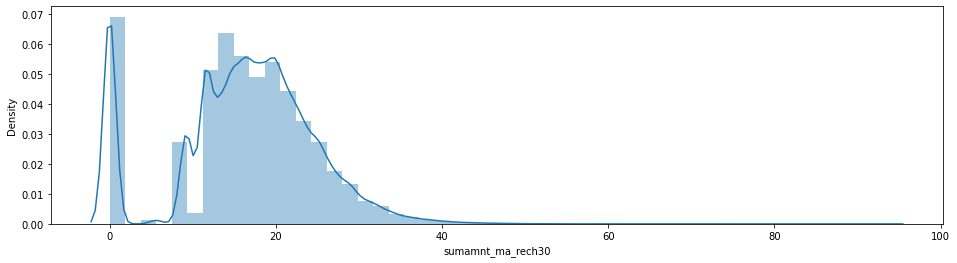

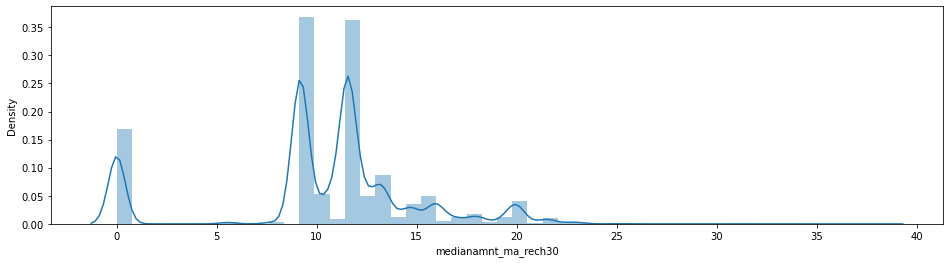

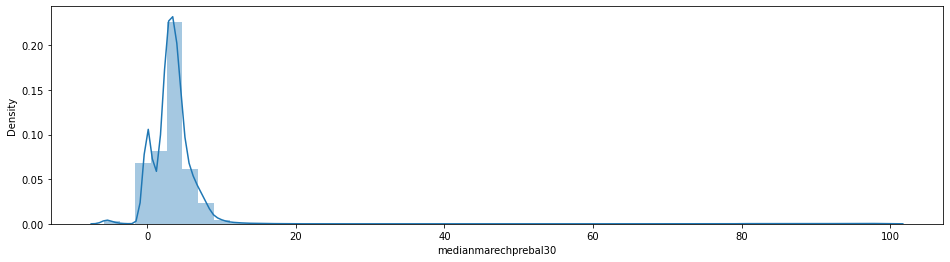

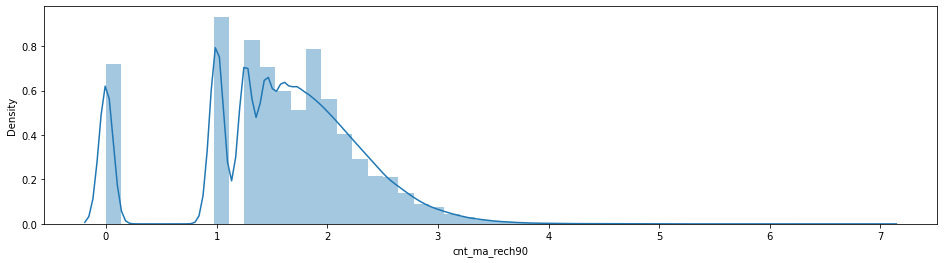

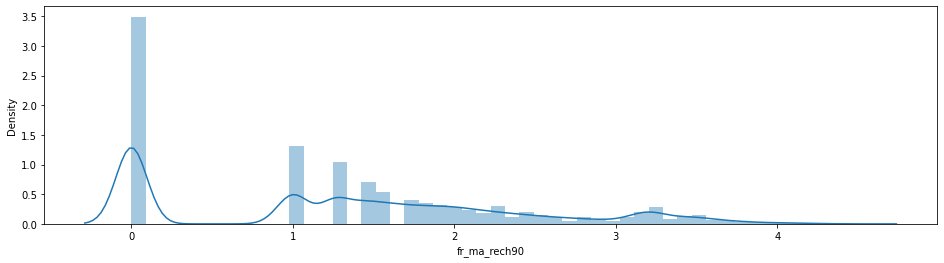

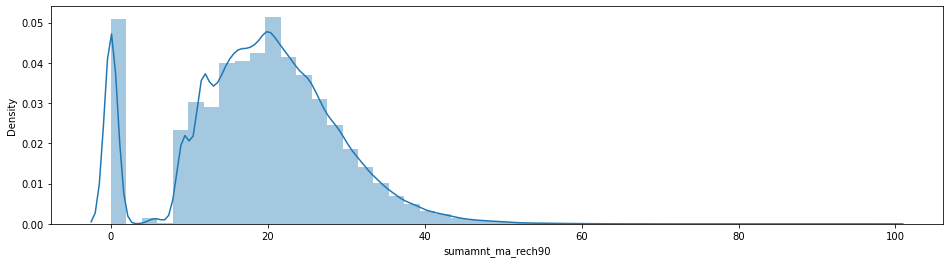

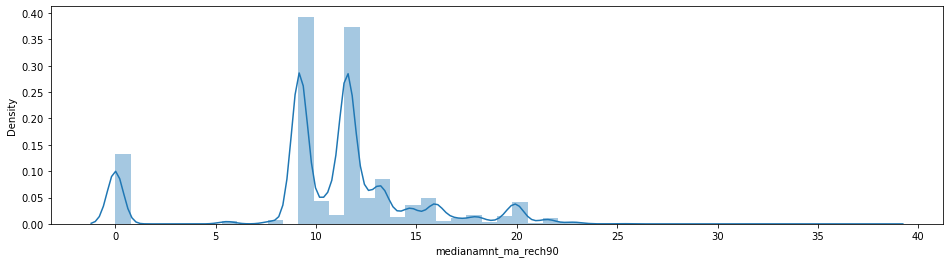

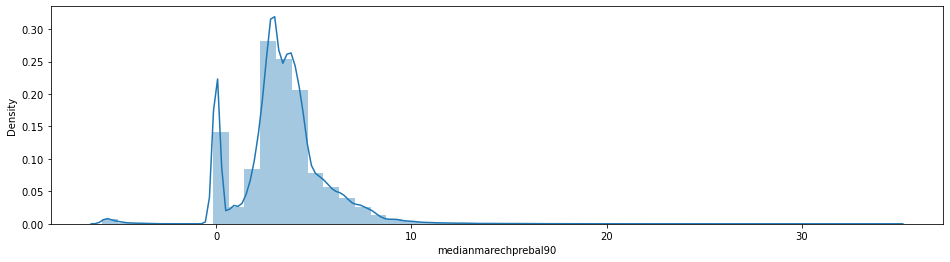

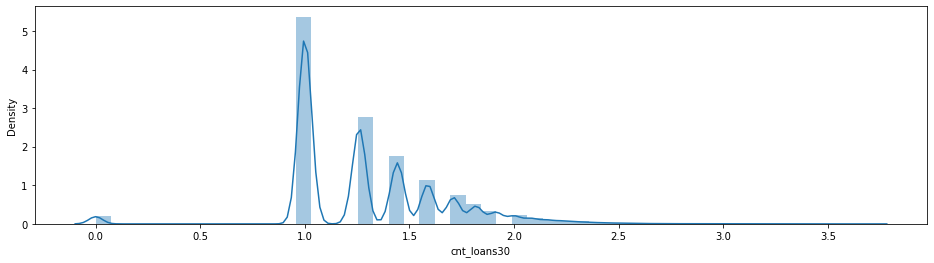

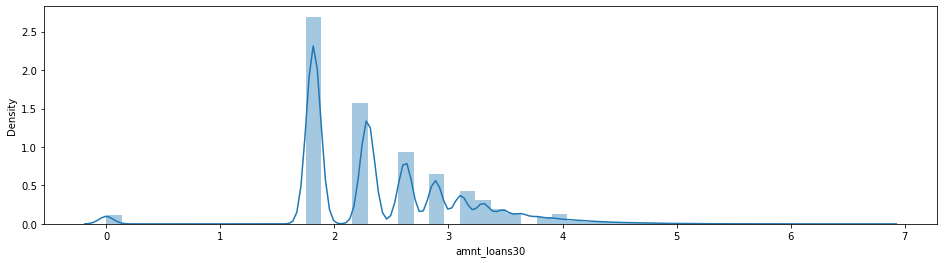

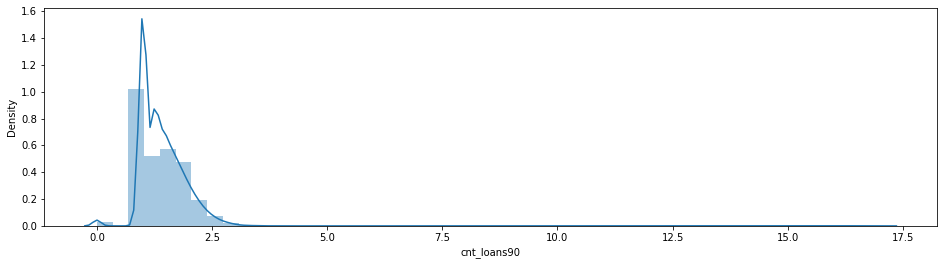

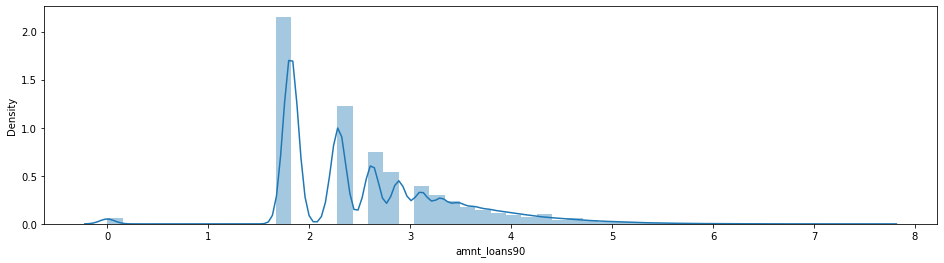

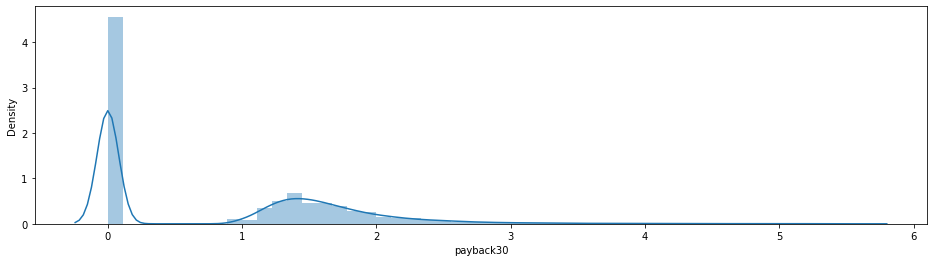

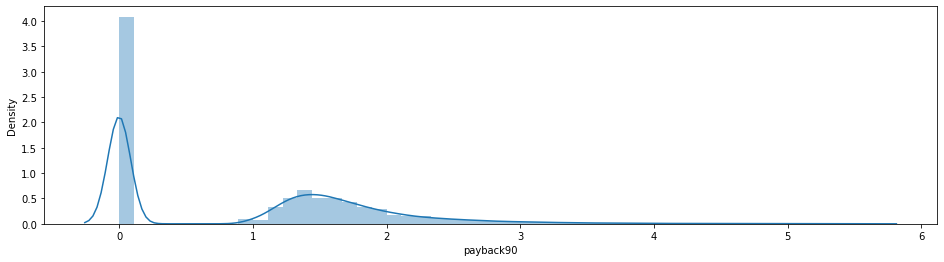

In [119]:
for col in cont_var:
    plt.figure(figsize=(16,4))
    sns.distplot(df_new[col])

In [120]:
# Remove the columns with near zero vairance
df_new.iloc[:,:-1].head()

aon  daily_decr30  daily_decr90   rental30   rental90  \
1  6.479224     14.510179     14.526152   6.038000   6.383568   
2  8.929490     22.971610     22.973347  15.454616  15.454616   
3  8.118041     11.181560     11.181560   9.655359   9.655359   
4  6.223084      2.768873      2.768873   5.422267   5.422267   
5  9.820117      5.320595      5.320595  10.319359  10.319359   

   last_rech_date_ma  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
1           1.259921         11.545503       1.259921      2.758924   
2           2.714418         17.953584       1.000000      0.000000   
3           1.442250         11.545503       1.000000      0.000000   
4           3.448217          9.820117       0.000000      0.000000   
5           1.587401         13.217256       1.912931      1.259921   

   sumamnt_ma_rech30  ...  cnt_loans30  amnt_loans30  cnt_loans90  \
1          14.546423  ...     1.259921      2.289428     1.259921   
2          17.953584  ...     1.000000      2.289428     1.000000   
3          11.545503  ...     1.000000      1.817121     1.000000   
4           0.000000  ...     1.259921      2.289428     1.259921   
5          27.157290  ...     1.912931      3.476027     1.912931   

   amnt_loans90  payback30  payback90  maxamnt_loans30  medianamnt_loans30  \
1      2.289428   3.072317   3.072317              6.0                 0.0   
2      2.289428   0.000000   0.000000             12.0                 0.0   
3      1.817121   0.000000   0.000000              6.0                 0.0   
4      2.289428   0.000000   0.000000              6.0                 0.0   
5      3.476027   1.326352   1.326352              6.0                 0.0   

   maxamnt_loans90  medianamnt_loans90  
1                6                 0.0  
2               12                 0.0  
3                6                 0.0  
4                6                 0.0  
5                6                 0.0  

[5 rows x 27 columns]

In [121]:
for i in range(df_new.iloc[:,:-1].shape[1]): # removing the label from the loop 
    num = len(np.unique(df_new.iloc[:, i]))
    percentage = float(num) / df_new.shape[0] * 100
    print('%d, %d, %.1f%%' % (i, num, percentage))

0, 4478, 2.2%
1, 145437, 70.5%
2, 156795, 76.0%
3, 130870, 63.4%
4, 139585, 67.6%
5, 86, 0.0%
6, 70, 0.0%
7, 70, 0.0%
8, 1070, 0.5%
9, 15045, 7.3%
10, 508, 0.2%
11, 30239, 14.6%
12, 109, 0.1%
13, 89, 0.0%
14, 31597, 15.3%
15, 606, 0.3%
16, 29512, 14.3%
17, 40, 0.0%
18, 48, 0.0%
19, 1092, 0.5%
20, 69, 0.0%
21, 1358, 0.7%
22, 2374, 1.1%
23, 3, 0.0%
24, 6, 0.0%
25, 3, 0.0%
26, 6, 0.0%


In [122]:
a2 = []
for i in range(df_new.iloc[:,:-1].shape[1]):
    num = len(np.unique(df_new.iloc[:, i]))
    percentage = float(num) / df_new.shape[0] * 100
    print('%d, %d, %.1f%%' % (i, num, percentage))
    a2.append(percentage)

0, 4478, 2.2%
1, 145437, 70.5%
2, 156795, 76.0%
3, 130870, 63.4%
4, 139585, 67.6%
5, 86, 0.0%
6, 70, 0.0%
7, 70, 0.0%
8, 1070, 0.5%
9, 15045, 7.3%
10, 508, 0.2%
11, 30239, 14.6%
12, 109, 0.1%
13, 89, 0.0%
14, 31597, 15.3%
15, 606, 0.3%
16, 29512, 14.3%
17, 40, 0.0%
18, 48, 0.0%
19, 1092, 0.5%
20, 69, 0.0%
21, 1358, 0.7%
22, 2374, 1.1%
23, 3, 0.0%
24, 6, 0.0%
25, 3, 0.0%
26, 6, 0.0%


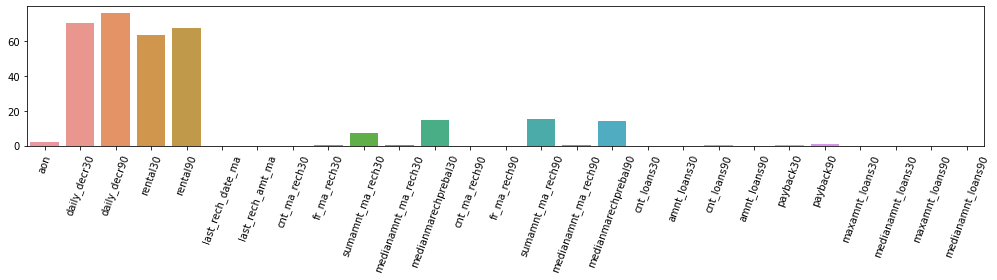

In [123]:
plt.figure(figsize=(14,4))
sns.barplot(df_new.iloc[:,:-1].columns,a2)
plt.xticks(rotation=70)
plt.tight_layout()

In [124]:
df_new.columns

Index(['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'payback30', 'payback90', 'maxamnt_loans30', 'medianamnt_loans30',
       'maxamnt_loans90', 'medianamnt_loans90', 'label'],
      dtype='object')

In [125]:
cont_var = []
dis_num_var = []
for col in df_new.columns:
    if len(df_new.loc[:,col].unique()) > 10:
        cont_var.append(col)
    else:
        dis_num_var.append(col)

In [126]:
cont_var

['aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_loans30',
 'amnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'payback30',
 'payback90']

In [127]:
# dropping the features with near zero percent variance
df_temp = df_new.copy()
for i in df_temp[cont_var]:
    #print(df_temp[cont_var].columns[i])
    num = len(np.unique(df_temp[cont_var][i]))
    percentage = float(num) / df_temp.shape[0] * 100
    
    if float('%.1f' %(percentage)) < 0.4:#float(str(percentage)[:4]) < 0.4:
        #print(i,float('%.1f' %(percentage)))
        print('INvalid Features -------------> %s %.1f' %(i,percentage))
        df_new.drop(i,axis=1,inplace=True)  
    else:
          print('Valid Features %s %.1f%%' %(i,percentage))

Valid Features aon 2.2%
Valid Features daily_decr30 70.5%
Valid Features daily_decr90 76.0%
Valid Features rental30 63.4%
Valid Features rental90 67.6%
INvalid Features -------------> last_rech_date_ma 0.0
INvalid Features -------------> last_rech_amt_ma 0.0
INvalid Features -------------> cnt_ma_rech30 0.0
Valid Features fr_ma_rech30 0.5%
Valid Features sumamnt_ma_rech30 7.3%
INvalid Features -------------> medianamnt_ma_rech30 0.2
Valid Features medianmarechprebal30 14.6%
INvalid Features -------------> cnt_ma_rech90 0.1
INvalid Features -------------> fr_ma_rech90 0.0
Valid Features sumamnt_ma_rech90 15.3%
INvalid Features -------------> medianamnt_ma_rech90 0.3
Valid Features medianmarechprebal90 14.3%
INvalid Features -------------> cnt_loans30 0.0
INvalid Features -------------> amnt_loans30 0.0
Valid Features cnt_loans90 0.5%
INvalid Features -------------> amnt_loans90 0.0
Valid Features payback30 0.7%
Valid Features payback90 1.1%


In [128]:
df_new.columns

Index(['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianmarechprebal30',
       'sumamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans90', 'payback30',
       'payback90', 'maxamnt_loans30', 'medianamnt_loans30', 'maxamnt_loans90',
       'medianamnt_loans90', 'label'],
      dtype='object')

In [129]:
len(df_new.columns)

18

In [130]:
cont_var = []
dis_num_var = []
for col in df_new.columns:
    if len(df_new.loc[:,col].unique()) > 10:
        cont_var.append(col)
    else:
        dis_num_var.append(col)
len(cont_var)

13

In [131]:
cont_var

['aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianmarechprebal30',
 'sumamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_loans90',
 'payback30',
 'payback90']

In [132]:
dis_num_var

a2 = []
for i in df_new[cont_var]:
    #print(df_temp[cont_var].columns[i])
    num = len(np.unique(df_new[cont_var][i]))
    percentage = float(num) / df_new.shape[0] * 100
    print('%s, %d, %.1f%%' % (i, num, percentage))
    a2.append(percentage)

aon, 4478, 2.2%
daily_decr30, 145437, 70.5%
daily_decr90, 156795, 76.0%
rental30, 130870, 63.4%
rental90, 139585, 67.6%
fr_ma_rech30, 1070, 0.5%
sumamnt_ma_rech30, 15045, 7.3%
medianmarechprebal30, 30239, 14.6%
sumamnt_ma_rech90, 31597, 15.3%
medianmarechprebal90, 29512, 14.3%
cnt_loans90, 1092, 0.5%
payback30, 1358, 0.7%
payback90, 2374, 1.1%


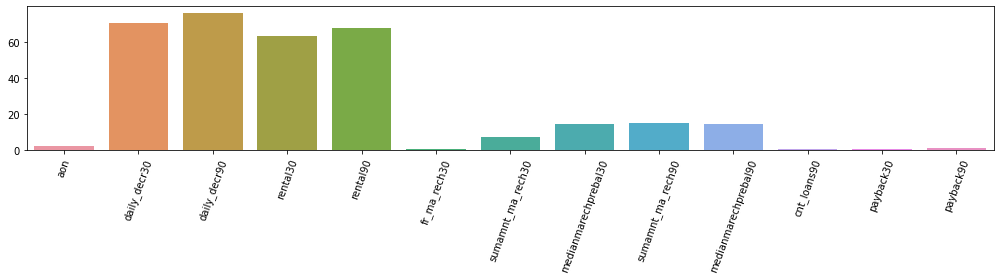

In [133]:
plt.figure(figsize=(14,4))
sns.barplot(df_new[cont_var].columns,a2)
plt.xticks(rotation=70)
plt.tight_layout()

In [134]:
#lets build a model on this processed dataset
df_new.medianamnt_loans30.value_counts()

0.0    192532
1.0      7003
0.5      6449
2.0       412
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64

In [135]:
df_new.head()

aon  daily_decr30  daily_decr90   rental30   rental90  fr_ma_rech30  \
1  6.479224     14.510179     14.526152   6.038000   6.383568      2.758924   
2  8.929490     22.971610     22.973347  15.454616  15.454616      0.000000   
3  8.118041     11.181560     11.181560   9.655359   9.655359      0.000000   
4  6.223084      2.768873      2.768873   5.422267   5.422267      0.000000   
5  9.820117      5.320595      5.320595  10.319359  10.319359      1.259921   

   sumamnt_ma_rech30  medianmarechprebal30  sumamnt_ma_rech90  \
1          14.546423              1.957434          14.546423   
2          17.953584              3.937357          17.953584   
3          11.545503              4.047761          11.545503   
4           0.000000              0.000000           9.820117   
5          27.157290              3.072317          28.641646   

   medianmarechprebal90  cnt_loans90  payback30  payback90  maxamnt_loans30  \
1              1.957434     1.259921   3.072317   3.072317              6.0   
2              3.937357     1.000000   0.000000   0.000000             12.0   
3              4.047761     1.000000   0.000000   0.000000              6.0   
4              1.357209     1.259921   0.000000   0.000000              6.0   
5              3.271066     1.912931   1.326352   1.326352              6.0   

   medianamnt_loans30  maxamnt_loans90  medianamnt_loans90  label  
1                 0.0                6                 0.0      0  
2                 0.0               12                 0.0      1  
3                 0.0                6                 0.0      1  
4                 0.0                6                 0.0      1  
5                 0.0                6                 0.0      1

In [136]:
dis_num_var

['maxamnt_loans30',
 'medianamnt_loans30',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'label']

In [137]:
df_new.maxamnt_loans30.value_counts()   # this feature is okay

6.0     177344
12.0     25925
0.0       3168
Name: maxamnt_loans30, dtype: int64

In [138]:
df_new.maxamnt_loans90.value_counts()  # this feature is also okay

6     178178
12     26290
0       1969
Name: maxamnt_loans90, dtype: int64

In [139]:
df_new.medianamnt_loans30.value_counts() , df_new.medianamnt_loans30.value_counts() / len(df_new) * 100

(0.0    192532
 1.0      7003
 0.5      6449
 2.0       412
 1.5        38
 3.0         3
 Name: medianamnt_loans30, dtype: int64,
 0.0    93.264289
 1.0     3.392318
 0.5     3.123955
 2.0     0.199577
 1.5     0.018408
 3.0     0.001453
 Name: medianamnt_loans30, dtype: float64)

In [140]:
df_new.medianamnt_loans90.value_counts() , df_new.medianamnt_loans90.value_counts() / len(df_new) * 100

(0.0    194501
 1.0      6032
 0.5      5580
 2.0       302
 1.5        19
 3.0         3
 Name: medianamnt_loans90, dtype: int64,
 0.0    94.218091
 1.0     2.921957
 0.5     2.703004
 2.0     0.146292
 1.5     0.009204
 3.0     0.001453
 Name: medianamnt_loans90, dtype: float64)

In [141]:
# We can see that in the above 2 features 95 percent of the values are 0. thus we can safely remove these 2 columns.
df.drop(['medianamnt_loans30','medianamnt_loans90'],1,inplace = True)

In [142]:
X = df_new.drop('label',1)
y = df_new['label']

In [143]:
# stratified srain test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [144]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((144505, 17), (144505,), (61932, 17), (61932,))

In [145]:
train_n_ret_score(LogisticRegression())  # improvement 

(0.5932190435996151, 0.9362819846103674)

In [146]:
train_n_ret_score(DecisionTreeClassifier())

(0.7007584944160096, 0.9214438547253174)

In [147]:
train_n_ret_score(RandomForestClassifier())

(0.7045860803278835, 0.9515689376267975)

In [148]:
train_n_ret_score(GradientBoostingClassifier())

(0.6675502178377533, 0.9506177209812736)

In [149]:
train_n_ret_score(GaussianNB())   # best model yet... # also faster in computation

(0.7353360851837955, 0.8233090574250795)

<AxesSubplot:xlabel='label', ylabel='count'>

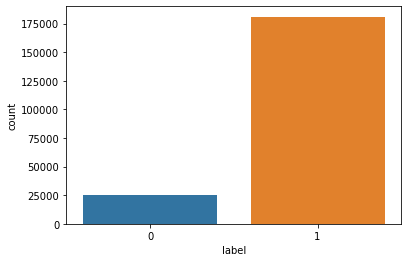

In [150]:
sns.countplot(df_new.label)

In [151]:
# selecting the best features out of the reduced features
from sklearn.feature_selection import SelectKBest,f_classif
fs = SelectKBest(score_func=f_classif,k=14)

In [152]:
fs.fit(X_train,y_train)

X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

In [153]:
fs.get_support()[1]

True

In [154]:
list(fs.get_support())[0]

False

In [155]:
kept_cols = []
for n,i in enumerate(list(fs.get_support())):
    if i == True:
        kept_cols.append(X_train.columns[n])

In [156]:
kept_cols

['daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'sumamnt_ma_rech30',
 'medianmarechprebal30',
 'sumamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_loans90',
 'payback30',
 'payback90',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'maxamnt_loans90']

In [157]:
len(kept_cols)

14

In [158]:
X_train.shape,X_train_fs.shape

((144505, 17), (144505, 14))

In [159]:
temp_model = LogisticRegression()
temp_model.fit(X_train_fs,y_train)
roc_auc_score(y_test,temp_model.predict(X_test_fs))  # best score yet for Logistic

0.5945025459238241

In [160]:
temp_model = GaussianNB()
temp_model.fit(X_train_fs,y_train)
roc_auc_score(y_test,temp_model.predict(X_test_fs))  # best score yet <<All Over >>

0.7369026418936021

In [161]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
cross_val_score(temp_model, X_train_fs, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

array([0.78929674, 0.79201349, 0.79751559, 0.79199418, 0.78860778,
       0.79577231, 0.79326021, 0.79543862, 0.7852544 , 0.80009483,
       0.79732485, 0.79484725, 0.78806961, 0.78608162, 0.78656855,
       0.79639559, 0.79652971, 0.7992409 , 0.7926931 , 0.79316832,
       0.78832838, 0.77664154, 0.783361  , 0.78985557, 0.79898341,
       0.80350331, 0.79944959, 0.802001  , 0.78636421, 0.80123487])

In [162]:
temp_model = RandomForestClassifier()
temp_model.fit(X_train_fs,y_train)
roc_auc_score(y_test,temp_model.predict(X_test_fs))

0.7074891786386737

In [163]:
# IF we change the K to 14 , we are gettng the best roc_auc_score on Random Forest as well as GaussinNB,
# Thus we will keep 14 features in the dataset.
## Let's try some oversampling using SMOTE
from collections import Counter
Counter(y_train)

Counter({0: 17846, 1: 126659})

In [164]:
pip install scikit-learn

In [165]:
from imblearn.over_sampling import SMOTE

In [166]:
over_s = SMOTE(sampling_strategy=0.15)

In [167]:
X_train_over,y_train_over = over_s.fit_resample(X_train_fs,y_train)

In [168]:
Counter(y_train_over)

Counter({0: 18998, 1: 126659})

<AxesSubplot:xlabel='label', ylabel='count'>

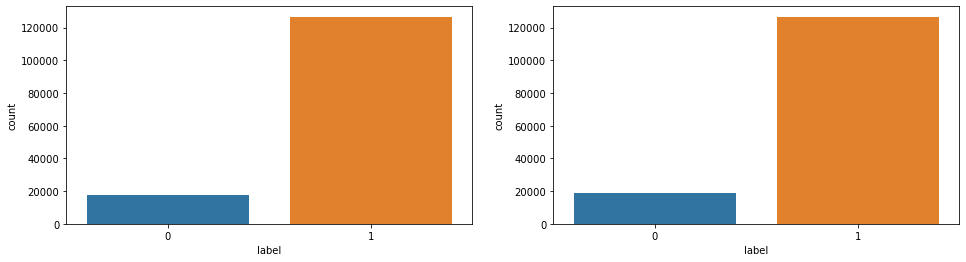

In [169]:
fig = plt.figure(figsize=(16,4))

fig.add_subplot(121)
sns.countplot(y_train)
fig.add_subplot(122)
sns.countplot(y_train_over)

In [170]:
X_train_fs = pd.DataFrame(X_train_fs,columns=kept_cols)
X_train_over = pd.DataFrame(X_train_over,columns=kept_cols)

<AxesSubplot:xlabel='daily_decr90', ylabel='rental90'>

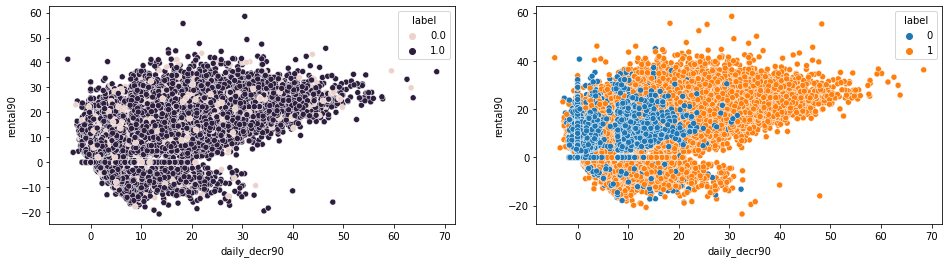

In [171]:
fig = plt.figure(figsize=(16,4))

fig.add_subplot(121)
sns.scatterplot(X_train_fs.daily_decr90,X_train_fs.rental90,hue=y_train)
fig.add_subplot(122)
sns.scatterplot(X_train_over.daily_decr90,X_train_over.rental90,hue=y_train_over)

In [172]:
len(y_train),len(y_train_over)

(144505, 145657)

In [173]:
len(y_train_over)-len(y_train)

1152

In [174]:
X_train_over.shape,y_train_over.shape

((145657, 14), (145657,))

In [175]:
temp_model = LogisticRegression()
temp_model.fit(X_train_over,y_train_over)
roc_auc_score(y_test,temp_model.predict(X_test_fs))  # best score yet for Logiristic Regression

0.5983385285168441

In [176]:
temp_model = GaussianNB()
temp_model.fit(X_train_over,y_train_over)
roc_auc_score(y_test,temp_model.predict(X_test_fs))   # Overall best score untill now

0.7368274475183824

In [177]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
cross_val_score(temp_model, X_train_over, y_train_over, scoring='roc_auc', cv=cv, n_jobs=-1)

array([0.79549482, 0.80325571, 0.7898931 , 0.7996849 , 0.79683089,
       0.78844939, 0.79115558, 0.79490147, 0.79497137, 0.7811777 ,
       0.80431383, 0.78266044, 0.79445451, 0.80278167, 0.78791167,
       0.79418925, 0.79475288, 0.78560544, 0.8044387 , 0.78432373,
       0.79494045, 0.78998249, 0.79862309, 0.79325804, 0.79226637,
       0.79951353, 0.79039873, 0.79591157, 0.78440829, 0.79619136])

In [178]:
temp_model = RandomForestClassifier()
temp_model.fit(X_train_over,y_train_over)
roc_auc_score(y_test,temp_model.predict(X_test_fs))  # best score for Random forst yet

0.7086482337660696

In [179]:
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
cross_val_score(temp_model, X_train_over, y_train_over, scoring='roc_auc', cv=cv, n_jobs=-1)  # best OVERALL cross validation score on ten folds 

array([0.8858052 , 0.88787026, 0.88297556, 0.88048227, 0.88208494,
       0.89025129, 0.88322496, 0.88296769, 0.86871264, 0.88676794,
       0.88250754, 0.87891292, 0.88022613, 0.88607781, 0.88735469,
       0.88078509, 0.88218542, 0.8901366 , 0.88308283, 0.87902978,
       0.87356069, 0.88170911, 0.88437352, 0.88990821, 0.88388564,
       0.88633187, 0.88524785, 0.88293253, 0.88697154, 0.88571216])

In [180]:
temp_model = GradientBoostingClassifier()
temp_model.fit(X_train_over,y_train_over)
roc_auc_score(y_test,temp_model.predict(X_test_fs))

0.6776013872030224

In [181]:
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
cross_val_score(temp_model, X_train_over, y_train_over, scoring='roc_auc', cv=cv, n_jobs=-1)  # best OVERALL cross validation score on ten folds 

array([0.87117368, 0.88269985, 0.87437329, 0.879672  , 0.87927284,
       0.87922553, 0.87678125, 0.87315172, 0.88366647, 0.87579462,
       0.88502572, 0.87683552, 0.86870424, 0.88303573, 0.87635028,
       0.88293843, 0.87483005, 0.8813939 , 0.86988828, 0.87570049,
       0.87329683, 0.87136713, 0.87821376, 0.87822527, 0.87569313,
       0.88386605, 0.87636385, 0.88085844, 0.88022208, 0.87868169])

In [182]:
# So preprocess dataframes we have till now are:
X_train_over.head()

daily_decr30  daily_decr90   rental30   rental90  sumamnt_ma_rech30  \
0     21.870985     21.903850  17.741120  18.584672          24.140381   
1     25.842370     25.892500  22.593644  23.479765          28.125710   
2     16.576140     16.617647  20.710704  21.823876          20.995464   
3     20.758031     20.821426   7.528308   9.775079          15.937254   
4      3.540234      3.540234   5.819042   5.819042          13.871269   

   medianmarechprebal30  sumamnt_ma_rech90  medianmarechprebal90  cnt_loans90  \
0              3.955763          26.701794              3.834950     2.289428   
1              2.924018          30.362636              2.802039     1.912931   
2              4.932424          23.220315              5.033114     1.709976   
3              4.069816          27.165874              4.069816     1.000000   
4              3.018405          18.106366              3.045600     1.442250   

   payback30  payback90  maxamnt_loans30  medianamnt_loans30  maxamnt_loans90  
0   1.644141   1.630324              6.0                 0.0              6.0  
1   1.259921   1.259921              6.0                 0.0              6.0  
2   1.326352   1.259921              6.0                 0.0              6.0  
3   0.000000   0.000000              6.0                 0.0              6.0  
4   1.442250   1.442250              6.0                 0.0              6.0

In [183]:
y_train_over.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [184]:
X_train_fs.head()

daily_decr30  daily_decr90   rental30   rental90  sumamnt_ma_rech30  \
0     21.870985     21.903850  17.741120  18.584672          24.140381   
1     25.842370     25.892500  22.593644  23.479765          28.125710   
2     16.576140     16.617647  20.710704  21.823876          20.995464   
3     20.758031     20.821426   7.528308   9.775079          15.937254   
4      3.540234      3.540234   5.819042   5.819042          13.871269   

   medianmarechprebal30  sumamnt_ma_rech90  medianmarechprebal90  cnt_loans90  \
0              3.955763          26.701794              3.834950     2.289428   
1              2.924018          30.362636              2.802039     1.912931   
2              4.932424          23.220315              5.033114     1.709976   
3              4.069816          27.165874              4.069816     1.000000   
4              3.018405          18.106366              3.045600     1.442250   

   payback30  payback90  maxamnt_loans30  medianamnt_loans30  maxamnt_loans90  
0   1.644141   1.630324              6.0                 0.0              6.0  
1   1.259921   1.259921              6.0                 0.0              6.0  
2   1.326352   1.259921              6.0                 0.0              6.0  
3   0.000000   0.000000              6.0                 0.0              6.0  
4   1.442250   1.442250              6.0                 0.0              6.0

In [185]:
y_train.head()

130453    0
151046    1
52222     1
177089    1
165123    1
Name: label, dtype: int64

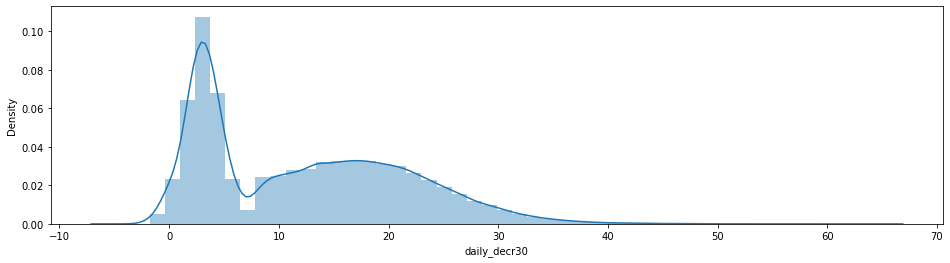

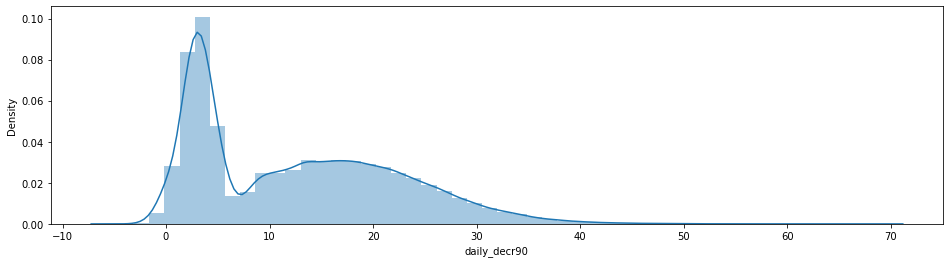

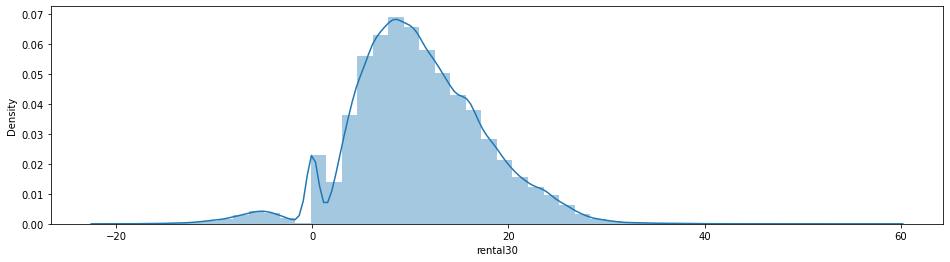

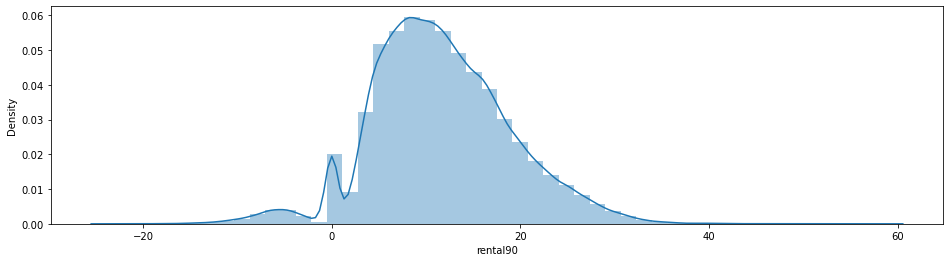

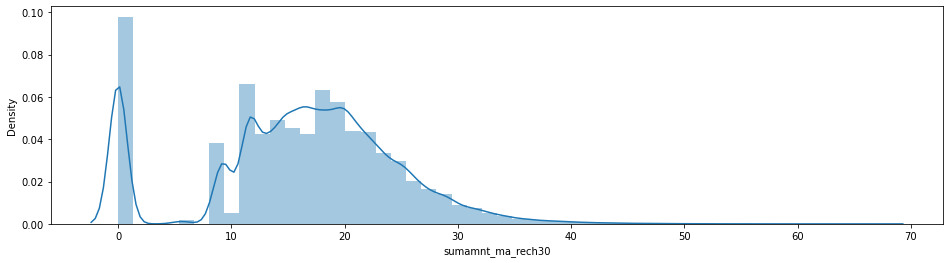

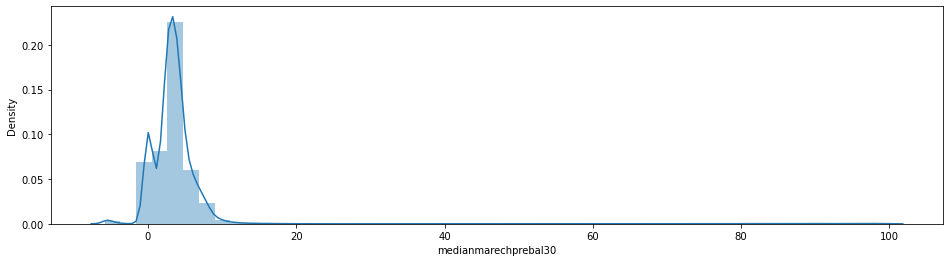

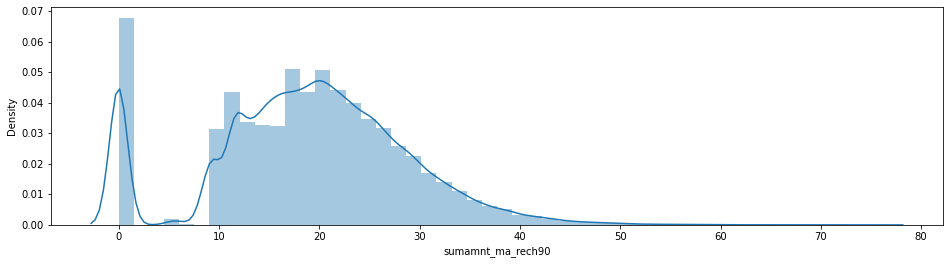

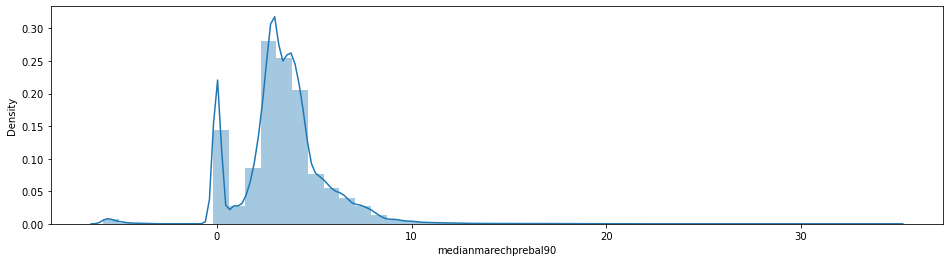

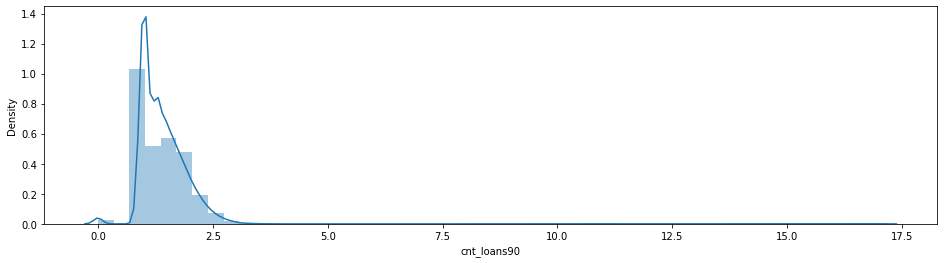

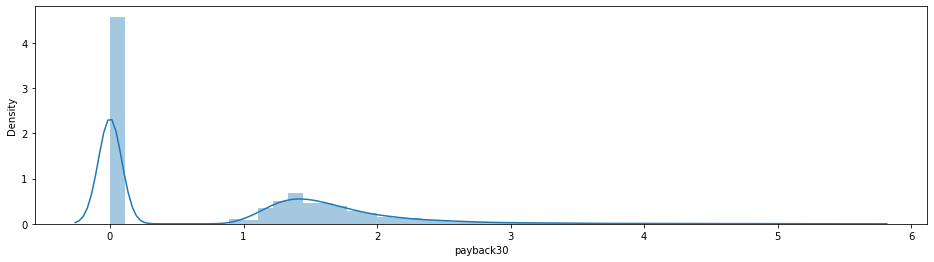

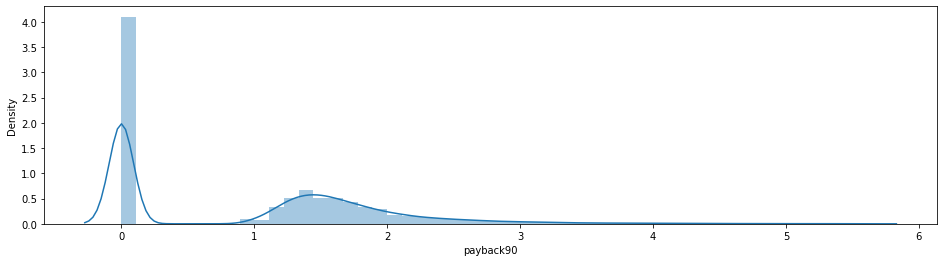

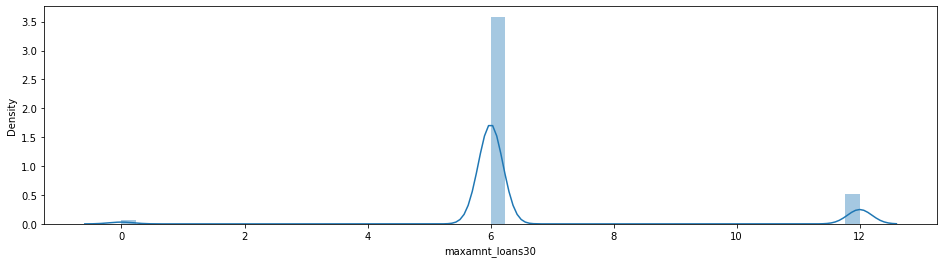

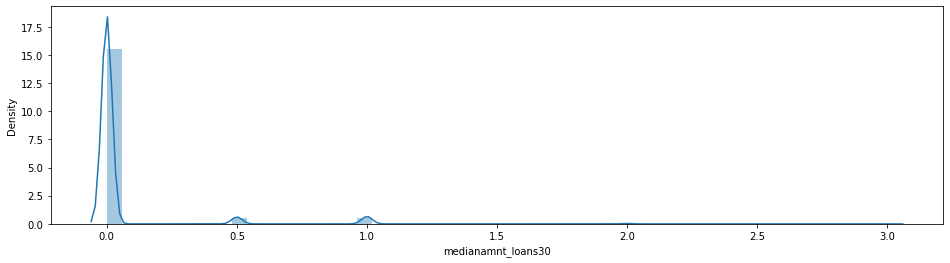

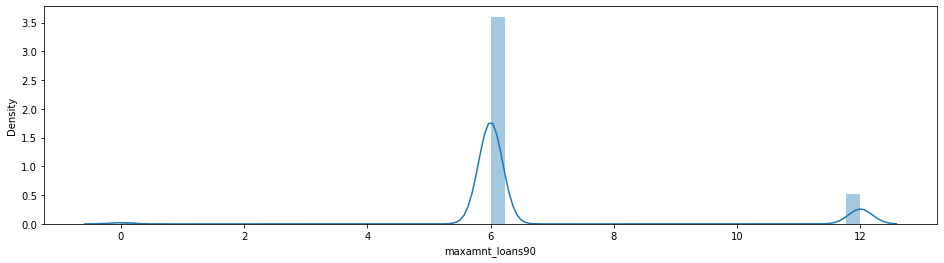

In [186]:
# Now let's try scaling the variables.
# lets get the distributuion og the features again
for col in X_train_over:
    plt.figure(figsize=(16,4))
    sns.distplot(X_train_over[col])

In [187]:
len(X_train_fs) + len(X_test_fs),len(df)

(206437, 209593)

In [188]:
# data loss up till now : 
print('number of samples lost : ', len(df) - len(X_train_fs) - len(X_test_fs) )
print('percentage of data loss : ',(len(df) - len(X_train_fs) - len(X_test_fs)) / len(df) * 100)

number of samples lost :  3156
percentage of data loss :  1.5057754791429103


In [189]:
sns.boxplot(X_train_over [ X_train_over.medianmarechprebal90 > X_train_over.medianmarechprebal90.quantile(0.995) ])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<AxesSubplot:xlabel='medianmarechprebal90'>

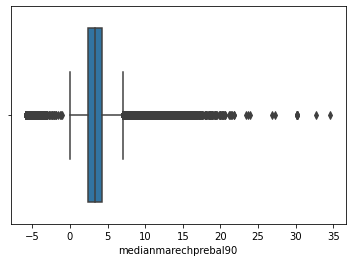

In [190]:
sns.boxplot(X_train_over.medianmarechprebal90)

In [ ]:
X_train_over [ X_train_over.medianmarechprebal90 > X_train_over.medianmarechprebal90.quantile(0.995) ]

In [191]:
samples_to_drop = X_train_over [ X_train_over.medianmarechprebal90 > X_train_over.medianmarechprebal90.quantile(0.995) ].index

In [192]:
len(samples_to_drop)

729

In [193]:
# let's drop these 729 samples
X_train_over.shape,y_train_over.shape

((145657, 14), (145657,))

In [194]:
samples_to_drop

Int64Index([    58,    169,    260,    354,    835,   1057,   1160,   1176,
              1203,   1220,
            ...
            142335, 142899, 143012, 143027, 143467, 143553, 143960, 144058,
            144166, 144371],
           dtype='int64', length=729)

In [195]:
X_train_over.drop(samples_to_drop,inplace=True)

In [196]:
y_train_over.drop(labels=samples_to_drop,inplace=True)

In [197]:
X_train_over.shape,y_train_over.shape

((144928, 14), (144928,))

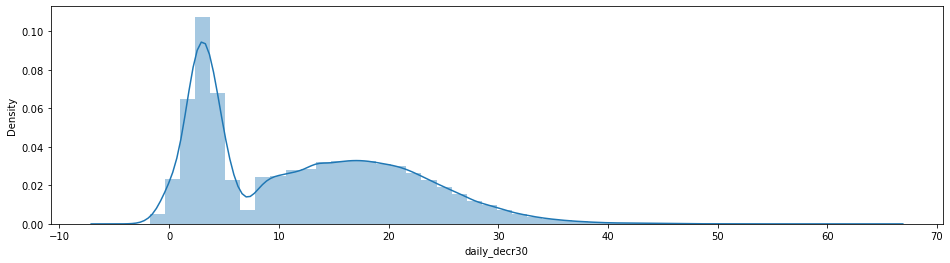

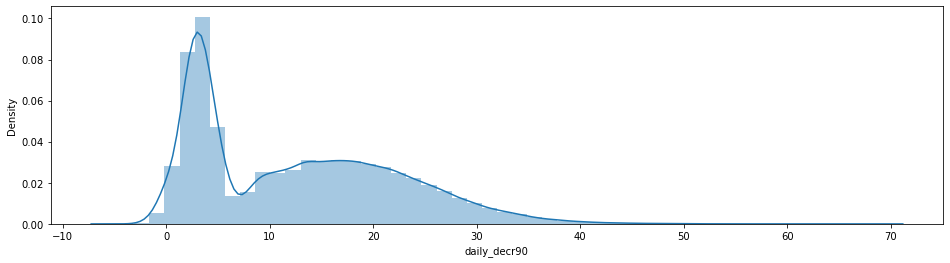

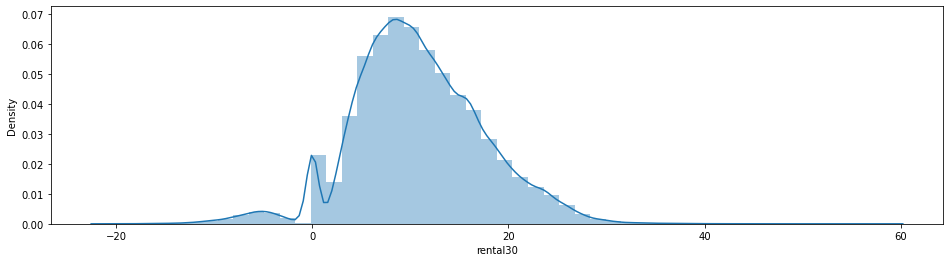

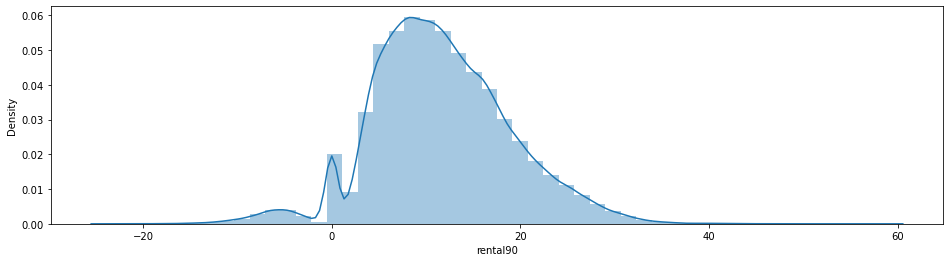

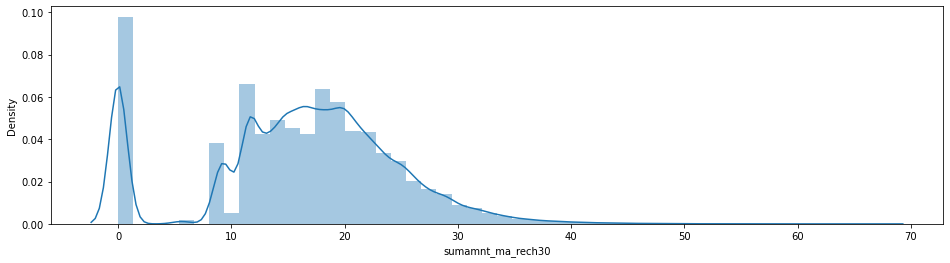

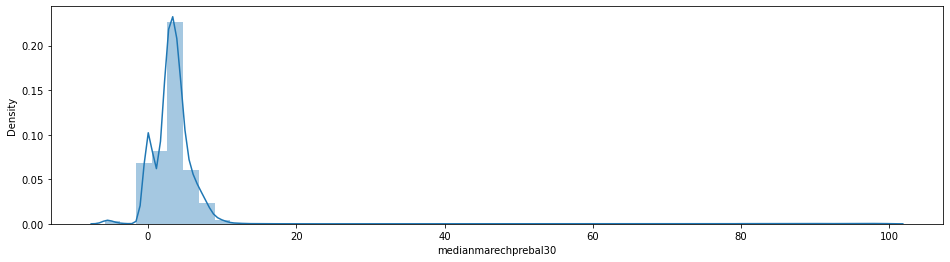

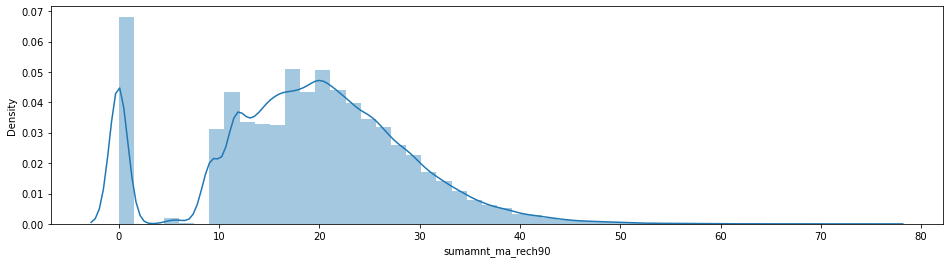

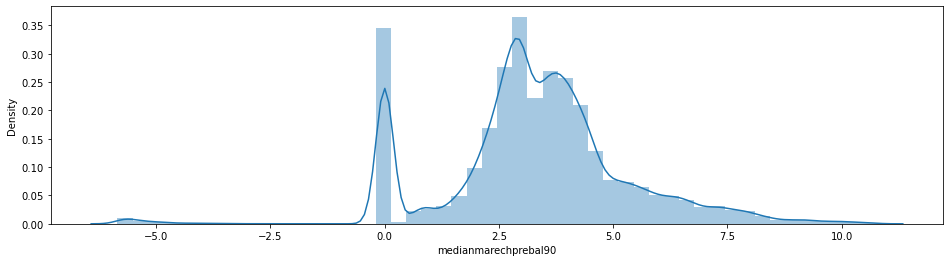

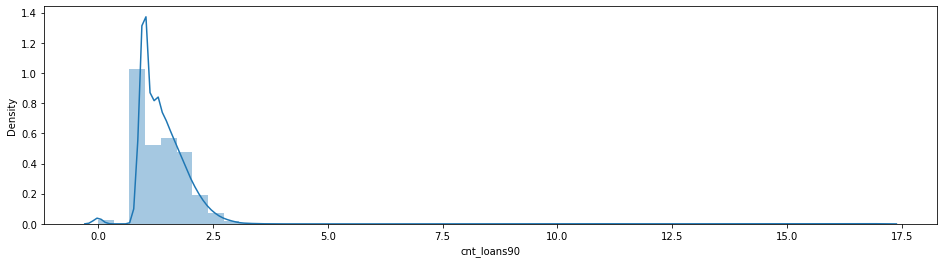

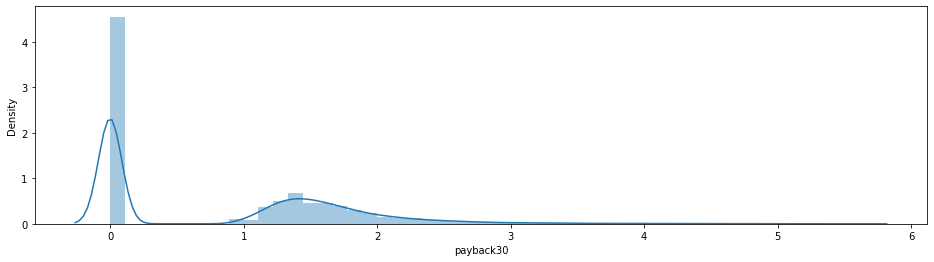

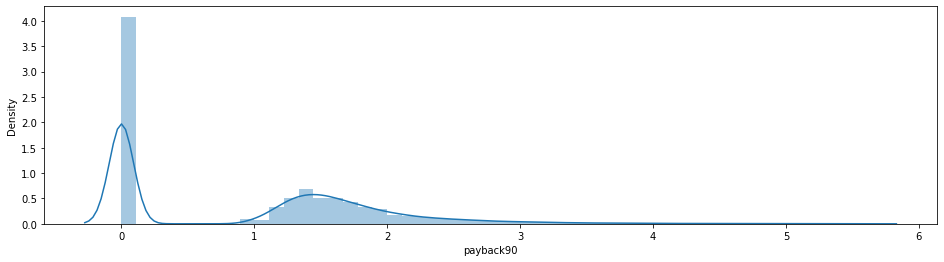

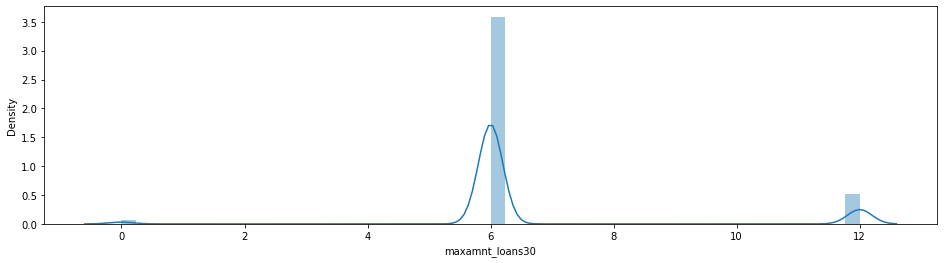

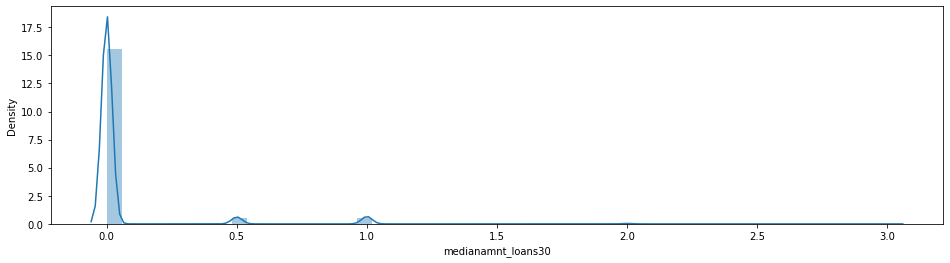

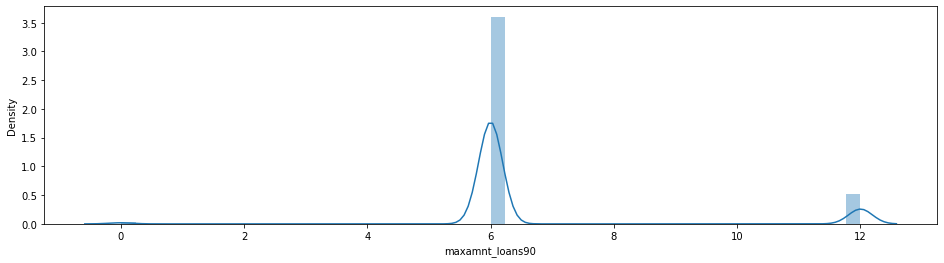

In [198]:
# lets get the distributuion og the features again
for col in X_train_over:
    plt.figure(figsize=(16,4))
    sns.distplot(X_train_over[col])

In [199]:
# let's do the same thing for medianmarechprebal30
sns.boxplot(X_train_over [ X_train_over.medianmarechprebal30 > X_train_over.medianmarechprebal30.quantile(0.995) ])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<AxesSubplot:xlabel='medianmarechprebal30'>

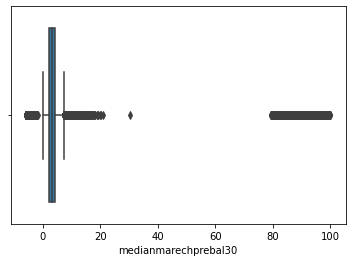

In [200]:
sns.boxplot(X_train_over.medianmarechprebal30)

In [201]:
X_train_over [ X_train_over.medianmarechprebal30 > X_train_over.medianmarechprebal30.quantile(0.995) ]

daily_decr30  daily_decr90   rental30   rental90  sumamnt_ma_rech30  \
54          2.624731      2.624731   9.143064   9.143064          15.674409   
76         15.515697     15.517497  13.764742  13.852464          14.546423   
112         2.210965      2.210965   6.391493   6.391493          13.217256   
338        22.669502     22.716236  24.535730  27.696206          20.983358   
474         1.469508      1.469508   0.000000   0.000000           0.000000   
...              ...           ...        ...        ...                ...   
144575     10.007911     10.019337   4.719506   4.883680          11.545503   
144768     14.282231     14.309475  21.758312  21.917807          21.232203   
144818     14.645435     14.661145  22.283067  23.604978          17.503702   
145202      8.552736      8.558657   2.633907   2.798944           0.000000   
145224      0.389451      0.389451   3.498168   3.498168           0.000000   

        medianmarechprebal30  sumamnt_ma_rech90  medianmarechprebal90  \
54                 87.316284          15.674409              2.438499   
76                 89.748838          16.659908              4.610436   
112                87.342524          13.217256              6.701759   
338                83.974534          26.070322              3.107233   
474                94.297595           9.177544              3.072317   
...                      ...                ...                   ...   
144575             88.016456          13.142622              2.324709   
144768             84.519027          21.973267              2.274245   
144818             93.874347          17.503702              3.825103   
145202             83.978631           0.000000              0.000000   
145224             82.067068           0.000000              0.000000   

        cnt_loans90  payback30  payback90  maxamnt_loans30  \
54         1.000000   0.000000   0.000000         6.000000   
76         1.259921   0.000000   0.000000         6.000000   
112        1.259921   0.000000   0.000000         6.000000   
338        1.000000   0.000000   0.000000        12.000000   
474        1.000000   0.000000   0.000000         6.000000   
...             ...        ...        ...              ...   
144575     1.000000   0.000000   0.000000         6.000000   
144768     1.000000   0.000000   0.000000         6.000000   
144818     1.224604   1.583887   1.583887         9.047208   
145202     1.000000   0.000000   0.000000         6.000000   
145224     1.000000   0.000000   0.000000         6.000000   

        medianamnt_loans30  maxamnt_loans90  
54                     0.0         6.000000  
76                     0.0         6.000000  
112                    0.5         6.000000  
338                    0.0        12.000000  
474                    0.0         6.000000  
...                    ...              ...  
144575                 0.0         6.000000  
144768                 0.0         6.000000  
144818                 0.0         9.047208  
145202                 0.0         6.000000  
145224                 0.0         6.000000  

[725 rows x 14 columns]

In [202]:
# let's remove these 725 rows too
samples_to_drop = X_train_over [ X_train_over.medianmarechprebal30 > X_train_over.medianmarechprebal30.quantile(0.995) ].index
X_train_over.drop(samples_to_drop,inplace=True)
y_train_over.drop(labels=samples_to_drop,inplace=True)
X_train_over.shape,y_train_over.shape

((144203, 14), (144203,))

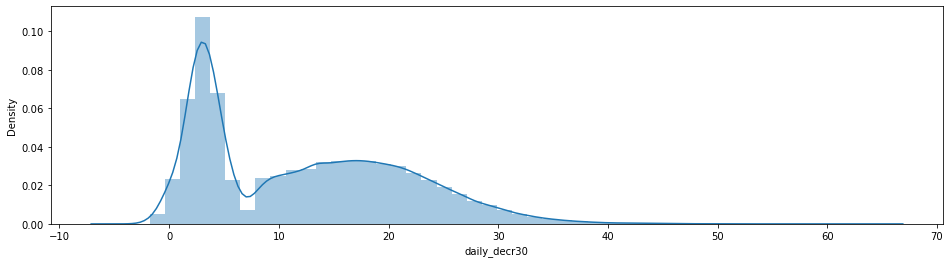

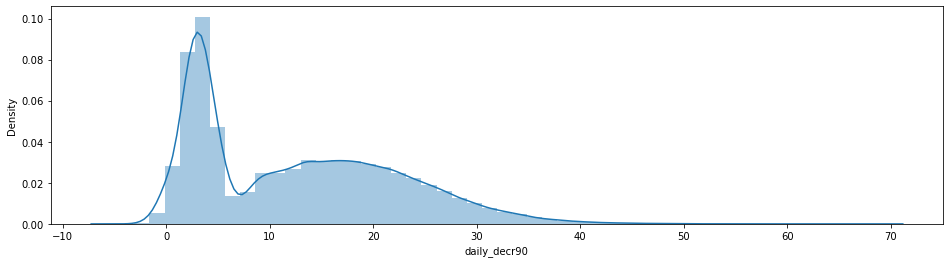

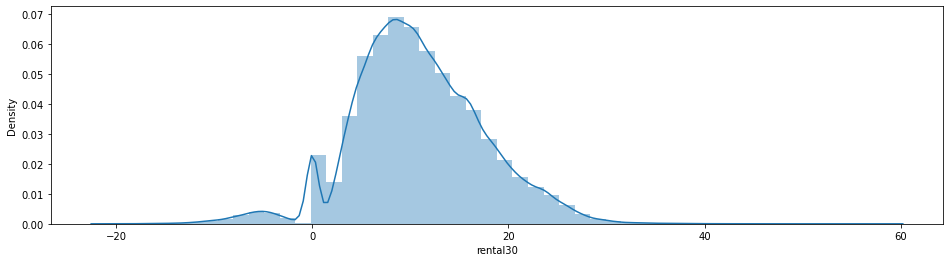

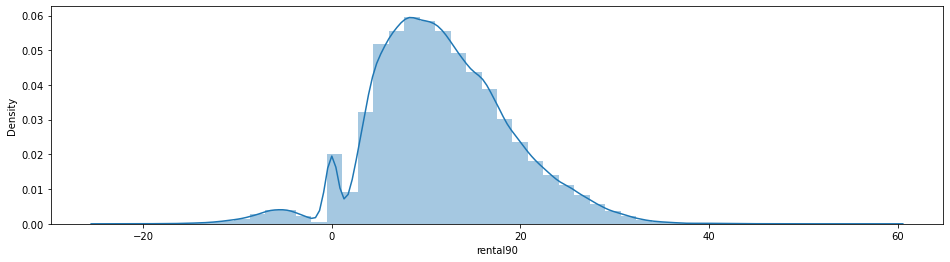

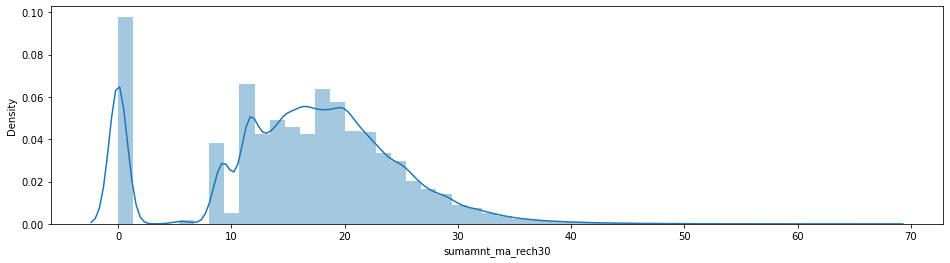

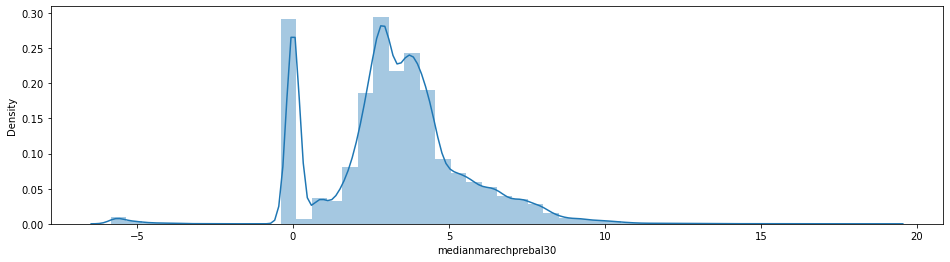

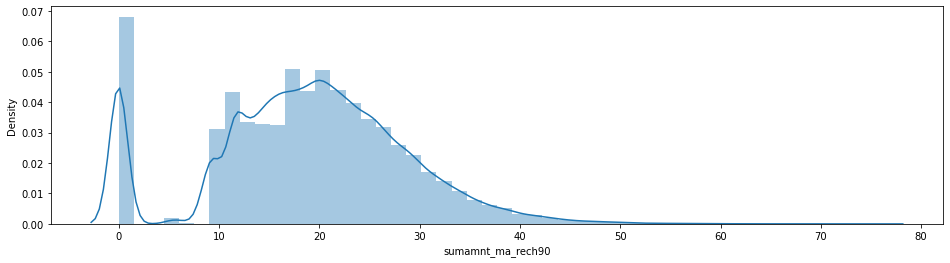

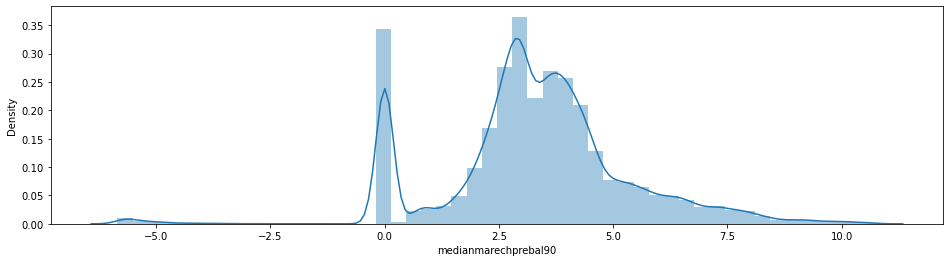

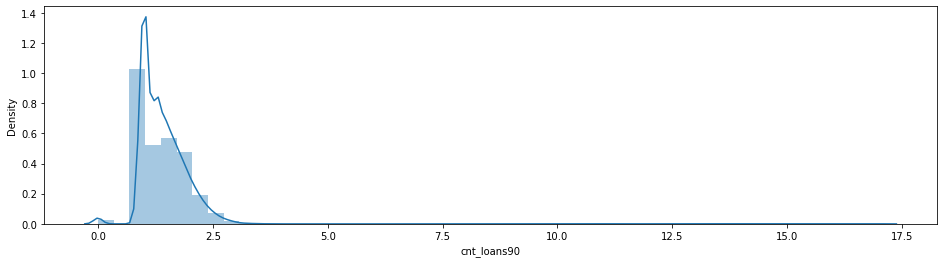

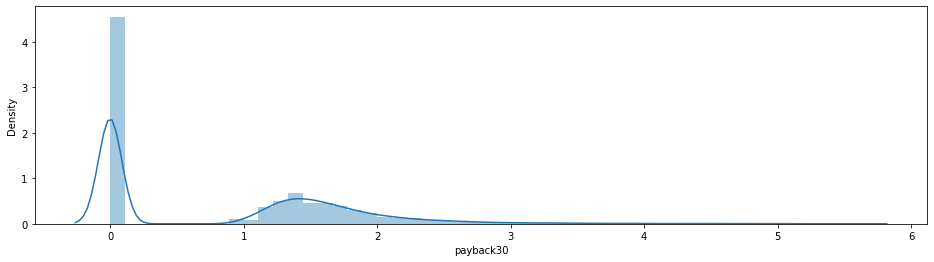

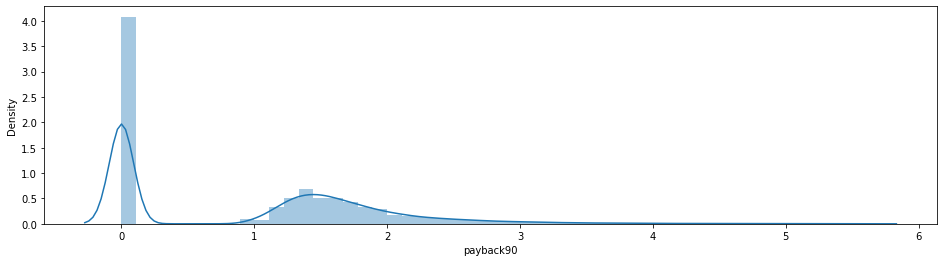

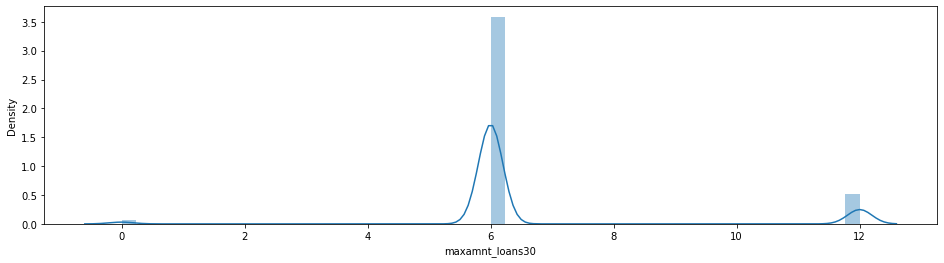

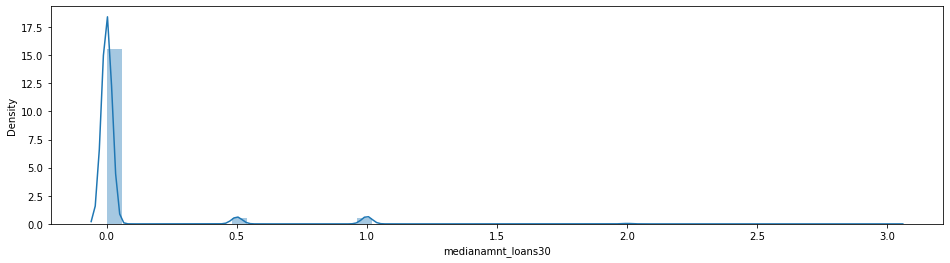

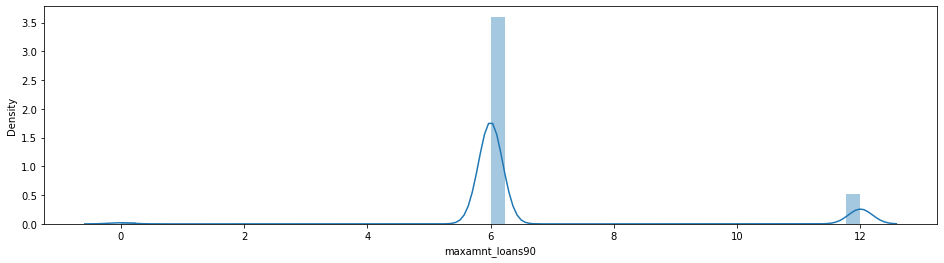

In [203]:
# lets get the distributuion og the features again
for col in X_train_over:
    plt.figure(figsize=(16,4))
    sns.distplot(X_train_over[col])

In [204]:
# let's now do standard scaling on the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_over)
X_test_scaled = sc.transform(X_test_fs)

In [205]:
#Saving the processed data
X_train_over.join(y_train_over).to_csv('train_data_preprocessed.csv')#.append(pd.DataFrame(X_test_fs,columns=kept_cols).join(y_test),ignore_index=True)
pd.DataFrame(X_test_fs,columns=kept_cols).join(y_test.reset_index()).to_csv('test_data_preprocessed.csv')

In [206]:
# Final Model Building
# read in the train data
train_df = pd.read_csv('train_data_preprocessed.csv',index_col=[0])
train_df

daily_decr30  daily_decr90   rental30   rental90  sumamnt_ma_rech30  \
0          21.870985     21.903850  17.741120  18.584672          24.140381   
1          25.842370     25.892500  22.593644  23.479765          28.125710   
2          16.576140     16.617647  20.710704  21.823876          20.995464   
3          20.758031     20.821426   7.528308   9.775079          15.937254   
4           3.540234      3.540234   5.819042   5.819042          13.871269   
...              ...           ...        ...        ...                ...   
145652     -0.227324     -0.227324   3.433511   3.433511           0.000000   
145653     17.890385     17.907441  25.019366  25.482505          18.723032   
145654      7.937620      7.937642   8.482994   8.704014           0.000000   
145655     17.826144     17.826886  12.957084  13.524106          19.930999   
145656     10.058422     10.061765   5.188994   6.272948           0.000000   

        medianmarechprebal30  sumamnt_ma_rech90  medianmarechprebal90  \
0                   3.955763          26.701794              3.834950   
1                   2.924018          30.362636              2.802039   
2                   4.932424          23.220315              5.033114   
3                   4.069816          27.165874              4.069816   
4                   3.018405          18.106366              3.045600   
...                      ...                ...                   ...   
145652              0.000000           0.000000              0.000000   
145653              3.612057          20.308987              3.172614   
145654              0.000000           0.000000              0.000000   
145655              2.453901          26.068392              2.451486   
145656              0.000000           0.000000              0.000000   

        cnt_loans90  payback30  payback90  maxamnt_loans30  \
0          2.289428   1.644141   1.630324              6.0   
1          1.912931   1.259921   1.259921              6.0   
2          1.709976   1.326352   1.259921              6.0   
3          1.000000   0.000000   0.000000              6.0   
4          1.442250   1.442250   1.442250              6.0   
...             ...        ...        ...              ...   
145652     1.000000   0.000000   0.000000              6.0   
145653     1.000000   0.000000   0.000000              6.0   
145654     1.000000   0.000000   0.000000              6.0   
145655     1.259921   0.000000   0.000000              6.0   
145656     1.000000   0.000000   0.000000              6.0   

        medianamnt_loans30  maxamnt_loans90  label  
0                      0.0              6.0      0  
1                      0.0              6.0      1  
2                      0.0              6.0      1  
3                      0.0              6.0      1  
4                      0.0              6.0      1  
...                    ...              ...    ...  
145652                 0.0              6.0      0  
145653                 0.0              6.0      0  
145654                 0.0              6.0      0  
145655                 0.0              6.0      0  
145656                 0.0              6.0      0  

[144203 rows x 15 columns]

In [207]:
test_df = pd.read_csv('test_data_preprocessed.csv',index_col=[0])
test_df

daily_decr30  daily_decr90   rental30   rental90  sumamnt_ma_rech30  \
0         26.450721     28.072660  21.468633  24.609621          25.298814   
1         22.388419     22.449368  12.900403  13.306315          19.153875   
2         26.576143     27.832473  21.206089  21.935652          24.310773   
3         19.279388     19.292895   8.145916   9.661290          17.637823   
4         20.303651     20.326249  15.613896  16.718895          24.039864   
...             ...           ...        ...        ...                ...   
61927     20.057667     20.065618  14.872791  14.899056          17.953584   
61928     16.127881     18.483082   0.000000  12.045062           0.000000   
61929     12.026638     12.034622  14.273189  15.029807          11.562981   
61930     20.493553     23.268190  11.242045  13.660900          19.744243   
61931     21.141896     24.161526  12.479561  13.654128          19.061665   

       medianmarechprebal30  sumamnt_ma_rech90  medianmarechprebal90  \
0                  7.747200          30.892797              4.267723   
1                  0.000000          23.794542              5.117230   
2                  2.093099          32.330877              2.130470   
3                  4.396830          20.539484              3.779763   
4                  3.892996          27.253668              3.802952   
...                     ...                ...                   ...   
61927              2.604627          19.427961              3.651072   
61928              0.000000          16.652699              7.509617   
61929              4.020726          11.562981              4.020726   
61930              2.900436          27.499174              2.375208   
61931              3.088826          25.297252              3.461343   

       cnt_loans90  payback30  payback90  maxamnt_loans30  medianamnt_loans30  \
0         1.912931   0.000000   1.462009              6.0                 0.0   
1         1.587401   2.429121   2.257179              6.0                 0.0   
2         1.587401   1.493802   1.663103              6.0                 0.0   
3         1.442250   0.000000   1.765174              6.0                 0.0   
4         2.223980   1.379462   1.381450              6.0                 0.0   
...            ...        ...        ...              ...                 ...   
61927     1.259921   0.000000   0.000000              6.0                 0.0   
61928     1.000000   0.000000   0.000000             12.0                 0.0   
61929     1.442250   2.000000   2.000000              6.0                 0.0   
61930     1.817121   0.000000   1.565040              0.0                 0.0   
61931     2.080084   1.442250   1.663103              6.0                 0.0   

       maxamnt_loans90   index  label  
0                  6.0  194663      1  
1                  6.0  141541      1  
2                  6.0  197775      1  
3                  6.0  166691      1  
4                  6.0  100933      1  
...                ...     ...    ...  
61927              6.0   65054      1  
61928             12.0   43206      1  
61929              6.0   92081      0  
61930              6.0   87230      1  
61931              6.0  183183      1  

[61932 rows x 16 columns]

In [208]:
# X and y split in the train dataset

X = train_df.drop('label',1)
y = train_df['label']

In [209]:
#using Repeated K Fods to validate the model
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
#cross_val_score(temp_model, X_train_fs, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
cross_val_score(LogisticRegression(),X,y,scoring='roc_auc',n_jobs=-1)

array([0.82352737, 0.82559092, 0.82633549, 0.82455338, 0.82695366])

In [ ]:
cross_val_score(DecisionTreeClassifier(),X,y,scoring='roc_auc',n_jobs=-1)

In [ ]:
cross_val_score(RandomForestClassifier(),X,y,scoring='roc_auc',n_jobs=-1)

In [ ]:
cross_val_score(GaussianNB(),X,y,scoring='roc_auc',n_jobs=-1)

In [ ]:
cross_val_score(GradientBoostingClassifierdientBoostingClassifier(),X,y,scoring='roc_auc',n_jobs=-1)

In [210]:
# Test the data on the test set with the best model (RandomForest)
best_model = RandomForestClassifier()
best_model.fit(X,y)

RandomForestClassifier()

In [212]:
X_test = test_df.drop('label',1)
y_test = test_df['label']

In [213]:
X_test

daily_decr30  daily_decr90   rental30   rental90  sumamnt_ma_rech30  \
0         26.450721     28.072660  21.468633  24.609621          25.298814   
1         22.388419     22.449368  12.900403  13.306315          19.153875   
2         26.576143     27.832473  21.206089  21.935652          24.310773   
3         19.279388     19.292895   8.145916   9.661290          17.637823   
4         20.303651     20.326249  15.613896  16.718895          24.039864   
...             ...           ...        ...        ...                ...   
61927     20.057667     20.065618  14.872791  14.899056          17.953584   
61928     16.127881     18.483082   0.000000  12.045062           0.000000   
61929     12.026638     12.034622  14.273189  15.029807          11.562981   
61930     20.493553     23.268190  11.242045  13.660900          19.744243   
61931     21.141896     24.161526  12.479561  13.654128          19.061665   

       medianmarechprebal30  sumamnt_ma_rech90  medianmarechprebal90  \
0                  7.747200          30.892797              4.267723   
1                  0.000000          23.794542              5.117230   
2                  2.093099          32.330877              2.130470   
3                  4.396830          20.539484              3.779763   
4                  3.892996          27.253668              3.802952   
...                     ...                ...                   ...   
61927              2.604627          19.427961              3.651072   
61928              0.000000          16.652699              7.509617   
61929              4.020726          11.562981              4.020726   
61930              2.900436          27.499174              2.375208   
61931              3.088826          25.297252              3.461343   

       cnt_loans90  payback30  payback90  maxamnt_loans30  medianamnt_loans30  \
0         1.912931   0.000000   1.462009              6.0                 0.0   
1         1.587401   2.429121   2.257179              6.0                 0.0   
2         1.587401   1.493802   1.663103              6.0                 0.0   
3         1.442250   0.000000   1.765174              6.0                 0.0   
4         2.223980   1.379462   1.381450              6.0                 0.0   
...            ...        ...        ...              ...                 ...   
61927     1.259921   0.000000   0.000000              6.0                 0.0   
61928     1.000000   0.000000   0.000000             12.0                 0.0   
61929     1.442250   2.000000   2.000000              6.0                 0.0   
61930     1.817121   0.000000   1.565040              0.0                 0.0   
61931     2.080084   1.442250   1.663103              6.0                 0.0   

       maxamnt_loans90   index  
0                  6.0  194663  
1                  6.0  141541  
2                  6.0  197775  
3                  6.0  166691  
4                  6.0  100933  
...                ...     ...  
61927              6.0   65054  
61928             12.0   43206  
61929              6.0   92081  
61930              6.0   87230  
61931              6.0  183183  

[61932 rows x 15 columns]

In [214]:
X_test.shape,y_test.shape

((61932, 15), (61932,))

In [215]:
best_model.score(X_test,y_test)

ValueError: X has 15 features, but RandomForestClassifier is expecting 14 features as input.

In [216]:
y_preds = best_model.predict(X_test)

ValueError: X has 15 features, but RandomForestClassifier is expecting 14 features as input.

In [ ]:
cross_val_score(best_model,X_test,y_test,cv=5,scoring='roc_auc')

In [ ]:
np.mean(cross_val_score(best_model,X_test,y_test,cv=5,scoring='roc_auc'))

In [218]:
# metrics Evaluation
from sklearn.metrics import plot_roc_curve,plot_confusion_matrix,classification_report,plot_precision_recall_curve
print(classification_report(y_test,y_preds))

NameError: name 'y_preds' is not defined

In [217]:
plot_roc_curve(best_model,X,y)   #--> ROC curve on the test data

NameError: name 'plot_roc_curve' is not defined

In [ ]:
plot_roc_curve(best_model,X_test,y_test)  # --> ROC curve onthe test data

In [ ]:
feature_imp_df = pd.DataFrame(best_model.feature_importances_,index=X.columns,columns=['feature_importance'])
feature_imp_df.sort_values('feature_importance',ascending=False,inplace=True)
plt.figure(figsize=(16,8))
sns.barplot(feature_imp_df.feature_importance,feature_imp_df.index)
plt.xticks(rotation=70);

In [ ]:
from sklearn.metrics import matthews_corrcoef,f1_score
matthews_corrcoef(y_test,y_preds)

In [ ]:
f1_score(y_test,y_preds)